# Base Section

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import argrelextrema
import os

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

**General Information**

Data ranges from 2019-09-01 to 2023-05-31. Information about features is below.

**Features:**
* open_time: Kline Open time in unix time format
* open: Open Price
* high: High Price
* low: Low Price
* close: Close Price
* volume: Volume
* close_time: Kline Close time in unix time format
* quote_volume: Quote Asset Volume
* count: Number of Trades
* taker_buy_volume: Taker buy quote asset volume during this period
* taker_buy_quote_volume: Taker buy base asset volume during this period
* ignore : Ignore(you can drop this feature)

* quantile_transform_close_price: Quantile Transform of Close Prices

**Time_Based_Features**
* month: The month of the date of the data
* year: The year of the date of the data
* quarter: The quarter of the date of the data
* weekofyear: The weekofyear of the date of the data

**Financial_Terms**
* rsi_7_days: RSI Values for 7 day periods (If you dont know mean of RSI, you can look at link which exist on RSI header)
* rsi_14_days: RSI Values for 14 day periods
* rsi_30_days: RSI Values for 30 day periods
* ema_12_days: Exponential Movement Average for 12 day periods (If you dont know mean of EMA, you can look at link which exist on Exponential Moving Average header)
* ema_26_days: Exponential Movement Average for 26 day periods
* middle_band: Average of Close Prices for 20 day periods.We used this feature for bollinger bands.
* std_dev: Standart Deviation of Close Prices for 20 day periods.We used this feature for bollinger bands.
* upper_band: It equals middle_band + 2 * std_dev. We used this feature for bollinger bands.
* lower_band: It equals middle_band - 2 * std_dev. We used this feature for bollinger bands.
* is_price_above_upper_band : This feature is binary variable which see if close price higher than upper_band
* is_price_below_lower_band :This feature is binary variable which see if close price lower than lower_band
* bandwidth: It equals to upper_band - lower_band. I mean, it means differences between upper band to lower band
* is_bandwidth_gt_6000 : This feature is binary variable which see if **bandwidth for bitcoin** higher than 6000
* is_bandwidth_gt_400: This feature is binary variable which see if **bandwidth for bitcoin** higher than 400

**OnChain Indicators**

This indicators taken from IntoTheBlock. I add this data to github/data section. This datas are daily basis. So I create daily dataset from hourly dataset to see onchain indicator effect on model. So from OnChain Indicator header, I have a 4 datasets(hourly and daily datasets for bitcoin and ethereum)
You can see details on OnChain Indicatore header to understand mean of indicators.

* sum_of_tweets : sum of positive, neutral, negative tweets for bitcoin and ethereum. 
* total_flow : The Total Flows indicator provides indication of instances of high centralized exchange activity. So when does centralized exchange activity tend to increase? In general, we see spikes in Total Flows when there are either local tops/bottoms (shown in blue), but also when there are price breakouts (orange). Conversely, Total Flows tend to drop during periods of accumulation or consolidation as highlighted in yellow. While Total Flows can be indicative of market positioning, there are also natural flows managed by centralized exchanges which can lead to sudden outliers that may not necessarily be predictive of price changes. 
* local_minima_total_flows : This features is binary variable which If point is local minimum of total_flow
* local_maxima_total_flows : This features is binary variable which If point is local maximum of total_flow
* inflow : Exchange inflows are helpful to track funds going into exchanges. Spikes in inflows tend to coincide with and sometimes precede periods of high volatility as shown above. This can potentially be interpreted as a sign of holders looking to sell in centralized exchanges.At the same time, there are natural fluctuations in inflows as centralized exchanges and institutional players manage their funds. For instance, unsurprisingly inflows tend to drop on weekends and increase during the week. Overall, Inflow Volume can be helpful to spot periods of high volatility, but users should also consider there are natural fluctuations in the indicator which make it less predictive during periods of low volatility.
* local_maxima_inflow : This features is binary variable which If point is local maximum of inflow volume
* outflow : While Inflow Volume at times anticipate volatility, Outflow Volume is often more reactive. In other words, Outflow Volume often spikes following either a crash or a significant break-out as shown in the example above. This could potentially be interpreted as users going long and opting to hold their crypto outside centralized exchanges.
* outflow_transaction_count : The Outflow Transaction Count indicator provides indication of users withdrawing their funds from centralized exchanges likely to store in safer cold wallets. This is a valuable approximation of users going long and opting to hold their own funds. For this reason, outflows tend to spike as price crashes as pointed in the example above. While this can be the case on several occasions, natural fluctuations in exchanges’ flows can often have smaller spikes without regards to price action as well.
* local_maxima_outflow_transaction_count : This feature is binary variable which If point is local maximum of outflow_transaction_count 
* inflow_transaction_count : As the name suggests, the Inflow Transaction Count indicator provides the number of incoming crypto transactions entering exchanges. While the Inflow Volume measures the aggregate dollar amount, which is influenced by whales’ transactions, the Inflow Transaction Count is a better approximation of the number of users sending funds into exchanges. This indicator has also shown to rise along and anticipate periods of high volatility. For example, on September 1st, inflow transactions for Bitcoin hit a 3-month high preceding a decrease in price of 14% over the following 48 hours. While this pattern does tend to emerge, natural fluctuations in inflow transactions can also increase at times.
* local_maxima_inflow_transaction_count: This feature is binary variable which If point is local maximum of inflow_transaction_count 
* netflow: Net Flows = Inflow Volume - Outflow Volume. The Net Flows indicator highlights trends of traders sending money in and out of exchanges. Recall that Net Flows are positive when more funds are entering than leaving exchanges. Therefore, we observe that positive Net Flows tend to coincide with periods following large increases in price (like LINK when it tripled between April and July) or confirmation of down-trends (as seen with LINK in late August). Conversely, Net Flows are negative when a greater volume is being withdrawn from exchanges. This could be seen as a sign of accumulation (LINK in early August) or addresses buying back following large declines (LINK in early September). While Net Flows also affect large cap crypto-assets, smaller cap tokens are more susceptible to large changes in prices deriving from exchange flows. This is simply a result of smaller caps requiring less capital in order to make market-moving trades. This is worth considering when using the Net Flows indicator to trade.
* local_minima_netflow : This features is binary variable which If point is local minimum of netflow
* local_maxima_netflow : This feature is binary variable which If point is local maximum of netflow




 




In [2]:
dir_btc = "/kaggle/input/btc-usdt-1h-binance-api"
dir_eth = "/kaggle/input/eth-usdt-1h-binance-api"

In [3]:
directories_btc = []
for dirpath, _, filenames in os.walk(dir_btc):
    for filename in filenames:
    # Append the absolute path of each directory to the list
        directories_btc.append(os.path.join(dirpath, filename))


# Print first 10 of the directories
for directory in directories_btc[:10]:
    print(directory)

/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2023-05.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-04.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-02.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-03.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2022-10.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-03.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-04.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-11.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2019-09.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-10.csv


In [4]:
directories_eth = []
for dirpath, _, filenames in os.walk(dir_eth):
    for filename in filenames:
    # Append the absolute path of each directory to the list
        directories_eth.append(os.path.join(dirpath, filename))


# Print first 10 of the directories
for directory in directories_eth[:10]:
    print(directory)

/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-10.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2022-01.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-12.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2023-05.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-05.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2023-01.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-08.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-11.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2019-10.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2019-12.csv


In [5]:
# Create empty dataset for Bitcoin
df_btc = pd.DataFrame()

for directory in directories_btc:
    df_btc_sub = pd.read_csv(directory, header = None)
    file = directory.split("/")[-1]
    try:
        df_btc = pd.concat([df_btc, df_btc_sub], axis = 0)
        print(f"{file} merge with succesfully")
    except:
        print(f"{file} does not merge")

BTCUSDT-1h-2023-05.csv merge with succesfully
BTCUSDT-1h-2020-04.csv merge with succesfully
BTCUSDT-1h-2021-02.csv merge with succesfully
BTCUSDT-1h-2021-03.csv merge with succesfully
BTCUSDT-1h-2022-10.csv merge with succesfully
BTCUSDT-1h-2020-03.csv merge with succesfully
BTCUSDT-1h-2021-04.csv merge with succesfully
BTCUSDT-1h-2020-11.csv merge with succesfully
BTCUSDT-1h-2019-09.csv merge with succesfully
BTCUSDT-1h-2020-10.csv merge with succesfully
BTCUSDT-1h-2019-12.csv merge with succesfully
BTCUSDT-1h-2021-09.csv merge with succesfully
BTCUSDT-1h-2023-01.csv merge with succesfully
BTCUSDT-1h-2020-05.csv merge with succesfully
BTCUSDT-1h-2022-08.csv merge with succesfully
BTCUSDT-1h-2021-05.csv merge with succesfully
BTCUSDT-1h-2022-05.csv merge with succesfully
BTCUSDT-1h-2022-09.csv merge with succesfully
BTCUSDT-1h-2021-08.csv merge with succesfully
BTCUSDT-1h-2020-09.csv merge with succesfully
BTCUSDT-1h-2022-03.csv merge with succesfully
BTCUSDT-1h-2021-12.csv merge with 

In [6]:
df_eth = pd.DataFrame()
for directory in directories_eth:
    df_eth_sub = pd.read_csv(directory, header = None)
    file = directory.split("/")[-1]
    try:
        df_eth = pd.concat([df_eth, df_eth_sub], axis = 0)
        print(f"{file} merge with succesfully")
        
    except:
        print(f"{file} does not merge")

ETHUSDT-1h-2021-10.csv merge with succesfully
ETHUSDT-1h-2022-01.csv merge with succesfully
ETHUSDT-1h-2021-12.csv merge with succesfully
ETHUSDT-1h-2023-05.csv merge with succesfully
ETHUSDT-1h-2021-05.csv merge with succesfully
ETHUSDT-1h-2023-01.csv merge with succesfully
ETHUSDT-1h-2021-08.csv merge with succesfully
ETHUSDT-1h-2021-11.csv merge with succesfully
ETHUSDT-1h-2019-10.csv merge with succesfully
ETHUSDT-1h-2019-12.csv merge with succesfully
ETHUSDT-1h-2019-11.csv merge with succesfully
ETHUSDT-1h-2022-04.csv merge with succesfully
ETHUSDT-1h-2023-04.csv merge with succesfully
ETHUSDT-1h-2020-01.csv merge with succesfully
ETHUSDT-1h-2022-03.csv merge with succesfully
ETHUSDT-1h-2020-03.csv merge with succesfully
ETHUSDT-1h-2023-03.csv merge with succesfully
ETHUSDT-1h-2021-09.csv merge with succesfully
ETHUSDT-1h-2020-10.csv merge with succesfully
ETHUSDT-1h-2020-07.csv merge with succesfully
ETHUSDT-1h-2021-07.csv merge with succesfully
ETHUSDT-1h-2022-06.csv merge with 

In [7]:
# Create list of columns name
columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "count", "taker_buy_volume", "taher_buy_quote_volume", "ignore"]

#Append columns name to datasets
df_btc.columns = columns
df_eth.columns = columns

In [8]:
df_btc.head()

open_time      open      high       low     close      volume  \
0  1682899200000  29233.20  29337.34  29215.93  29315.57  1884.84043   
1  1682902800000  29315.57  29315.57  28369.95  28504.36  7975.68782   
2  1682906400000  28504.36  28680.38  28414.00  28549.41  4047.55713   
3  1682910000000  28549.42  28592.95  28436.27  28561.06  2058.76530   
4  1682913600000  28561.07  28589.84  28486.29  28555.00  1378.42285   

      close_time  quote_volume   count  taker_buy_volume  \
0  1682902799999  5.520089e+07   43324         898.64952   
1  1682906399999  2.293187e+08  138973        3628.42240   
2  1682909999999  1.157070e+08   80081        1951.63029   
3  1682913599999  5.874546e+07   39032         985.69333   
4  1682917199999  3.933649e+07   27790         632.14694   

   taher_buy_quote_volume  ignore  
0            2.631818e+07       0  
1            1.042351e+08       0  
2            5.578657e+07       0  
3            2.812657e+07       0  
4            1.803986e+07       0

In [9]:
df_eth.head()

open_time     open     high      low    close      volume  \
0  1633046400000  3000.62  3041.42  2997.49  3020.09  22147.7842   
1  1633050000000  3020.10  3029.65  2998.00  3021.65  11641.9699   
2  1633053600000  3021.66  3029.68  2980.00  2988.85  12567.7042   
3  1633057200000  2988.85  3011.70  2969.07  3002.98  15653.1816   
4  1633060800000  3002.98  3017.98  2990.00  2999.93  11136.0856   

      close_time  quote_volume  count  taker_buy_volume  \
0  1633049999999  6.693533e+07  43129        11341.1719   
1  1633053599999  3.508203e+07  31440         5476.1103   
2  1633057199999  3.769615e+07  31820         6142.8028   
3  1633060799999  4.688183e+07  28952         7754.6655   
4  1633064399999  3.342894e+07  29963         5980.8879   

   taher_buy_quote_volume  ignore  
0            3.428211e+07       0  
1            1.650518e+07       0  
2            1.842570e+07       0  
3            2.322538e+07       0  
4            1.795275e+07       0

In [10]:
# Change open_time and close_time data type to date with format %y-%m-%d %h-%m-%s

df_btc["open_time"] = pd.to_datetime(df_btc["open_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")
df_eth["open_time"] = pd.to_datetime(df_eth["open_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")

df_btc["close_time"] = pd.to_datetime(df_btc["close_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")
df_eth["close_time"] = pd.to_datetime(df_eth["close_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")


# Change Index of Datasets
df_btc = df_btc.set_index("open_time")
df_eth = df_eth.set_index("open_time")

In [11]:
df_btc.index = pd.to_datetime(df_btc.index)
df_eth.index = pd.to_datetime(df_eth.index)

In [12]:
# Change Order of Datasets
df_btc = df_btc.sort_index(ascending =True)
df_eth = df_eth.sort_index(ascending =True)

In [13]:
# Define Quantile Transformer
transformer_quantile_df_btc = QuantileTransformer(output_distribution = "normal")
transformer_quantile_df_eth = QuantileTransformer(output_distribution = "normal")

# UTILS

In [14]:
def check_number_unique(dataframe):
    for col in dataframe.columns:
        if dataframe[col].nunique() == 1:
            print(f"There is one unique value on {col} column")
        else:
            continue
    return None

In [15]:
def datetime_features(dataframe):
    dataframe["hour"] = dataframe.index.hour
    dataframe["month"] = dataframe.index.month
    dataframe["year"] = dataframe.index.year
    dataframe["day"] = dataframe.index.day
    dataframe["dayofweek"] = dataframe.index.dayofweek
    dataframe["quarter"] = dataframe.index.quarter
    dataframe["weekofyear"] = dataframe.index.isocalendar().week
    return dataframe

In [16]:
def draw_boxplot(dataframe, col, target = "close"):
    plt.figure(figsize = (15,6))
    sns.boxplot(data = dataframe, x = col, y = target)
    plt.xlabel(col)
    plt.ylabel(f"{target.capitalize()} Prices")
    plt.title(f"{target.capitalize()} Prices by {col}")
    plt.show()

In [17]:
def draw_lineplot_for_bitcoin_and_ethereum(col):
    # Create a figure and axes
    fig, axes = plt.subplots(nrows = 1, ncols = 2)

    # Set the figure size
    fig.set_size_inches(15,6)

    # Set Graph Style for Bitcoin and Ethereum Prices
    sns.set_style("whitegrid")

    # Draw lineplot for Bitcoin Close prices
    sns.lineplot(data = df_btc[col], ax = axes[0])
    axes[0].set_title(f"{col} Values for Bitcoin")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel(f"Bitcoin {col} Values")

    # Draw lineplot for Ethereum Close prices
    sns.lineplot(data = df_eth[col], ax = axes[1])
    axes[1].set_title(f"{col} Values for  Ethereum")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel(f"Ethereum {col} Values")

    plt.show()

In [18]:
def calculate_rsi(prices, period=14):
    # Calculate price changes
    delta = prices.diff()

    # Get positive and negative price changes
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate average gain and loss
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    # Calculate relative strength (RS)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [19]:
def calculate_ema(prices, alpha):
    ema = prices.ewm(alpha=alpha, adjust=False).mean()
    return ema

In [20]:
def bollinger_bands(df, window_size = 20 * 24):
    df['middle_band'] = df['close'].rolling(window=window_size).mean()

    std_dev_factor = 2
    df['std_dev'] = df['close'].rolling(window=window_size).std()
    df['upper_band'] = df['middle_band'] + (std_dev_factor * df['std_dev'])
    df['lower_band'] = df['middle_band'] - (std_dev_factor * df['std_dev'])

    df['is_price_above_upper_band'] = df['close'] > df['upper_band']
    df['is_price_below_lower_band'] = df['close'] < df['lower_band']

    df['bandwidth'] = df['upper_band'] - df['lower_band']
    return df

In [21]:
def draw_scatterplot_and_lineplot(df_first, df_second, feature, is_minima = True):
    # Create a figure and axes
    fig, axes = plt.subplots(nrows = 2, ncols = 1)

    # Set the figure size
    fig.set_size_inches(40,12)

    # Set Graph Style for Bitcoin and Ethereum Prices
    sns.set_style("whitegrid")

    # Draw scatterplot and lineplot for total_flows and local minimum and local maximum points
    sns.lineplot(data = df_first[f"{feature}"], ax = axes[0], label = f"{feature}".title())
    sns.lineplot(data = df_first["close"], ax = axes[0], color = "orange", label = "Bitcoin Close Prices")
    if is_minima:
        sns.scatterplot(data = df_first[f"local_minima_{feature}"], ax = axes[0], color = "red", label = f"local_minima_{feature}")
        sns.scatterplot(data = df_first[f"local_maxima_{feature}"], ax = axes[0], color = "green",label = f"local_maxima_{feature}")
        axes[0].set_title(f"{feature} with Local Minumum and Local Maximum Points for Bitcoin", fontsize = 20)
    else:
        sns.scatterplot(data = df_first[f"local_maxima_{feature}"], ax = axes[0], color = "green",label = f"local_maxima_{feature}")
        axes[0].set_title(f"{feature} with Local Maximum Points for Bitcoin", fontsize = 20)

    # Draw scatterplot and lineplot for total_flows and local minimum and local maximum points
    sns.lineplot(data = df_second[f"{feature}"], ax = axes[1], label = f"{feature}".title())
    sns.lineplot(data = df_second["close"], ax = axes[1], color = "orange", label = "Ethereum Close Prices")
    if is_minima:
        sns.scatterplot(data = df_second[f"local_minima_{feature}"], ax = axes[1], color = "red", label = f"local_minima_{feature}")
        sns.scatterplot(data = df_second[f"local_maxima_{feature}"], ax = axes[1], color = "green", label = f"local_maxima_{feature}")
        axes[1].set_title(f"{feature} with Local Minumum and Local Maximum Points for Ethereum", fontsize = 20)
    else:
        sns.scatterplot(data = df_second[f"local_maxima_{feature}"], ax = axes[1], color = "green", label = f"local_maxima_{feature}")
        axes[1].set_title(f"{feature} with Local Maximum Points for Ethereum", fontsize = 20)

plt.show()

In [22]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [23]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    # "params"
    # line1: values for first lineplot
    # line2: values for second lineplot
    # label1: label for first lineplot
    # label2: label for second lineplot
    # title: title for graph
    # lw: linewidth value for lineplots
    fig, ax = plt.subplots(1, figsize=(15, 6))
    sns.lineplot(line1, label=label1, linewidth=lw, ax = ax, color = "blue")
    sns.lineplot(line2, label=label2, linewidth=lw, ax = ax, color = "orange")
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    plt.show()

In [24]:
def apply_model(model, X_train, y_train, X_test, y_test, is_btc = True):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    reshaped_y_test = y_test.to_numpy().reshape(-1, 1)
    reshaped_preds = preds.reshape(-1, 1)
    if is_btc:
        transformer_quantile = transformer_quantile_df_btc
    else:
        transformer_quantile = transformer_quantile_df_eth
        
    rmse_value = np.sqrt(mean_squared_error(transformer_quantile.inverse_transform(reshaped_y_test), 
                                            transformer_quantile.inverse_transform(reshaped_preds)))
    
    mape_value = mape(transformer_quantile.inverse_transform(reshaped_y_test), 
                      transformer_quantile.inverse_transform(reshaped_preds))
    
    mae_value  = mean_absolute_error(transformer_quantile.inverse_transform(reshaped_y_test), 
                                     transformer_quantile.inverse_transform(reshaped_preds))
    
    r2_value   = r2_score(transformer_quantile.inverse_transform(reshaped_y_test), 
                          transformer_quantile.inverse_transform(reshaped_preds))
    
    print(f"Mean Absolute Percentage Error : {mape_value} \n Root Mean Squared Error : {rmse_value} \n \
          Mean Absolute Error : {mae_value} \n R2_Score : {r2_value}")
    return preds, rmse_value, mape_value, mae_value, r2_value

In [25]:
def prepare_data_for_deep_learning(train_X, train_y, test_X, test_y, window_len = 20):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    try:
        number_features = train_X.shape[1]
    except:
        number_features = 1
    
    for i in range(window_len, len(train_X)):
        X_train.append(train_X[i-window_len:i])
        y_train.append(train_y[i])

    for i in range(window_len, len(test_X)):
        X_test.append(test_X[i-window_len:i])
        y_test.append(test_y[i])
        
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], number_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], number_features))
    
    return X_train, y_train, X_test, y_test

In [26]:
def build_lstm_model(input_data,neurons, output_size = 1, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2]), return_sequences = True))
    model.add(Dropout(dropout))

    model.add(LSTM(int(neurons/2),  return_sequences = True))
    model.add(Dropout(dropout))

    model.add(LSTM(int(neurons/4), return_sequences = True))
    model.add(LSTM(int(neurons/8), return_sequences = False))

    model.add(Dense(units=int(neurons/8), activation='relu'))
    model.add(Dense(units=output_size, activation = activ_func))
    

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [27]:
def apply_lstm_model(model, X_train, y_train, X_test, y_test, epochs, batch_size, is_btc = True):
    
    fit_model = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
    preds = model.predict(X_test)
    reshaped_y_test = y_test.reshape(-1, 1)
    reshaped_preds = preds.reshape(-1, 1)
    if is_btc:
        transformer_quantile = transformer_quantile_df_btc
    else:
        transformer_quantile = transformer_quantile_df_eth
    
    
    rmse_value = np.sqrt(mean_squared_error(transformer_quantile.inverse_transform(reshaped_y_test), 
                                            transformer_quantile.inverse_transform(reshaped_preds)))
    
    mape_value = mape(transformer_quantile.inverse_transform(reshaped_y_test), 
                      transformer_quantile.inverse_transform(reshaped_preds))
    
    mae_value  = mean_absolute_error(transformer_quantile.inverse_transform(reshaped_y_test), 
                                     transformer_quantile.inverse_transform(reshaped_preds))
    
    r2_value   = r2_score(transformer_quantile.inverse_transform(reshaped_y_test), 
                          transformer_quantile.inverse_transform(reshaped_preds))
    
    print(f"Mean Absolute Percentage Error : {mape_value} \n Root Mean Squared Error : {rmse_value} \n \
            Mean Absolute Error : {mae_value} \n R2_Score : {r2_value}")
    return fit_model, preds, rmse_value, mape_value, mae_value, r2_value

# EDA

## Base

In [28]:
# Drop ignore and close_time columns in datasets
df_btc = df_btc.drop(["ignore", "close_time"], axis = 1)
df_eth = df_eth.drop(["ignore", "close_time"], axis = 1)

In [29]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32821 entries, 2019-09-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    32821 non-null  float64
 1   high                    32821 non-null  float64
 2   low                     32821 non-null  float64
 3   close                   32821 non-null  float64
 4   volume                  32821 non-null  float64
 5   quote_volume            32821 non-null  float64
 6   count                   32821 non-null  int64  
 7   taker_buy_volume        32821 non-null  float64
 8   taher_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [30]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32821 entries, 2019-09-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    32821 non-null  float64
 1   high                    32821 non-null  float64
 2   low                     32821 non-null  float64
 3   close                   32821 non-null  float64
 4   volume                  32821 non-null  float64
 5   quote_volume            32821 non-null  float64
 6   count                   32821 non-null  int64  
 7   taker_buy_volume        32821 non-null  float64
 8   taher_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [31]:
# To check if all date in between 2019-09-01 to 2023-05-31 on hourly basis is exist for bitcoin and ethereum
start_date = '2019-09-01 00:00:00'
end_date = '2023-05-31 23:00:00'

date_range = pd.date_range(start = start_date, end = end_date, freq = "H").to_numpy()
series_Date = pd.Series(date_range)

dates_missing_btc = [date for date in series_Date if not date in df_btc.index]
dates_missing_eth = [date for date in series_Date if not date in df_eth.index]
dates_missing_btc

[Timestamp('2019-11-13 02:00:00'),
 Timestamp('2019-11-13 03:00:00'),
 Timestamp('2019-11-25 02:00:00'),
 Timestamp('2019-11-25 03:00:00'),
 Timestamp('2020-02-09 02:00:00'),
 Timestamp('2020-02-19 12:00:00'),
 Timestamp('2020-02-19 13:00:00'),
 Timestamp('2020-02-19 14:00:00'),
 Timestamp('2020-02-19 15:00:00'),
 Timestamp('2020-02-19 16:00:00'),
 Timestamp('2020-03-04 10:00:00'),
 Timestamp('2020-04-25 02:00:00'),
 Timestamp('2020-04-25 03:00:00'),
 Timestamp('2020-06-28 02:00:00'),
 Timestamp('2020-06-28 03:00:00'),
 Timestamp('2020-06-28 04:00:00'),
 Timestamp('2020-11-30 06:00:00'),
 Timestamp('2020-12-21 15:00:00'),
 Timestamp('2020-12-21 16:00:00'),
 Timestamp('2020-12-21 17:00:00'),
 Timestamp('2020-12-25 02:00:00'),
 Timestamp('2021-02-11 04:00:00'),
 Timestamp('2021-03-06 02:00:00'),
 Timestamp('2021-04-20 02:00:00'),
 Timestamp('2021-04-20 03:00:00'),
 Timestamp('2021-04-25 05:00:00'),
 Timestamp('2021-04-25 06:00:00'),
 Timestamp('2021-04-25 07:00:00'),
 Timestamp('2021-08-

In [32]:
dates_missing_eth

[Timestamp('2019-11-13 02:00:00'),
 Timestamp('2019-11-13 03:00:00'),
 Timestamp('2019-11-25 02:00:00'),
 Timestamp('2019-11-25 03:00:00'),
 Timestamp('2020-02-09 02:00:00'),
 Timestamp('2020-02-19 12:00:00'),
 Timestamp('2020-02-19 13:00:00'),
 Timestamp('2020-02-19 14:00:00'),
 Timestamp('2020-02-19 15:00:00'),
 Timestamp('2020-02-19 16:00:00'),
 Timestamp('2020-03-04 10:00:00'),
 Timestamp('2020-04-25 02:00:00'),
 Timestamp('2020-04-25 03:00:00'),
 Timestamp('2020-06-28 02:00:00'),
 Timestamp('2020-06-28 03:00:00'),
 Timestamp('2020-06-28 04:00:00'),
 Timestamp('2020-11-30 06:00:00'),
 Timestamp('2020-12-21 15:00:00'),
 Timestamp('2020-12-21 16:00:00'),
 Timestamp('2020-12-21 17:00:00'),
 Timestamp('2020-12-25 02:00:00'),
 Timestamp('2021-02-11 04:00:00'),
 Timestamp('2021-03-06 02:00:00'),
 Timestamp('2021-04-20 02:00:00'),
 Timestamp('2021-04-20 03:00:00'),
 Timestamp('2021-04-25 05:00:00'),
 Timestamp('2021-04-25 06:00:00'),
 Timestamp('2021-04-25 07:00:00'),
 Timestamp('2021-08-

In [33]:
# Create list of columns name
columns = ["open", "high", "low", "close", "volume", "quote_volume", "count", "taker_buy_volume", "taher_buy_quote_volume"]


# Create dataframe with missing dates as a index and columns
df_missing_dates = pd.DataFrame(columns = columns, index = dates_missing_btc)

In [34]:
# Concat dataframes to add missing dates to dataframes for bircion and ethereum
df_btc = pd.concat([df_btc, df_missing_dates], axis = 0)
df_eth = pd.concat([df_eth, df_missing_dates], axis = 0)

In [35]:
# Change Order of Datasets
df_btc = df_btc.sort_index(ascending =True)
df_eth = df_eth.sort_index(ascending =True)

In [36]:
df_btc["count"] = df_btc["count"].astype(float)
df_eth["count"] = df_eth["count"].astype(float)

# Interpolate missing values using time method
df_btc = df_btc.interpolate(method='time')
df_eth = df_eth.interpolate(method='time')

In [37]:
# Check the NaN values for Columns
df_btc.isna().sum()

open                      0
high                      0
low                       0
close                     0
volume                    0
quote_volume              0
count                     0
taker_buy_volume          0
taher_buy_quote_volume    0
dtype: int64

In [38]:
# Check the NaN values for Columns
df_eth.isna().sum()

open                      0
high                      0
low                       0
close                     0
volume                    0
quote_volume              0
count                     0
taker_buy_volume          0
taher_buy_quote_volume    0
dtype: int64

There are no NaN values on bitcoin and ethereum datasets

In [39]:
check_number_unique(df_btc), check_number_unique(df_eth)

(None, None)

## Close Features

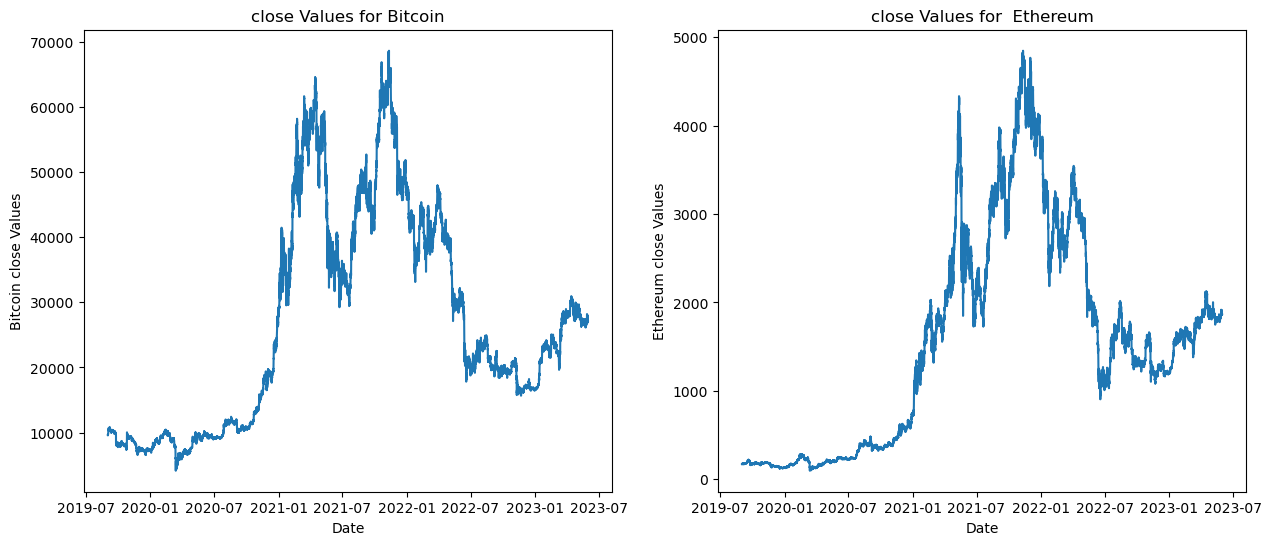

In [40]:
# Create a figure and axes
draw_lineplot_for_bitcoin_and_ethereum("close")

Almost they followed same movement as time passed. Prices of coins remained at a certain level until 2021, but after 2021 increased. Between 2021 to 2020, prices of coins reached its maximum. After 2022, prices dropped quite a bit. Prives tends to recover nowadays

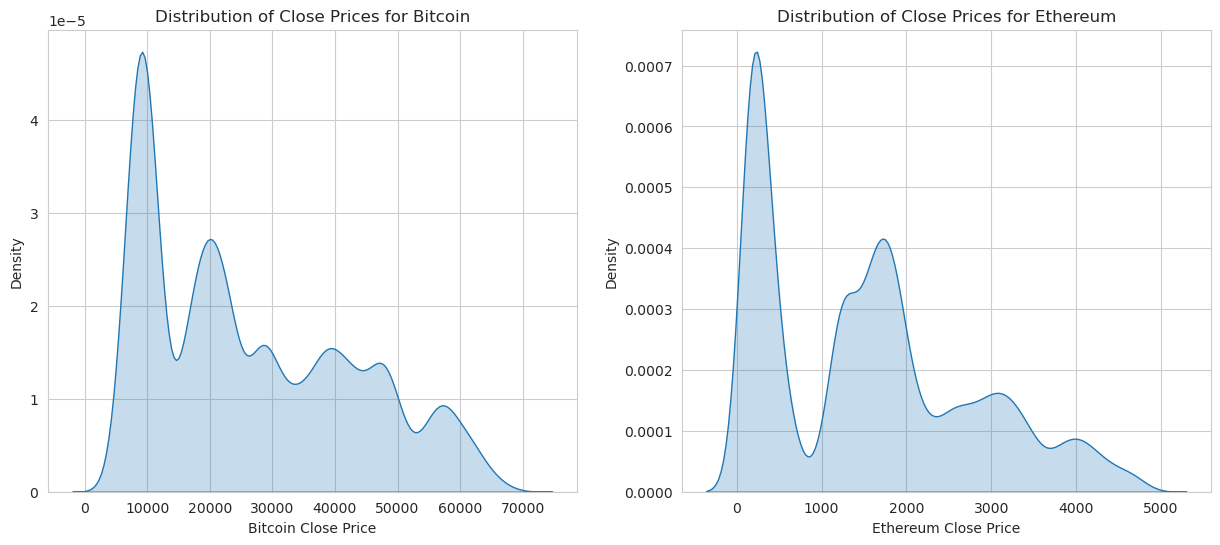

In [41]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot for Bitcoin Close prices
sns.kdeplot(data = df_btc.close, ax = axes[0], fill = True)
axes[0].set_title("Distribution of Close Prices for Bitcoin")
axes[0].set_xlabel("Bitcoin Close Price")
axes[0].set_ylabel("Density")

# Draw lineplot for Ethereum Close prices
sns.kdeplot(data = df_eth.close, ax = axes[1], fill = True)
axes[1].set_title("Distribution of Close Prices for Ethereum")
axes[1].set_xlabel("Ethereum Close Price")
axes[1].set_ylabel("Density")

plt.show()

Does not have a specific desired distribution. Let's log transformation and examine it

In [42]:
# Create features which containing quantile transformer of close prices
df_btc["quantile_transform_close_price"] = transformer_quantile_df_btc.fit_transform(df_btc["close"].to_numpy().reshape(-1, 1))
df_eth["quantile_transform_close_price"] = transformer_quantile_df_eth.fit_transform(df_eth["close"].to_numpy().reshape(-1, 1))

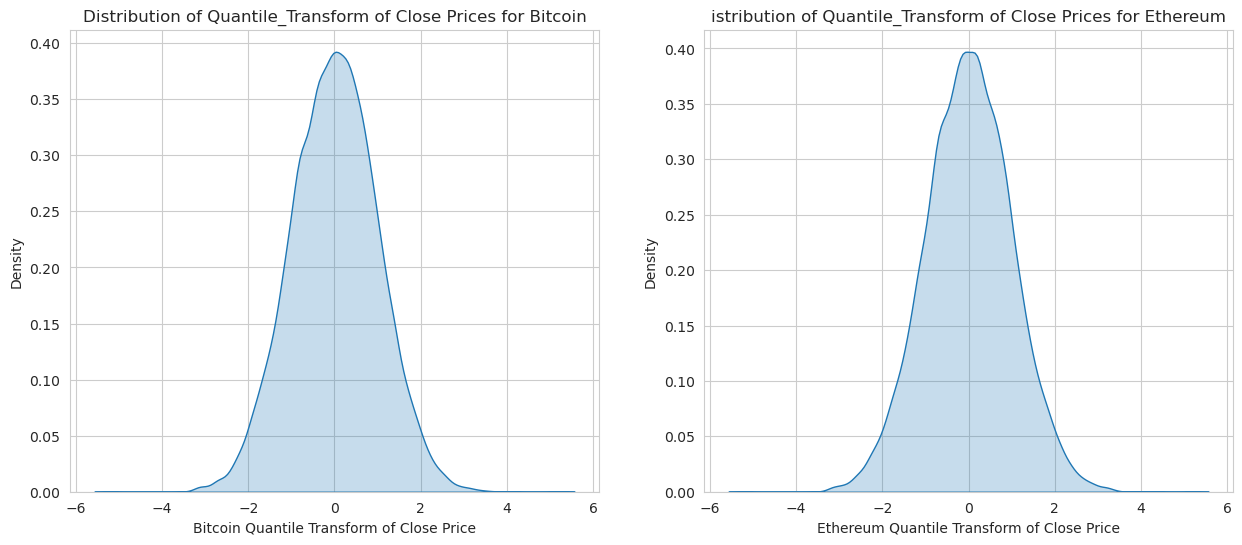

In [43]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot to Log of Close prices for Bitcoin
sns.kdeplot(data = df_btc.quantile_transform_close_price, ax = axes[0], fill = True)
axes[0].set_title("Distribution of Quantile_Transform of Close Prices for Bitcoin")
axes[0].set_xlabel("Bitcoin Quantile Transform of Close Price")
axes[0].set_ylabel("Density")

# Draw lineplot to Log of Close prices for Ethereum
sns.kdeplot(data = df_eth.quantile_transform_close_price, ax = axes[1], fill = True)
axes[1].set_title("istribution of Quantile_Transform of Close Prices for Ethereum")
axes[1].set_xlabel("Ethereum Quantile Transform of Close Price")
axes[1].set_ylabel("Density")

plt.show()

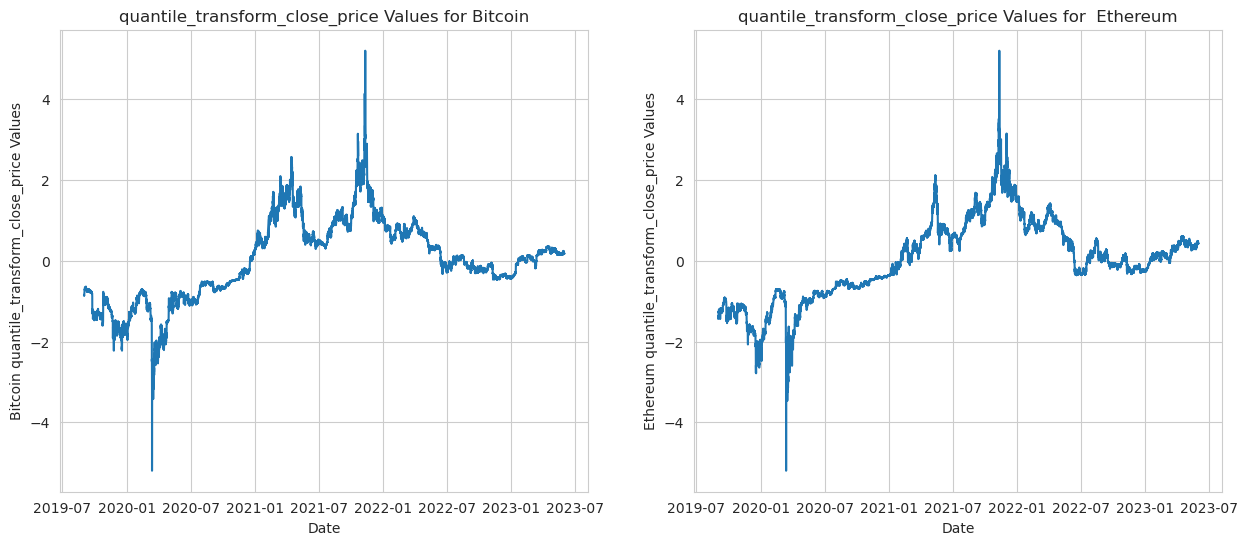

In [44]:
draw_lineplot_for_bitcoin_and_ethereum("quantile_transform_close_price")

Log of price for ethereum look like has two normal distribution density. But shape coverged to normal distribution when compared to normal close prices. We are gonna look  If predict that log of price is good.

In [45]:
df_btc.head()

open     high      low    close      volume  \
2019-09-01 00:00:00  9588.74  9630.00  9579.34  9617.06  546.960415   
2019-09-01 01:00:00  9617.06  9642.58  9612.08  9614.99  453.105152   
2019-09-01 02:00:00  9614.99  9616.00  9595.76  9605.78  458.004517   
2019-09-01 03:00:00  9606.12  9624.01  9605.78  9623.02  633.588749   
2019-09-01 04:00:00  9623.02  9630.21  9605.60  9614.46  542.260896   

                     quote_volume   count  taker_buy_volume  \
2019-09-01 00:00:00  5.257943e+06  7428.0        261.131656   
2019-09-01 01:00:00  4.362498e+06  5789.0        258.764082   
2019-09-01 02:00:00  4.400751e+06  5485.0        321.355630   
2019-09-01 03:00:00  6.092024e+06  5500.0        446.853542   
2019-09-01 04:00:00  5.216076e+06  5536.0        368.470786   

                     taher_buy_quote_volume  quantile_transform_close_price  
2019-09-01 00:00:00            2.510480e+06                       -0.847672  
2019-09-01 01:00:00            2.491295e+06                       -0.848207  
2019-09-01 02:00:00            3.088171e+06                       -0.851082  
2019-09-01 03:00:00            4.296649e+06                       -0.846212  
2019-09-01 04:00:00            3.544535e+06                       -0.848373

## Volume Features

In [46]:
df_btc.volume.describe()

count     32856.000000
mean       4236.939145
std        5216.480581
min           0.000000
25%        1426.532502
50%        2424.728458
75%        4931.432952
max      137207.188600
Name: volume, dtype: float64

Minimum value is 0. It seems there is a mistake but we should check.

In [47]:
df_eth.volume.describe()

count     32856.000000
mean      30924.030826
std       31423.936226
min           0.000000
25%       12668.399430
50%       21697.994090
75%       37392.068875
max      493227.882820
Name: volume, dtype: float64

Also in ethereum dataset, there is a zero value.

In [48]:
df_btc[df_btc["volume"] == 0]

open      high       low     close  volume  \
2020-12-21 14:00:00  22646.53  22646.53  22646.53  22646.53     0.0   
2021-02-11 03:00:00  44582.07  44582.07  44582.07  44582.07     0.0   
2023-03-24 12:00:00  28080.00  28080.00  28080.00  28080.00     0.0   

                     quote_volume  count  taker_buy_volume  \
2020-12-21 14:00:00           0.0    0.0               0.0   
2021-02-11 03:00:00           0.0    0.0               0.0   
2023-03-24 12:00:00           0.0    0.0               0.0   

                     taher_buy_quote_volume  quantile_transform_close_price  
2020-12-21 14:00:00                     0.0                        0.009438  
2021-02-11 03:00:00                     0.0                        0.903301  
2023-03-24 12:00:00                     0.0                        0.238318

In [49]:
df_eth[df_eth["volume"] == 0]

open     high      low    close  volume  quote_volume  \
2020-12-21 14:00:00   608.31   608.31   608.31   608.31     0.0           0.0   
2021-02-11 03:00:00  1721.86  1721.86  1721.86  1721.86     0.0           0.0   
2023-03-24 12:00:00  1789.52  1789.52  1789.52  1789.52     0.0           0.0   

                     count  taker_buy_volume  taher_buy_quote_volume  \
2020-12-21 14:00:00    0.0               0.0                     0.0   
2021-02-11 03:00:00    0.0               0.0                     0.0   
2023-03-24 12:00:00    0.0               0.0                     0.0   

                     quantile_transform_close_price  
2020-12-21 14:00:00                       -0.394021  
2021-02-11 03:00:00                        0.235331  
2023-03-24 12:00:00                        0.297145

When volumes is 0, OHLC(Open, High, Low, Close) remain same. So there should be weird thing when this happen. So I am gonna change this values

In [50]:
# Change rows with 0 values to NaN
df_btc.loc[df_btc.volume == 0, :] = np.nan
df_eth.loc[df_eth.volume == 0, :] = np.nan

# Interpolate missing values using time method
df_btc = df_btc.interpolate(method='time')
df_eth = df_eth.interpolate(method='time')

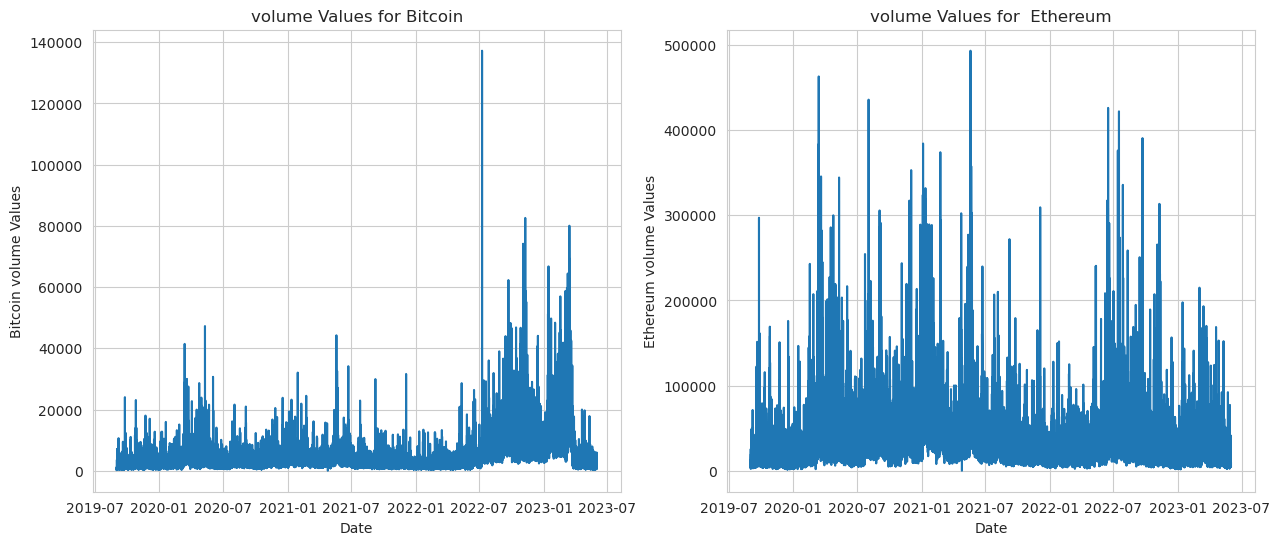

In [51]:
draw_lineplot_for_bitcoin_and_ethereum("volume")

In between 2022 July, volume of btc are increased highly. We should look at this

## Quote_volume Feature

In [52]:
df_btc.quote_volume.describe()

count    3.285600e+04
mean     1.024713e+08
std      1.220068e+08
min      2.922260e+05
25%      2.511812e+07
50%      6.599129e+07
75%      1.341670e+08
max      3.005634e+09
Name: quote_volume, dtype: float64

In [53]:
df_eth.quote_volume.describe()

count    3.285600e+04
mean     4.479536e+07
std      5.746655e+07
min      1.912362e+05
25%      8.591785e+06
50%      2.835071e+07
75%      5.895829e+07
max      1.170476e+09
Name: quote_volume, dtype: float64

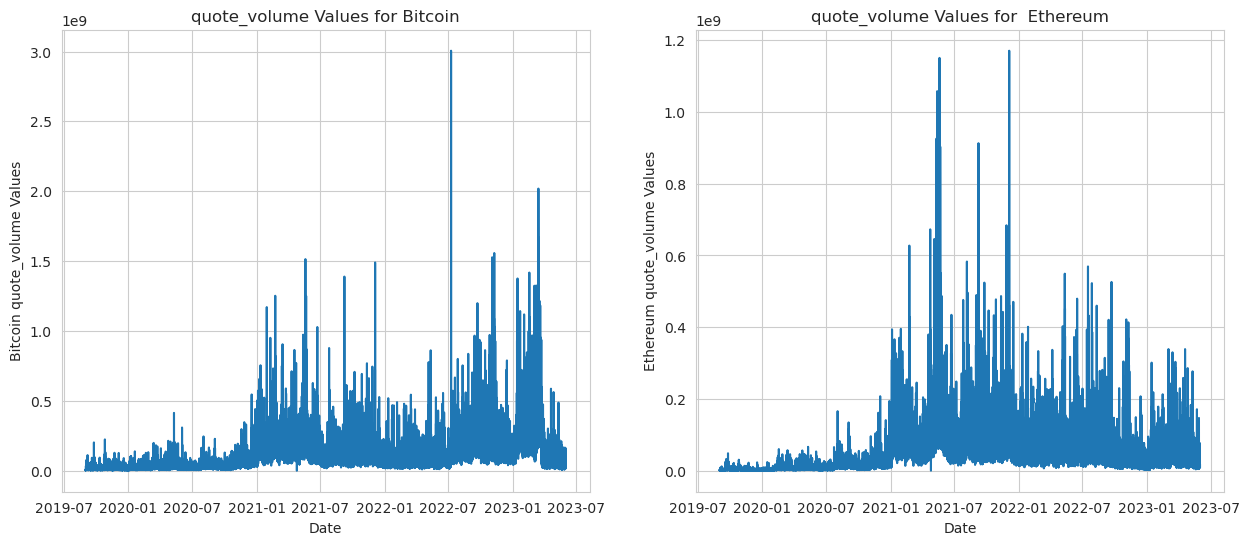

In [54]:
draw_lineplot_for_bitcoin_and_ethereum("quote_volume")

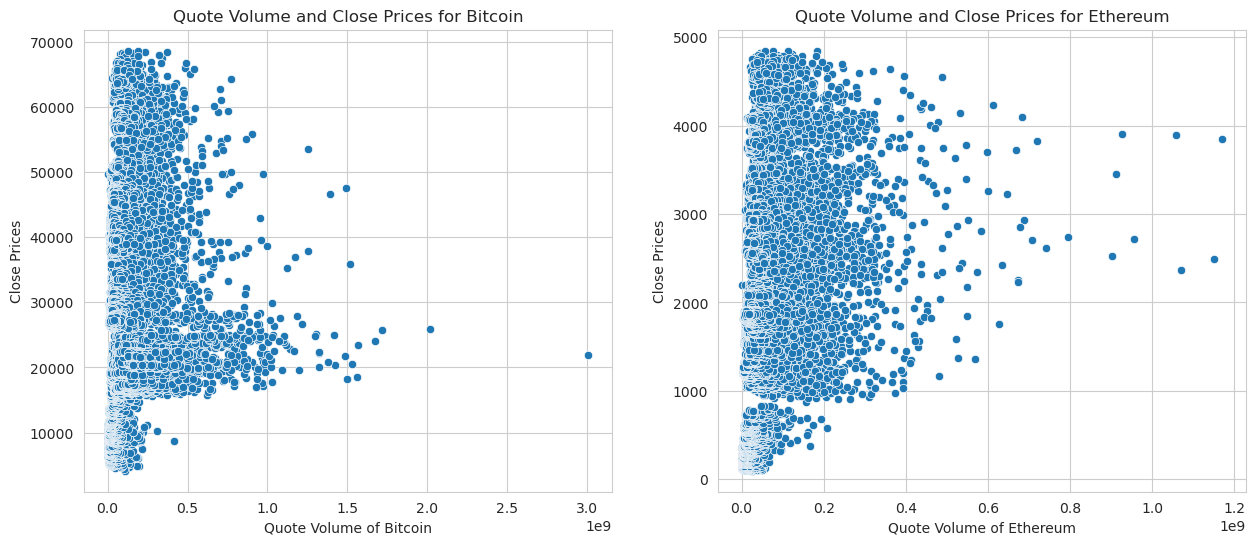

In [55]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw scatterplot for Quote Volume and Close Prices for Bitcoin
sns.scatterplot(data = df_btc, y = "close", x = "quote_volume", ax = axes[0])
axes[0].set_title("Quote Volume and Close Prices for Bitcoin")
axes[0].set_ylabel("Close Prices")
axes[0].set_xlabel("Quote Volume of Bitcoin")

# Draw scatterplot for Quote Volume and Close Prices for Ethereum
sns.scatterplot(data = df_eth, y = "close", x = "quote_volume", ax = axes[1])
axes[1].set_title("Quote Volume and Close Prices for Ethereum")
axes[1].set_ylabel("Close Prices")
axes[1].set_xlabel("Quote Volume of Ethereum")

plt.show()

This feature seems like not correlated with close prices. We can do some operations to get valuable column

In [56]:
df_btc["quote_volume_band"] = pd.qcut(df_btc["quote_volume"], q = 5)
df_eth["quote_volume_band"] = pd.qcut(df_eth["quote_volume"], q = 5)

In [57]:
df_btc.groupby(by = "quote_volume_band")["close"].mean().sort_values(ascending = True)

quote_volume_band
(292226.012, 19992304.294]         10041.740019
(19992304.294, 47000994.148]       21933.670558
(156801941.827, 3005633669.261]    31331.547796
(47000994.148, 88306802.444]       34106.701237
(88306802.444, 156801941.827]      35665.255985
Name: close, dtype: float64

In [58]:
df_eth.groupby(by = "quote_volume_band")["close"].mean().sort_values(ascending = True)

quote_volume_band
(191236.18600000002, 6075598.448]     221.110484
(6075598.448, 19195724.249]           863.376513
(19195724.249, 38616920.179]         1892.485110
(38616920.179, 68716488.78]          2308.028280
(68716488.78, 1170475765.356]        2484.564488
Name: close, dtype: float64

In [59]:
# Change quote volumes by band values for Bitcoin
df_btc.loc[(df_btc["quote_volume"] >= 292226.012) & (df_btc["quote_volume"] < 19992304.294), "quote_volume"] = 1
df_btc.loc[(df_btc["quote_volume"] >= 19992304.294) & (df_btc["quote_volume"] < 47000994.148), "quote_volume"] = 2
df_btc.loc[(df_btc["quote_volume"] >= 156801941.827) & (df_btc["quote_volume"] < 3005633669.261), "quote_volume"] = 3
df_btc.loc[(df_btc["quote_volume"] >= 47000994.148) & (df_btc["quote_volume"] < 88306802.444), "quote_volume"] = 4
df_btc.loc[(df_btc["quote_volume"] >= 88306802.444) & (df_btc["quote_volume"] < 156801941.827), "quote_volume"] = 5


# Change quote volumes by band values for Ethereum
df_eth.loc[(df_eth["quote_volume"] >= 191236.18600000002) & (df_eth["quote_volume"] < 6075598.448), "quote_volume"] = 1
df_eth.loc[(df_eth["quote_volume"] >= 6075598.448) & (df_eth["quote_volume"] < 19195724.249), "quote_volume"] = 2
df_eth.loc[(df_eth["quote_volume"] >= 19195724.249) & (df_eth["quote_volume"] < 38616920.179), "quote_volume"] = 3
df_eth.loc[(df_eth["quote_volume"] >= 38616920.179) & (df_eth["quote_volume"] < 68716488.78), "quote_volume"] = 4
df_eth.loc[(df_eth["quote_volume"] >= 68716488.78) & (df_eth["quote_volume"] < 1170475765.356), "quote_volume"] = 5

In [60]:
# Drop quote_volume_band feature
df_btc = df_btc.drop(["quote_volume_band"], axis = 1)
df_eth = df_eth.drop(["quote_volume_band"], axis = 1)

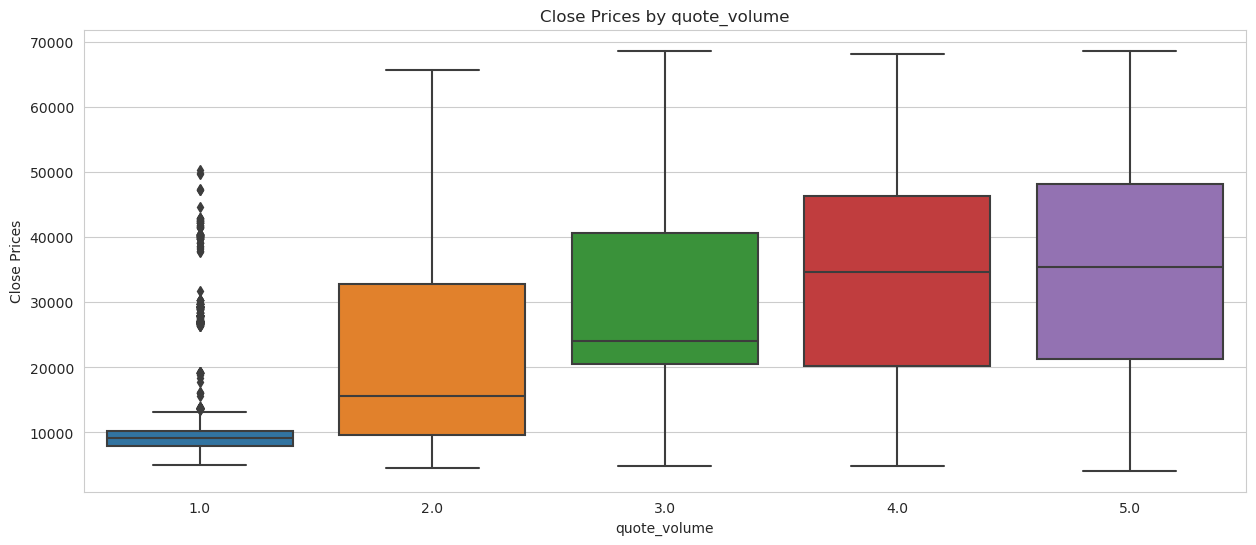

In [61]:
draw_boxplot(df_btc, "quote_volume")

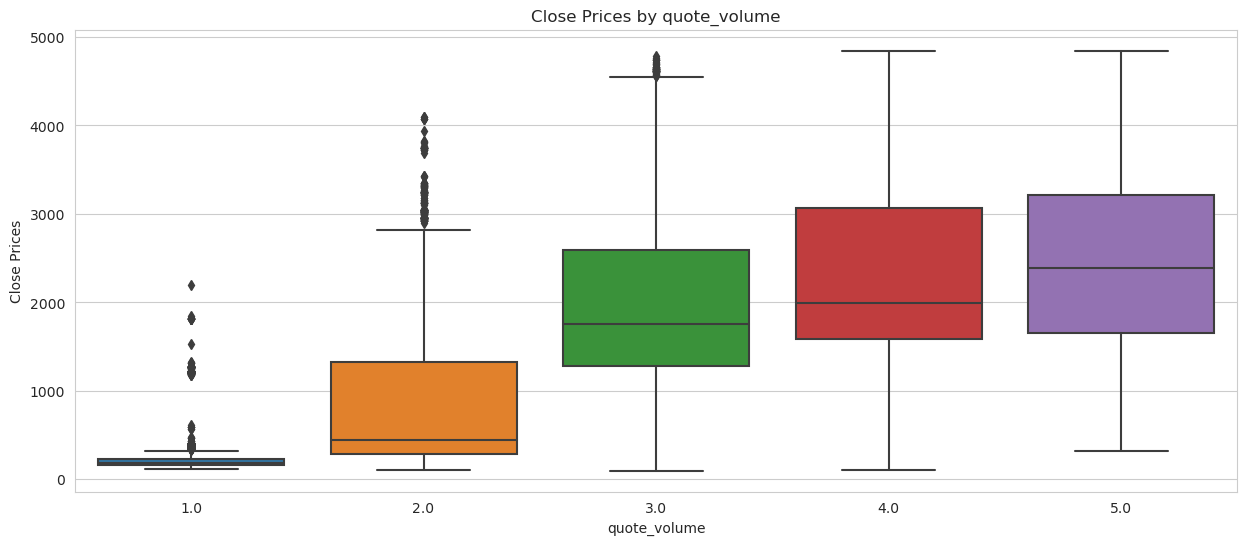

In [62]:
draw_boxplot(df_eth, "quote_volume")

## Count Features

In [63]:
df_btc["count"].describe()

count    3.285600e+04
mean     9.001369e+04
std      1.093357e+05
min      2.240000e+02
25%      2.716200e+04
50%      4.914100e+04
75%      1.049625e+05
max      1.442097e+06
Name: count, dtype: float64

In [64]:
df_eth["count"].describe()

count     32856.000000
mean      32427.433212
std       32994.613936
min         412.000000
25%       11582.250000
50%       23425.500000
75%       41194.250000
max      536376.000000
Name: count, dtype: float64

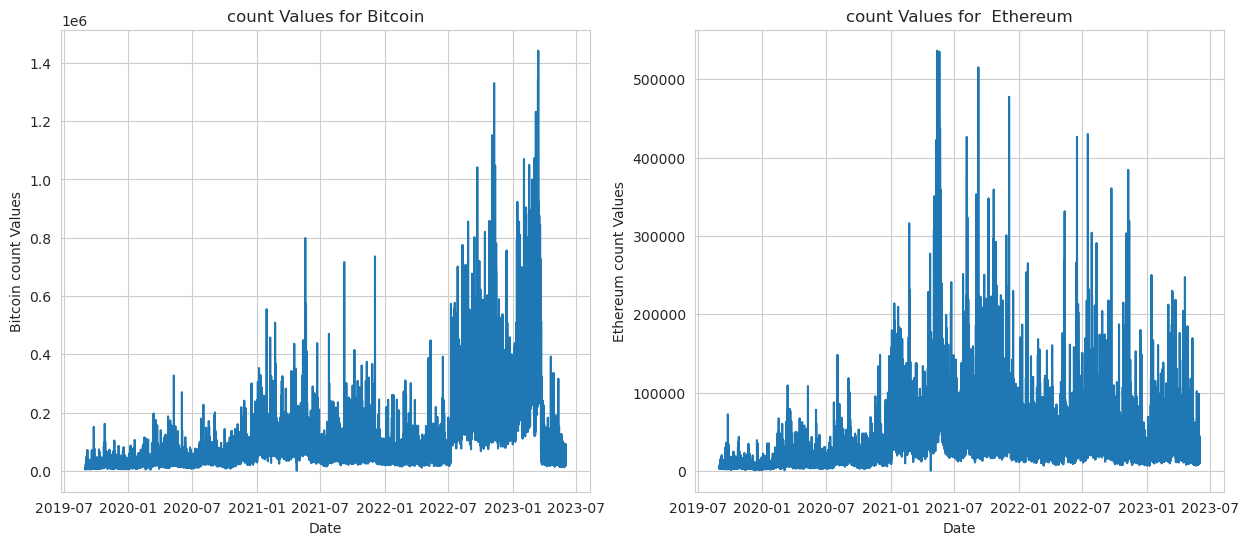

In [65]:
draw_lineplot_for_bitcoin_and_ethereum("count")

Between 2022-July to 2023-03, count of trade for bitcoin increased.

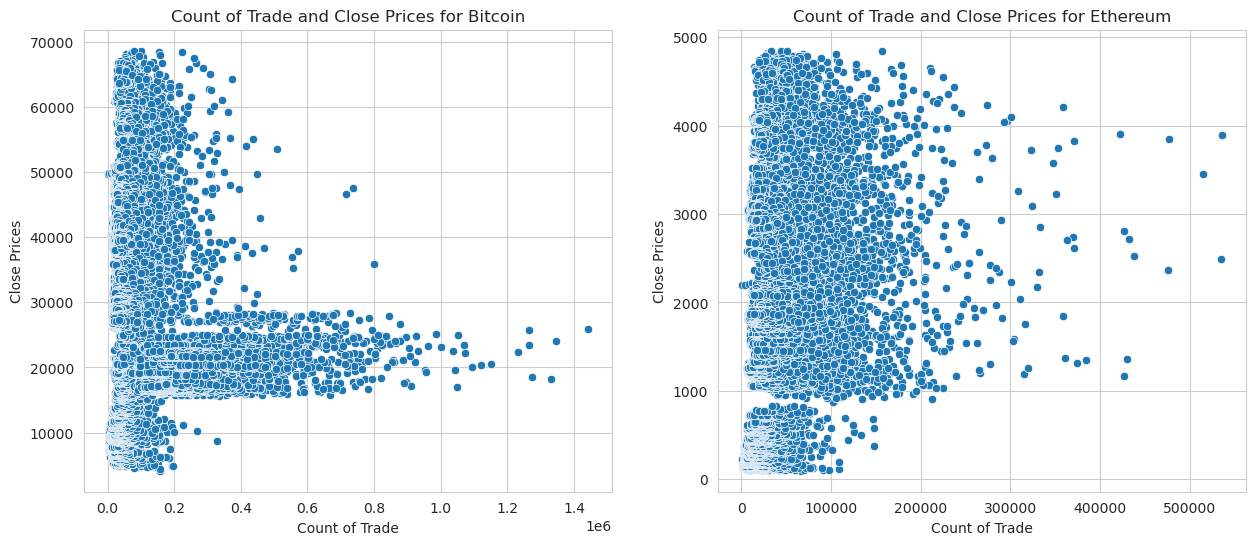

In [66]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw scatterplot for Count of Trade and Close Prices for Bitcoin
sns.scatterplot(data = df_btc, y = "close", x = "count", ax = axes[0])
axes[0].set_title("Count of Trade and Close Prices for Bitcoin")
axes[0].set_ylabel("Close Prices")
axes[0].set_xlabel("Count of Trade")

# Draw scatterplot for Quote Volume and Close Prices for Ethereum
sns.scatterplot(data = df_eth, y = "close", x = "count", ax = axes[1])
axes[1].set_title("Count of Trade and Close Prices for Ethereum")
axes[1].set_ylabel("Close Prices")
axes[1].set_xlabel("Count of Trade")

plt.show()

In [67]:
df_btc["count_band"] = pd.qcut(df_btc["count"], q = 5)
df_eth["count_band"] = pd.qcut(df_eth["count"], q = 5)

In [68]:
df_btc.groupby(by = "count_band")["close"].mean().sort_values(ascending = True)

count_band
(223.999, 23691.0]       11753.038485
(132529.0, 1442097.0]    23774.474874
(23691.0, 38751.0]       25633.144505
(38751.0, 63518.0]       34319.922731
(63518.0, 132529.0]      37598.074569
Name: close, dtype: float64

In [69]:
df_eth.groupby(by = "count_band")["close"].mean().sort_values(ascending = True)

count_band
(411.999, 9325.0]       245.534609
(9325.0, 18522.0]      1132.980478
(18522.0, 29171.0]     1937.686955
(29171.0, 47075.0]     2159.750906
(47075.0, 536376.0]    2293.642004
Name: close, dtype: float64

In [70]:
# Change quote volumes by band values for Bitcoin
df_btc.loc[(df_btc["count"] >= 223.999) & (df_btc["count"] < 23691.0), "count"] = 1
df_btc.loc[(df_btc["count"] >= 132529.0) & (df_btc["count"] <= 1442097.0), "count"] = 2
df_btc.loc[(df_btc["count"] >= 23691.0) & (df_btc["count"] < 38751.0), "count"] = 3
df_btc.loc[(df_btc["count"] >= 38751.0) & (df_btc["count"] < 63518.0), "count"] = 4
df_btc.loc[(df_btc["count"] >= 63518.0) & (df_btc["count"] < 132529.0), "count"] = 5


# Change quote volumes by band values for Ethereum
df_eth.loc[(df_eth["count"] >= 411.999) & (df_eth["count"] < 9325.0), "count"] = 1
df_eth.loc[(df_eth["count"] >= 9325.0) & (df_eth["count"] < 18522.0), "count"] = 2
df_eth.loc[(df_eth["count"] >= 18522.0) & (df_eth["count"] < 29171.0), "count"] = 3
df_eth.loc[(df_eth["count"] >= 29171.0) & (df_eth["count"] < 47075.0), "count"] = 4
df_eth.loc[(df_eth["count"] >= 47075.0) & (df_eth["count"] <= 536376.0), "count"] = 5

In [71]:
# Drop count_band feature
df_btc = df_btc.drop(["count_band"], axis = 1)
df_eth = df_eth.drop(["count_band"], axis = 1)

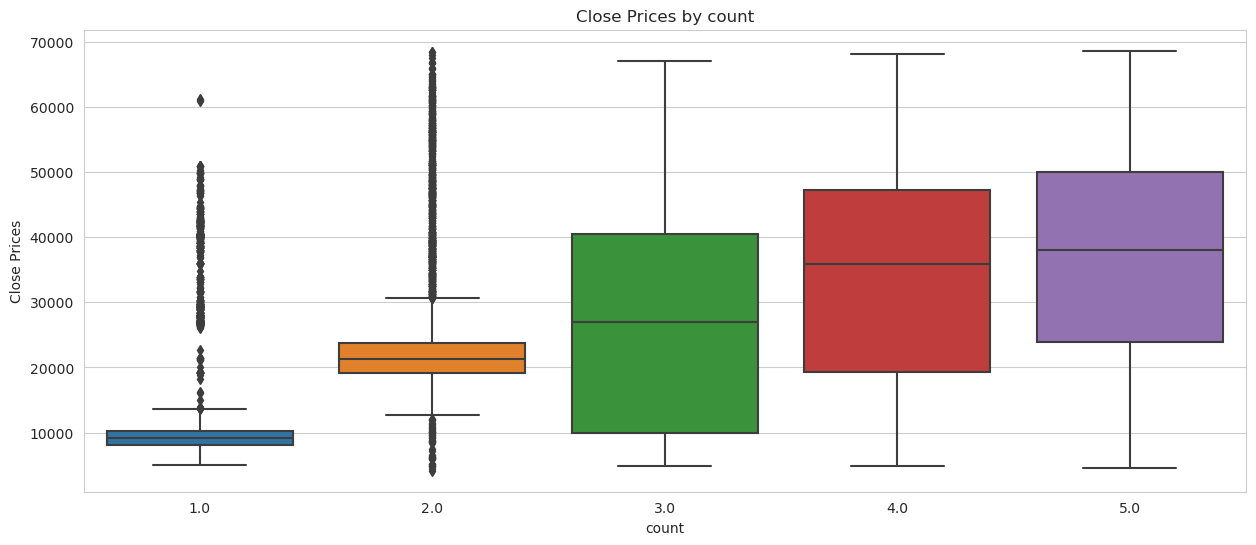

In [72]:
draw_boxplot(df_btc, "count")

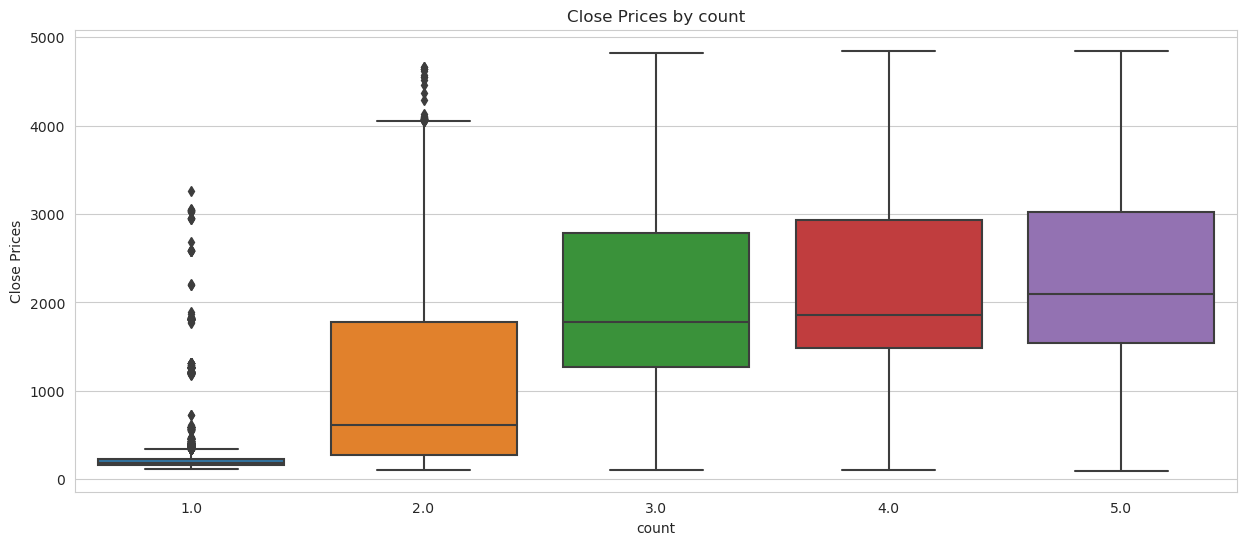

In [73]:
draw_boxplot(df_eth, "count")

## Taker_Buy_Volume Features

In [74]:
df_btc.taker_buy_volume.describe()

count    32856.000000
mean      2096.799828
std       2601.354240
min          4.229245
25%        697.989390
50%       1195.745150
75%       2427.789450
max      68611.450390
Name: taker_buy_volume, dtype: float64

In [75]:
df_eth.taker_buy_volume.describe()

count     32856.000000
mean      15412.926695
std       15617.050578
min          68.857680
25%        6297.699640
50%       10793.747500
75%       18643.182968
max      238996.465800
Name: taker_buy_volume, dtype: float64

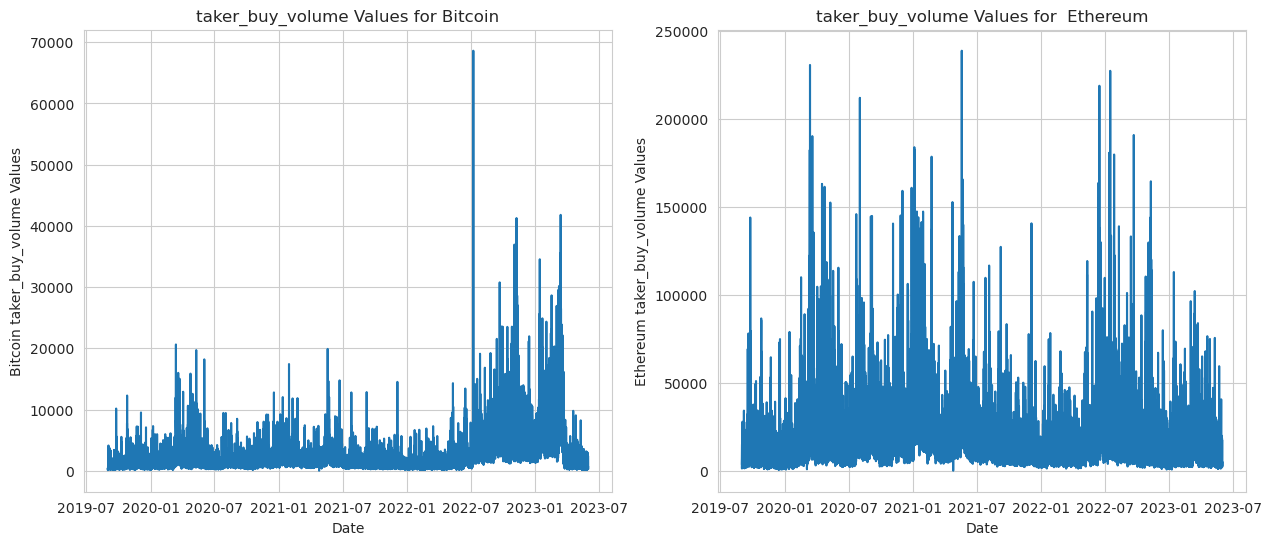

In [76]:
draw_lineplot_for_bitcoin_and_ethereum("taker_buy_volume")

Ethereum data is more stable than bitcoin data for taher_buy_volume feature

# Feature Engineering

## Time-Based Features

We have a timeseries data and we can specify times as year, month, day, dayofweek, weekofyear and hour.

In [77]:
# Create Time-Based Features
df_btc = datetime_features(df_btc)
df_eth = datetime_features(df_eth)

In [78]:
df_btc.head()

open     high      low    close      volume  \
2019-09-01 00:00:00  9588.74  9630.00  9579.34  9617.06  546.960415   
2019-09-01 01:00:00  9617.06  9642.58  9612.08  9614.99  453.105152   
2019-09-01 02:00:00  9614.99  9616.00  9595.76  9605.78  458.004517   
2019-09-01 03:00:00  9606.12  9624.01  9605.78  9623.02  633.588749   
2019-09-01 04:00:00  9623.02  9630.21  9605.60  9614.46  542.260896   

                     quote_volume  count  taker_buy_volume  \
2019-09-01 00:00:00           1.0    1.0        261.131656   
2019-09-01 01:00:00           1.0    1.0        258.764082   
2019-09-01 02:00:00           1.0    1.0        321.355630   
2019-09-01 03:00:00           1.0    1.0        446.853542   
2019-09-01 04:00:00           1.0    1.0        368.470786   

                     taher_buy_quote_volume  quantile_transform_close_price  \
2019-09-01 00:00:00            2.510480e+06                       -0.847672   
2019-09-01 01:00:00            2.491295e+06                       -0.848207   
2019-09-01 02:00:00            3.088171e+06                       -0.851082   
2019-09-01 03:00:00            4.296649e+06                       -0.846212   
2019-09-01 04:00:00            3.544535e+06                       -0.848373   

                     hour  month  year  day  dayofweek  quarter  weekofyear  
2019-09-01 00:00:00     0      9  2019    1          6        3          35  
2019-09-01 01:00:00     1      9  2019    1          6        3          35  
2019-09-01 02:00:00     2      9  2019    1          6        3          35  
2019-09-01 03:00:00     3      9  2019    1          6        3          35  
2019-09-01 04:00:00     4      9  2019    1          6        3          35

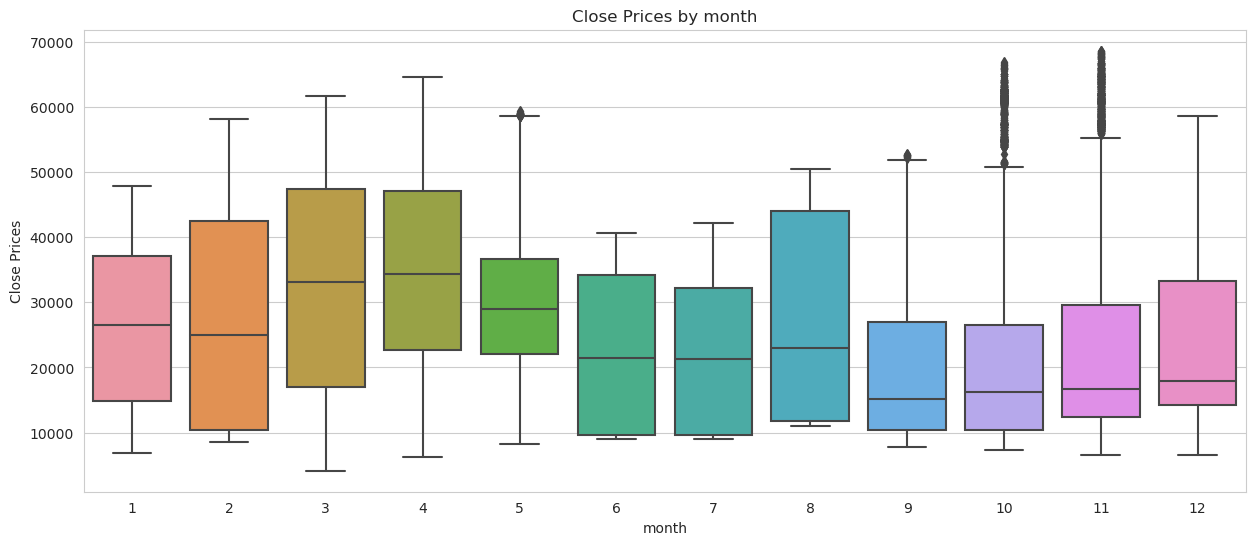

In [79]:
# Draw boxplot BTC Close Prices by months
draw_boxplot(df_btc, "month")

There are a lot of outlier values on 10 and 11th months. In first 4 months, btc close prices are higly when compared to other months.

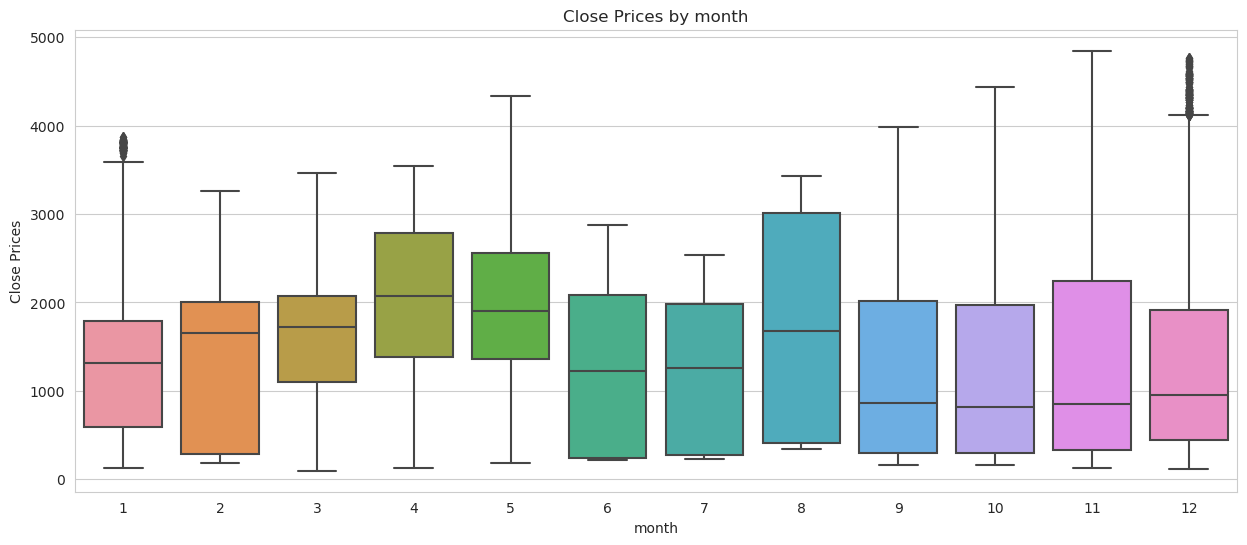

In [80]:
# Draw boxplot ETH Close Prices by months
draw_boxplot(df_eth, "month")

There are a lot of outlier values on 12th month.

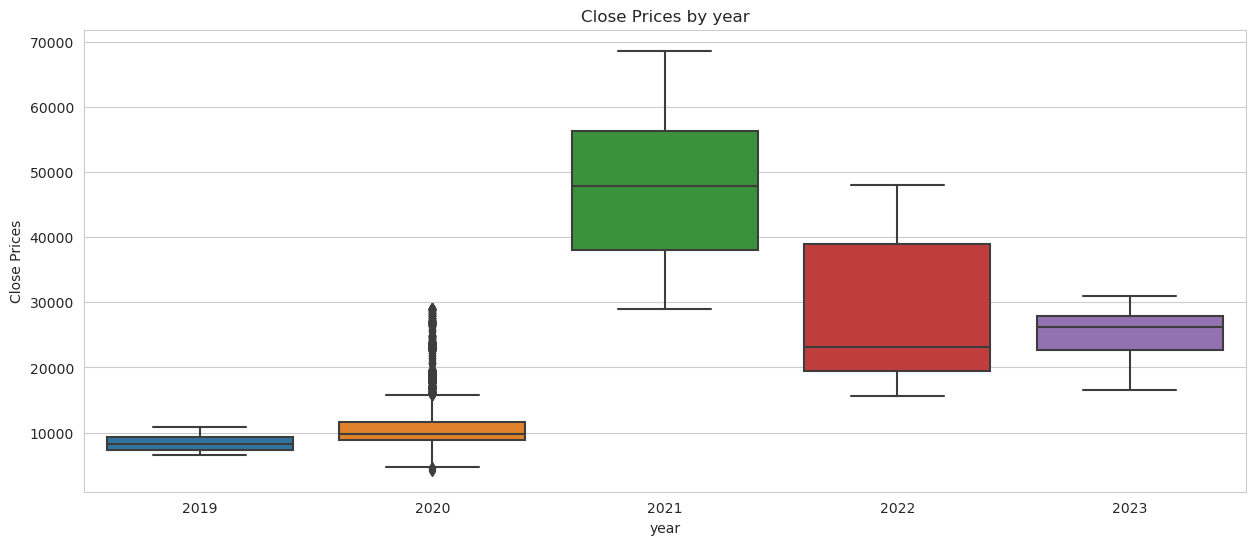

In [81]:
# Draw boxplot BTC Close Prices by years
draw_boxplot(df_btc, "year")

In 2021, Close Price of Bitcoin quite high. In 2019 and 2020, prices quite low. We can say that starting from 2021, there is a significant increase in prices. In 2020, there are outliers.

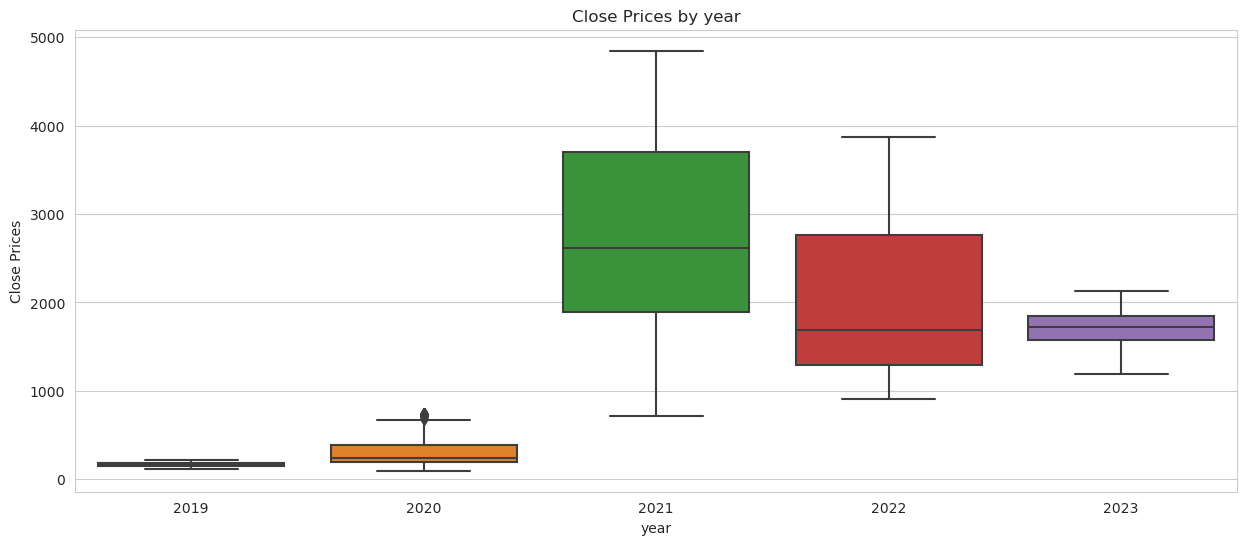

In [82]:
# Draw boxplot ETH Close Prices by years
draw_boxplot(df_eth, "year")

For 2021, 2022 and 2023, almost same graph when compared to bitcoin graph. In 2019, prices quite low.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 6000x3000 with 0 Axes>

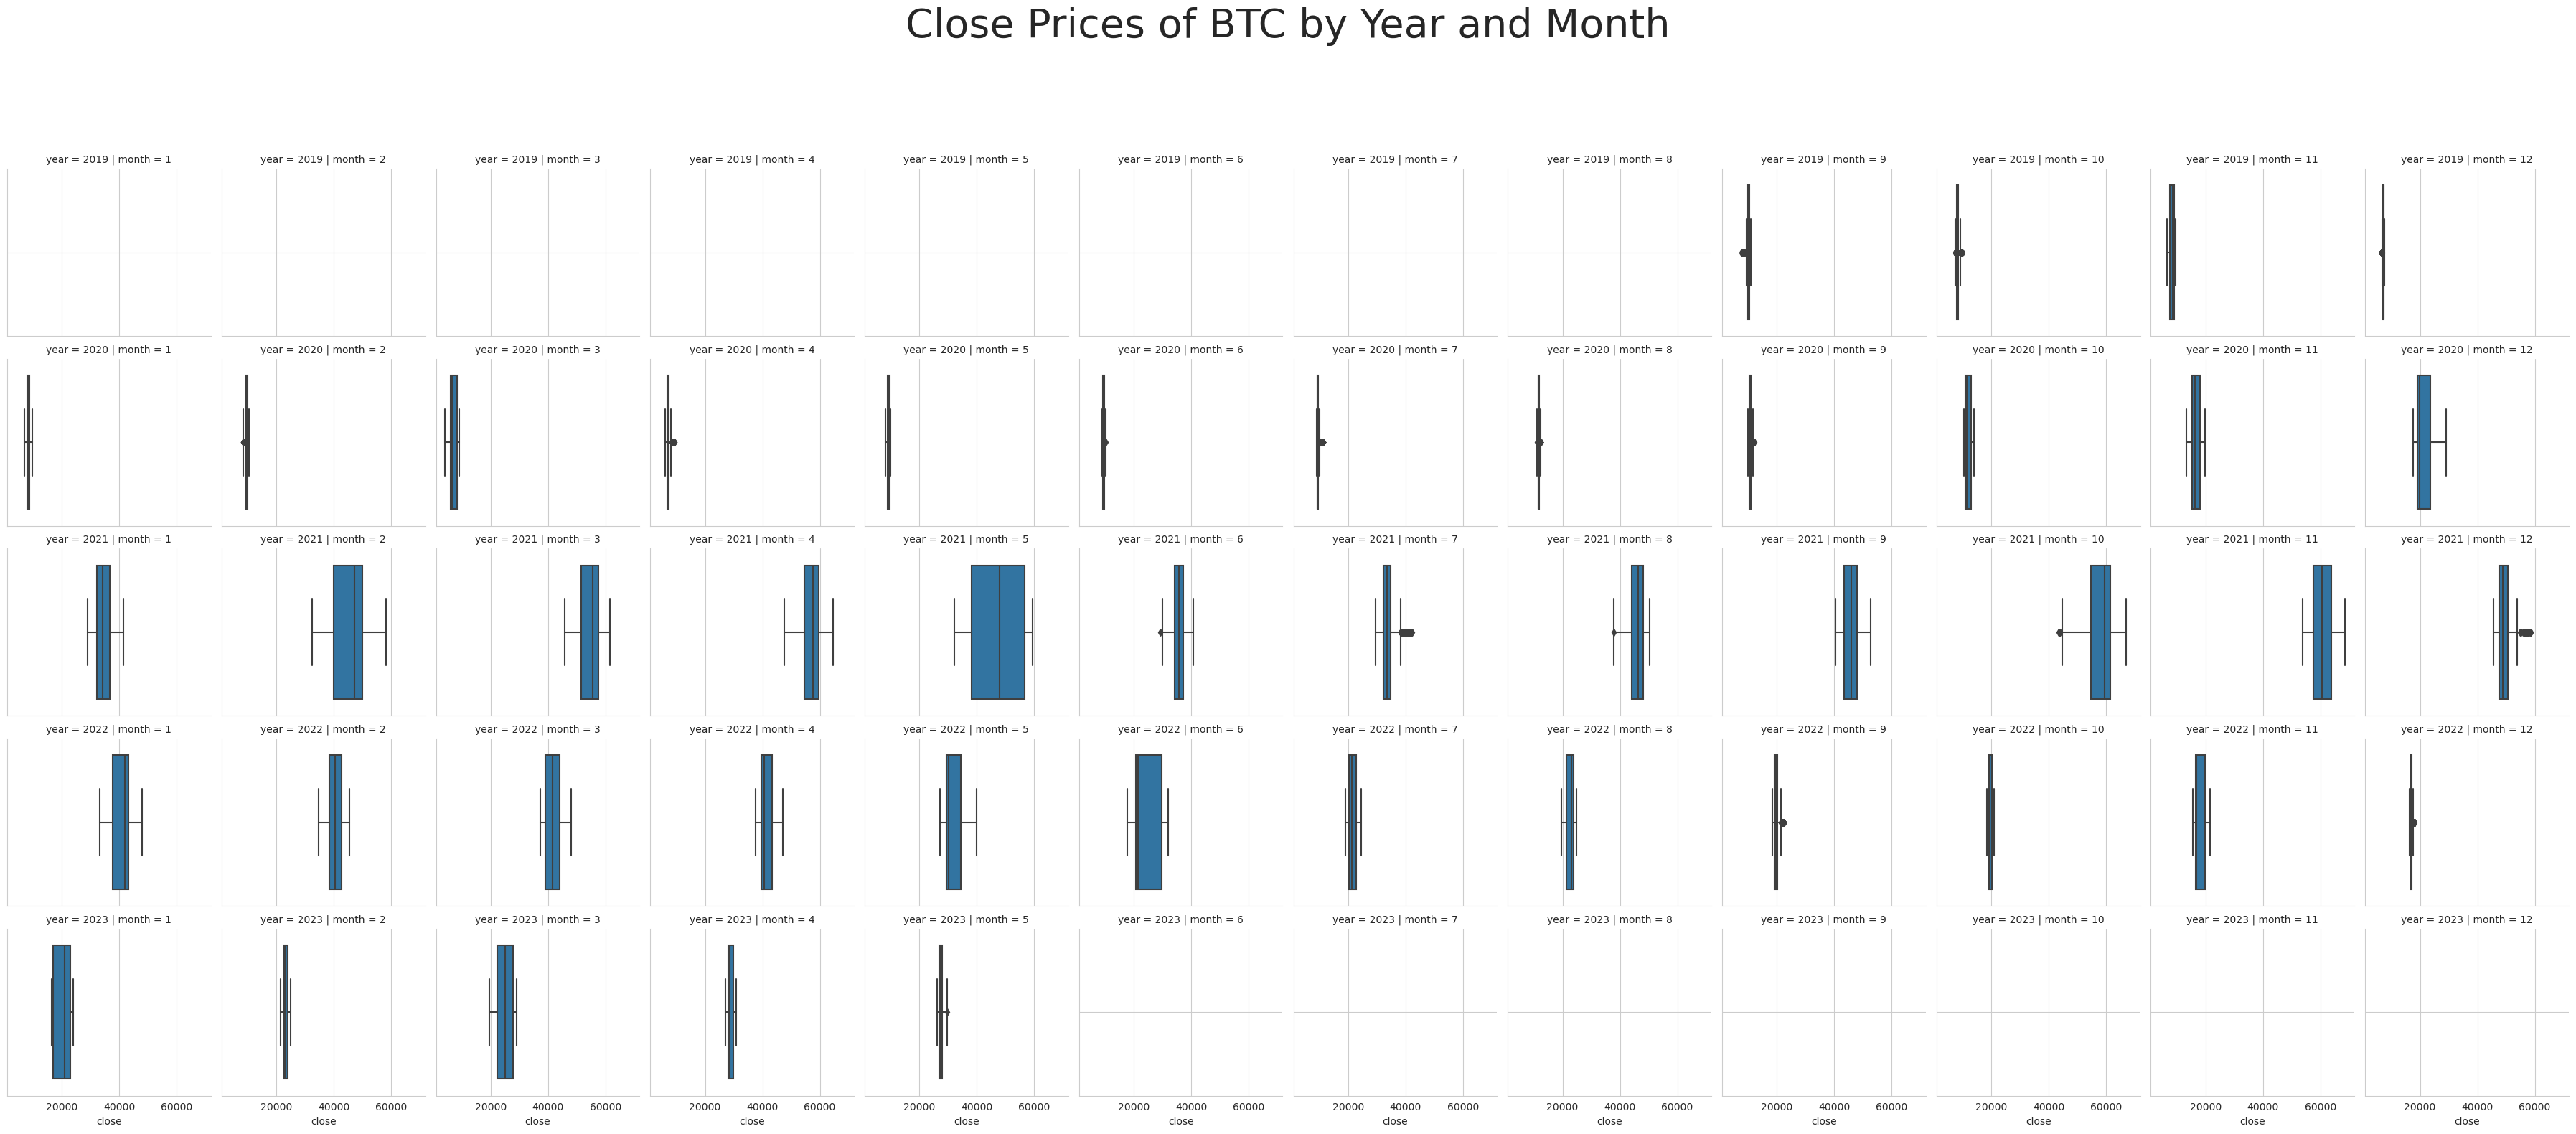

In [83]:
# Create figure with size
plt.figure(figsize = (60, 30))

# Create FacetGrid object
g = sns.FacetGrid(data = df_btc, row = "year", col = "month")

# Create histogram for close feature
g.map(sns.boxplot, "close")

# Set the title for graph
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Close Prices of BTC by Year and Month', y=1.05, fontsize = 40)

# Show the plot
plt.show()

As wee see, In 2021 and 2022 prices really high for Bitcoin. Prices remained at very high levels especially in February, March, April, May, October and November of 2021.

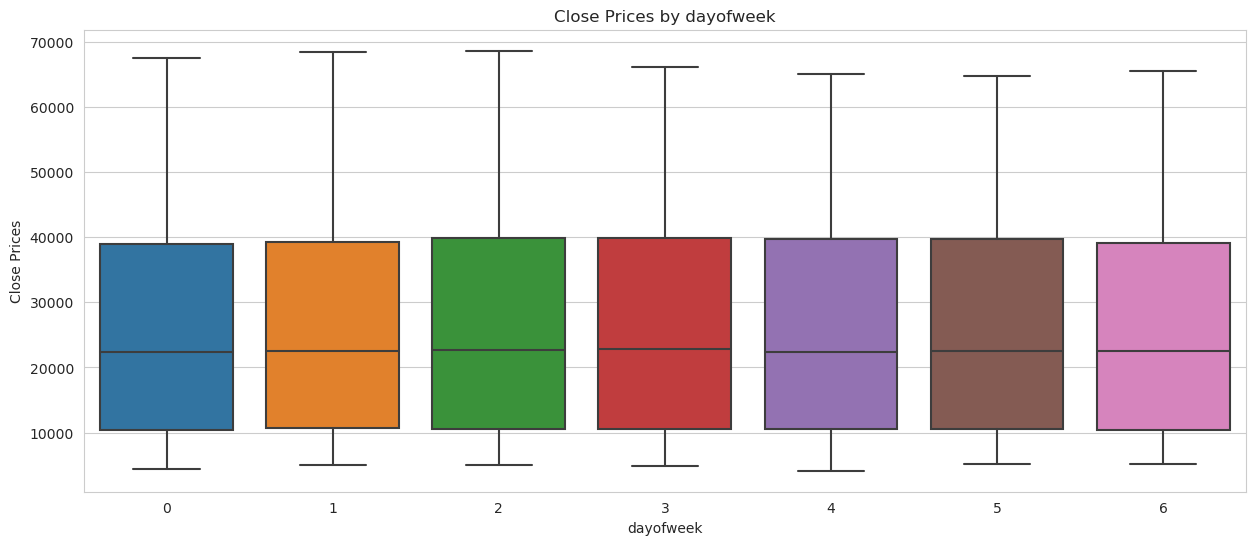

In [84]:
# Draw boxplot for Bitcoin Close Prices by dayofweek
draw_boxplot(df_btc, "dayofweek")

Bitcoin close prices have nothing to do with the days of the week

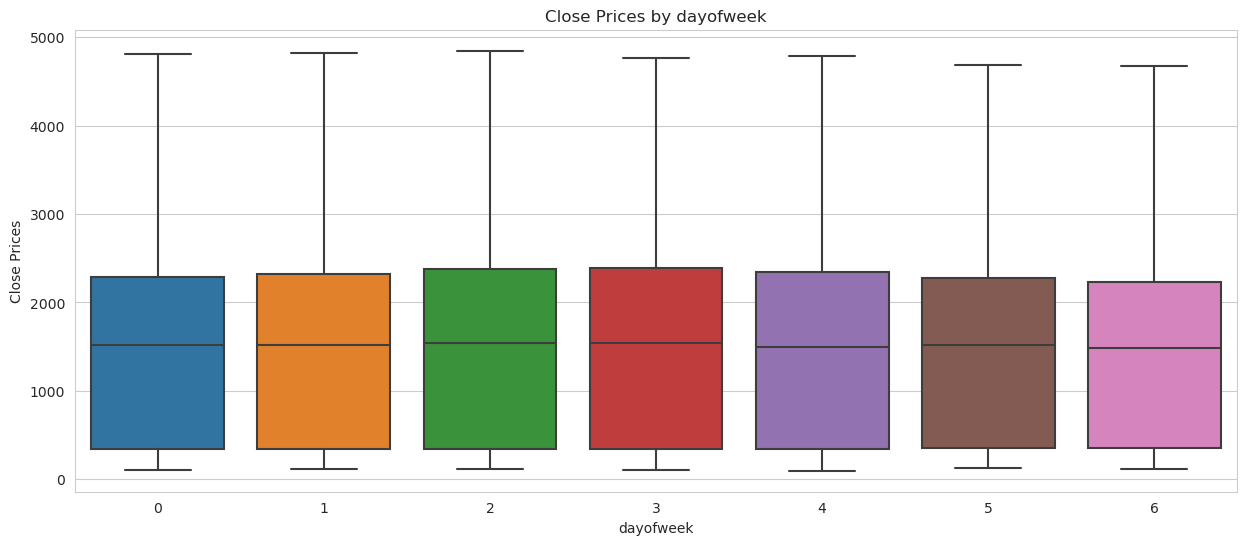

In [85]:
# Draw boxplot for Ethereum Close Prices by dayofweek
draw_boxplot(df_eth, "dayofweek")

Ethereum close prices have nothing to do with the days of the week

In [86]:
# Drop dayofweek feature from Bitcoin and Ethereum Datasets
df_btc = df_btc.drop("dayofweek", axis = 1)
df_eth = df_eth.drop("dayofweek", axis = 1)

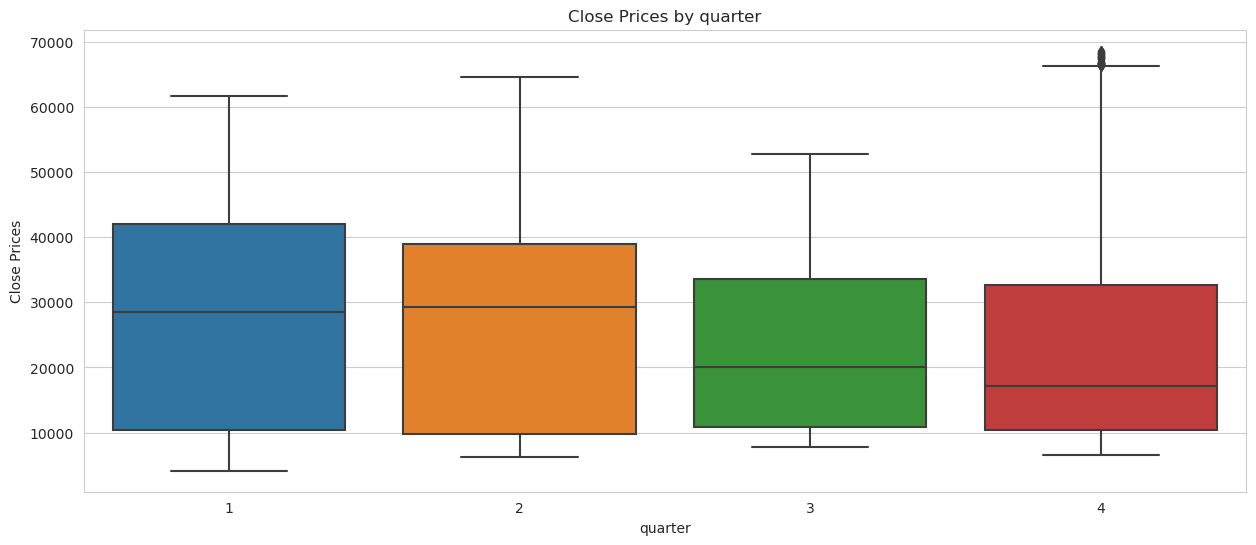

In [87]:
# Draw boxplot for Bitcoin Close Prices by quarters
draw_boxplot(df_btc, "quarter")

In first and second quarter prices are high when compared to other quarters

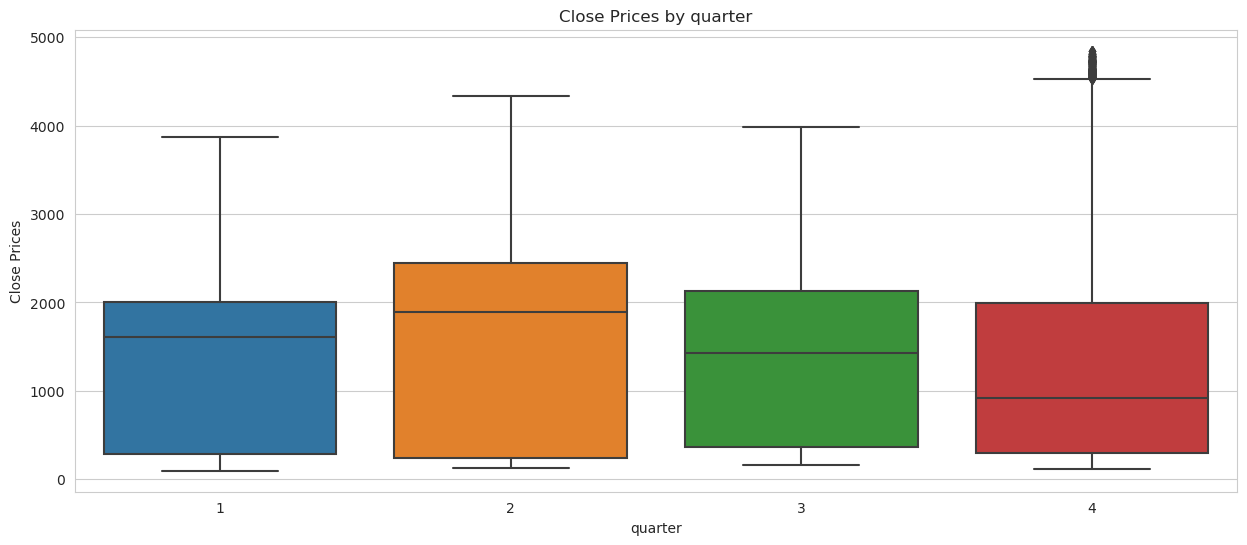

In [88]:
# Draw boxplot for Ethereum Close Prices by quarters
draw_boxplot(df_eth, "quarter")

In second quarter, prices are high compared to others

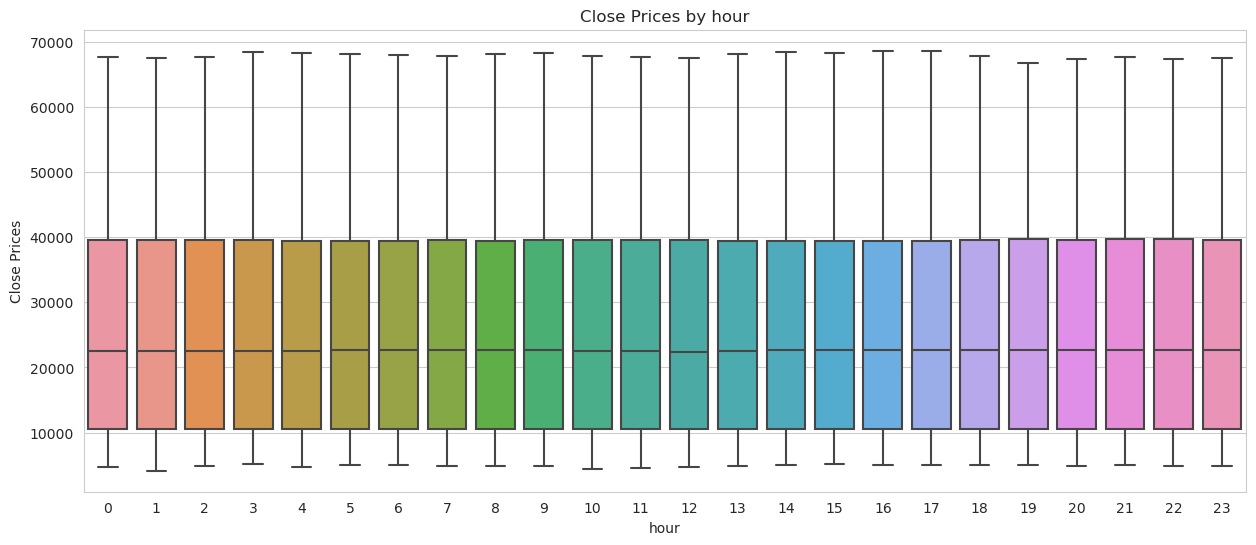

In [89]:
# Draw boxplot for Bitcoin Close Prices by hours
draw_boxplot(df_btc, "hour")

Bitcoin close prices have nothing to do with the hours

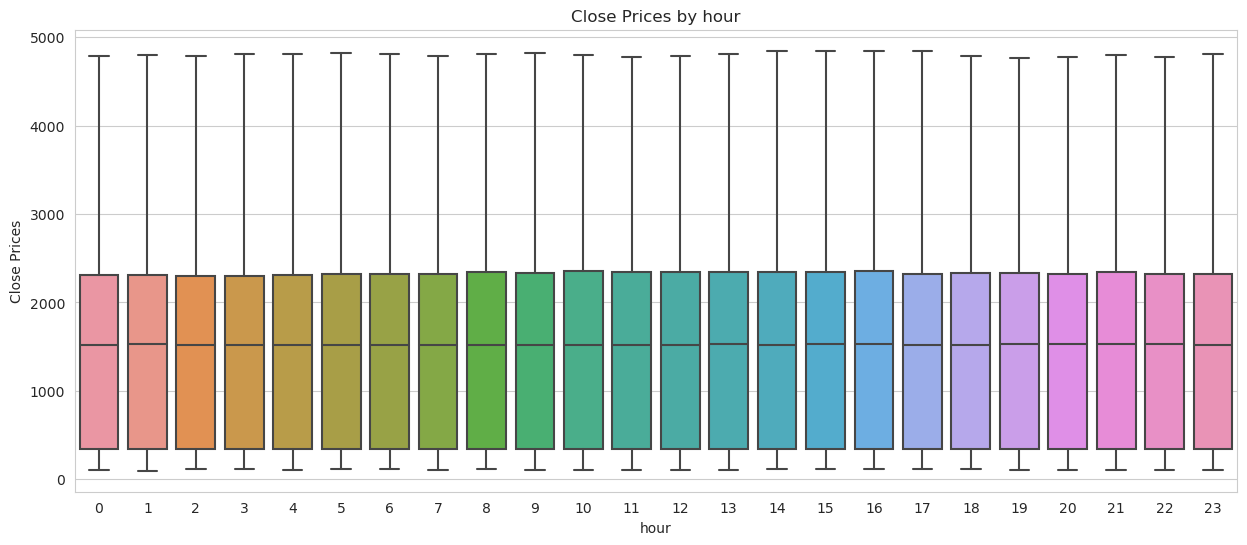

In [90]:
# Draw boxplot for Ethereum Close Prices by hours
draw_boxplot(df_eth, "hour")

Ethereum close prices have nothing to do with the hours

In [91]:
# Drop hour feature from Bitcoin and Ethereum Datasets
df_btc = df_btc.drop("hour", axis = 1)
df_eth = df_eth.drop("hour", axis = 1)

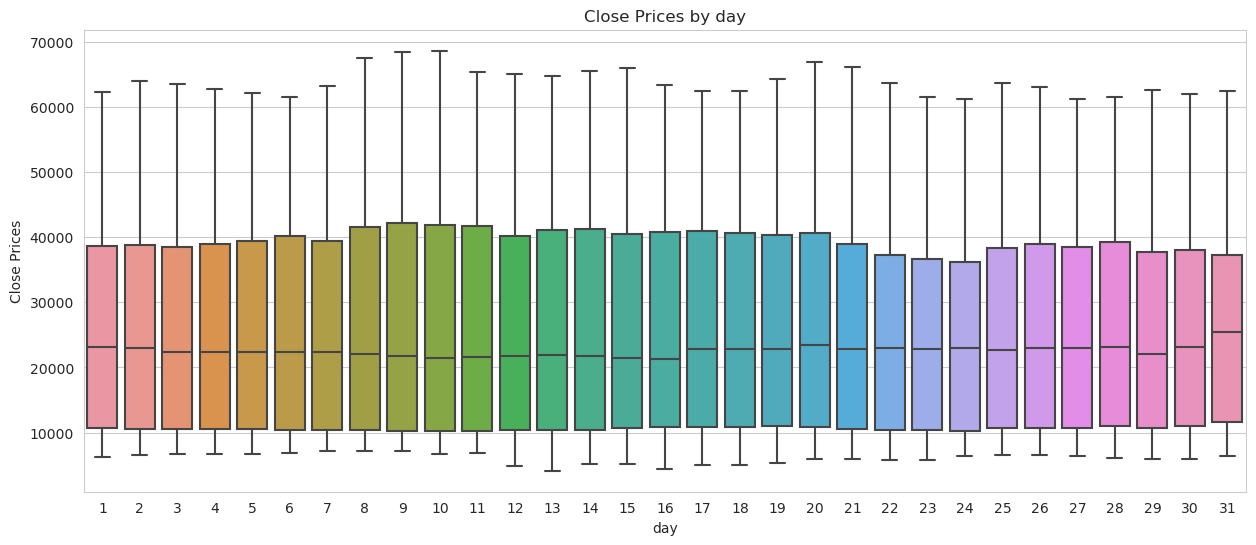

In [92]:
# Draw boxplot for Bitcoin Close Prices by days of month
draw_boxplot(df_btc, "day")

Prices for the days of the month remained almost the same.

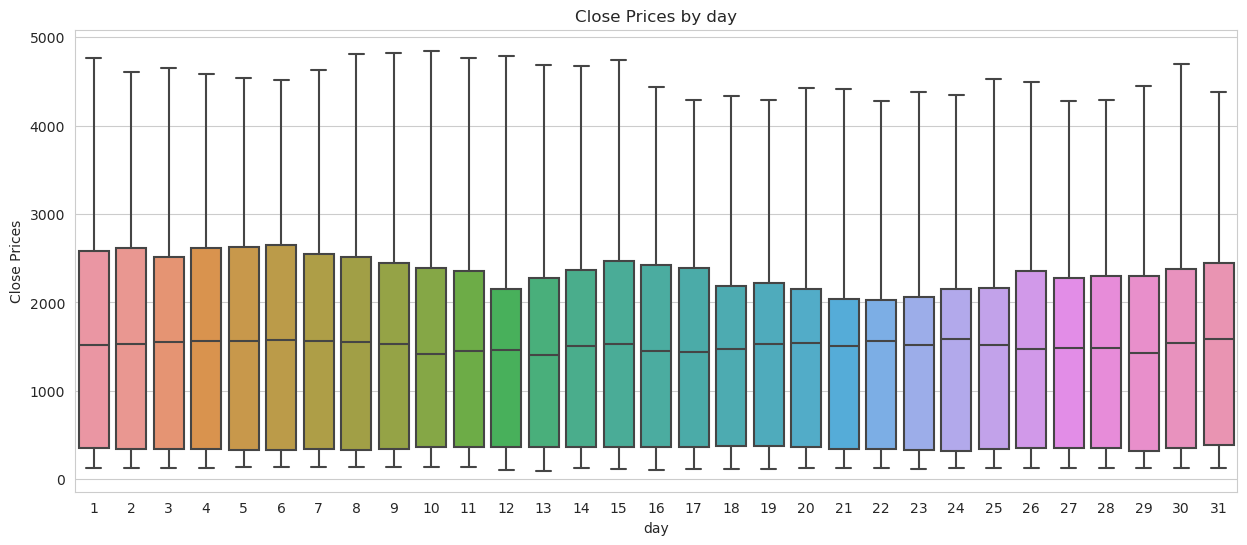

In [93]:
# Draw boxplot for Ethereum Close Prices by days of month
draw_boxplot(df_eth, "day")

Prices for the days of the month remained almost the same.

In [94]:
# Drop day feature from Bitcoin and Ethereum Datasets
df_btc = df_btc.drop("day", axis = 1)
df_eth = df_eth.drop("day", axis = 1)

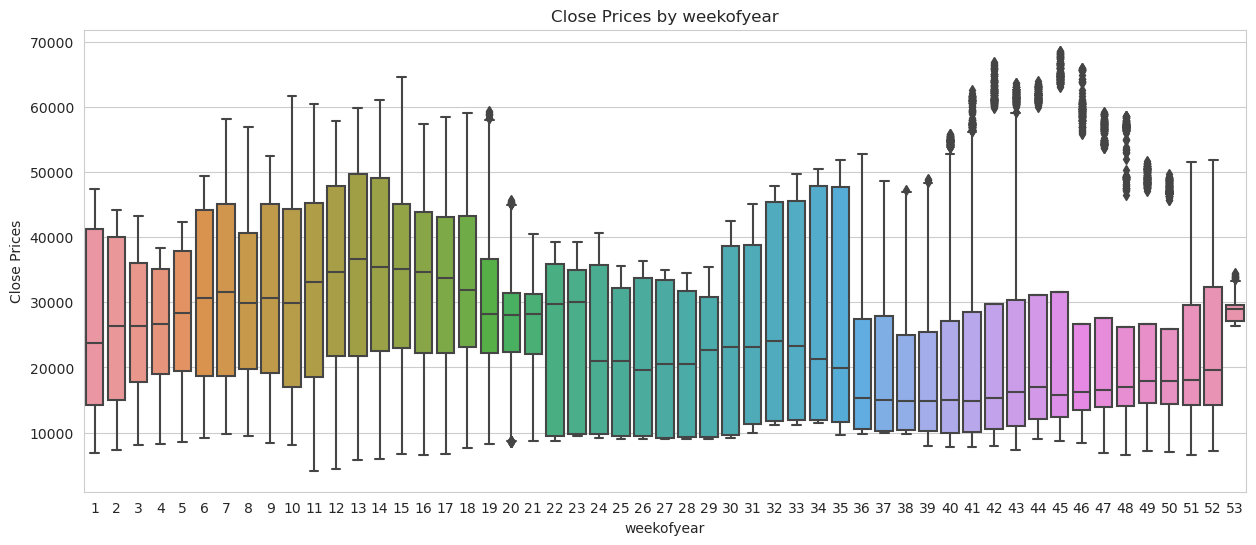

In [95]:
# Draw boxplot for Bitcoin Close Prices by week of years
draw_boxplot(df_btc, "weekofyear")

Starting from 35th week, Bitcoin close prices seems decreased highly.

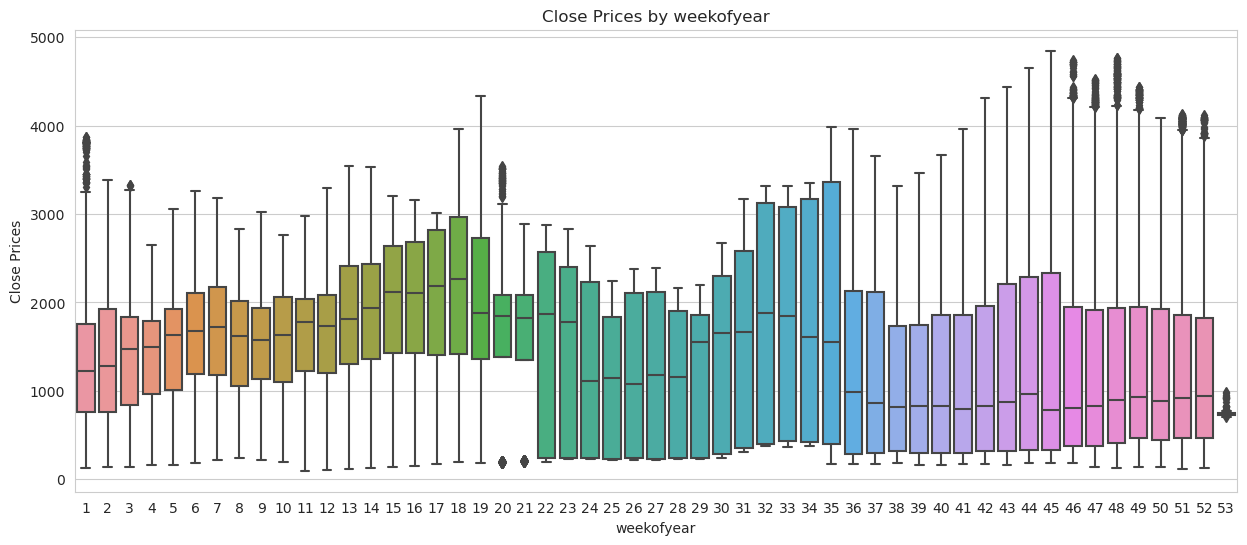

In [96]:
# Draw boxplot for Ethereum Close Prices by week of years
draw_boxplot(df_eth, "weekofyear")

Starting from 37 week, Ethereum close prices decreased,

## Financial Terms

### RSI

**RSI** [link](https://www.investopedia.com/terms/r/rsi.asp)

The RSI is displayed as an oscillator (a line graph) on a scale of zero to 100. The indicator was developed by J. Welles Wilder Jr. and introduced in his seminal 1978 book, New Concepts in Technical Trading Systems.
1


The RSI can do more than point to overbought and oversold securities. It can also indicate securities that may be primed for a trend reversal or corrective pullback in price. It can signal when to buy and sell. Traditionally, an RSI reading of 70 or above indicates an overbought situation. A reading of 30 or below indicates an oversold condition.

As a momentum indicator, the relative strength index compares a security's strength on days when prices go up to its strength on days when prices go down. Relating the result of this comparison to price action can give traders an idea of how a security may perform. The RSI, used in conjunction with other technical indicators, can help traders make better-informed trading decisions.


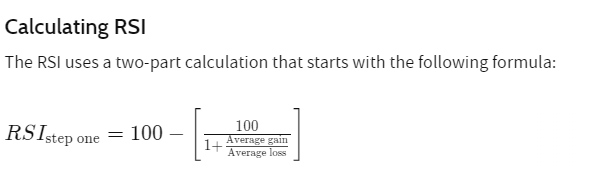

In [97]:
# Find RSI values for 14 days as a series
rsi_14_btc = calculate_rsi(df_btc["close"], period=14 * 24) 
rsi_14_eth = calculate_rsi(df_eth["close"], period=14 * 24)

# Find RSI values for 7 days as a series
rsi_7_btc = calculate_rsi(df_btc["close"], period=7 * 24) 
rsi_7_eth = calculate_rsi(df_eth["close"], period=7 * 24)

# Find RSI values for 30 days as a series
rsi_30_btc = calculate_rsi(df_btc["close"], period=30 * 24) 
rsi_30_eth = calculate_rsi(df_eth["close"], period=30 * 24)

In [98]:
# Assing RSI values to datasets
df_btc["rsi_14_days"] = rsi_14_btc
df_eth["rsi_14_days"] = rsi_14_eth

df_btc["rsi_7_days"] = rsi_7_btc
df_eth["rsi_7_days"] = rsi_7_eth

df_btc["rsi_30_days"] = rsi_30_btc
df_eth["rsi_30_days"] = rsi_30_eth

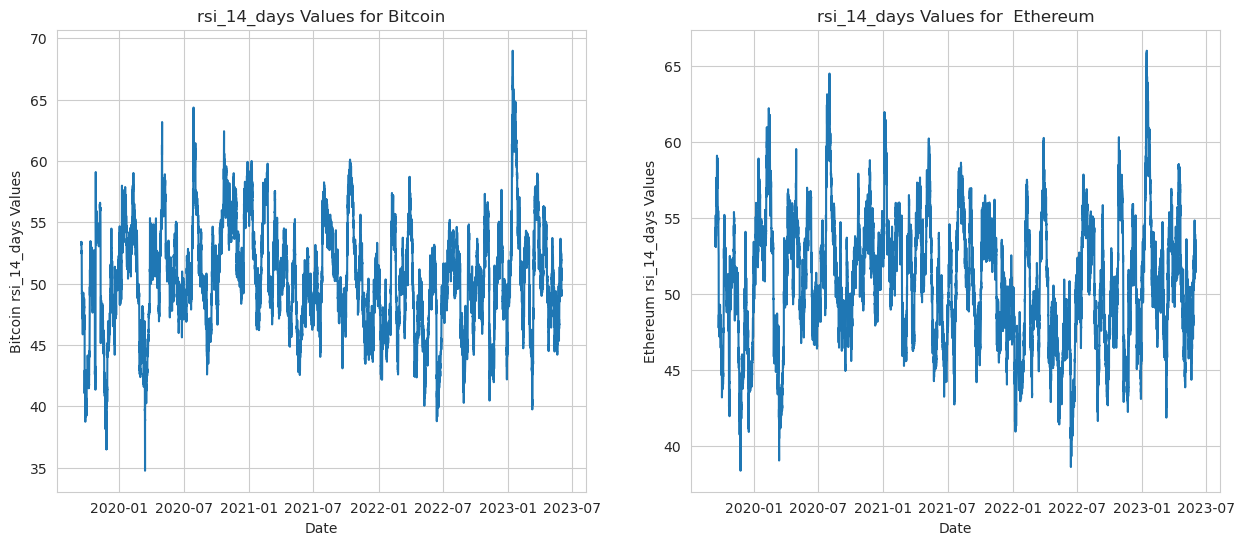

In [99]:
draw_lineplot_for_bitcoin_and_ethereum("rsi_14_days")

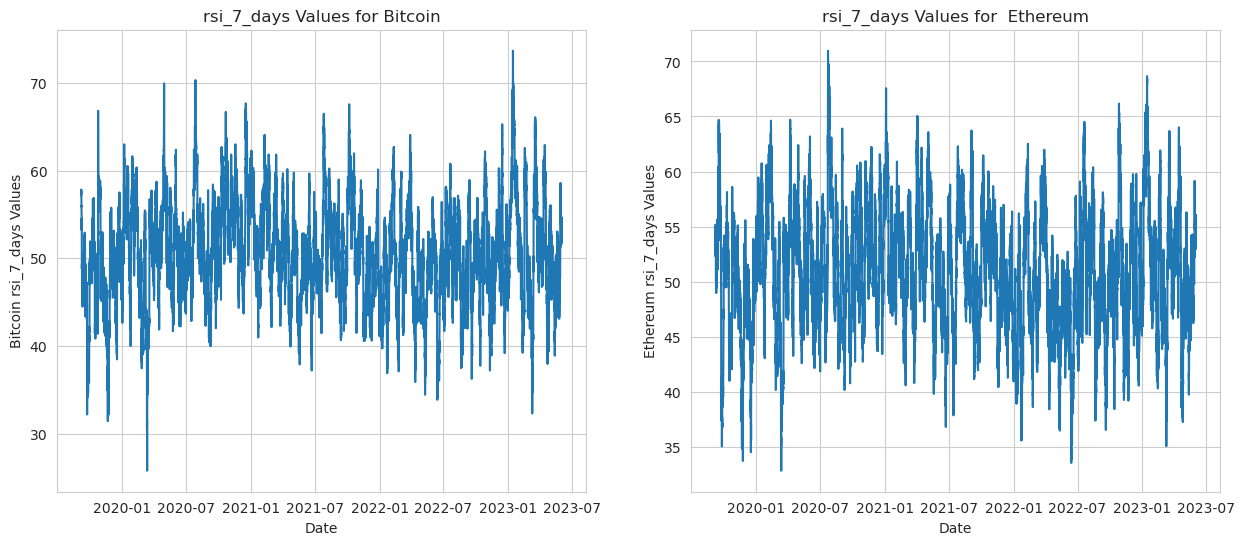

In [100]:
draw_lineplot_for_bitcoin_and_ethereum("rsi_7_days")

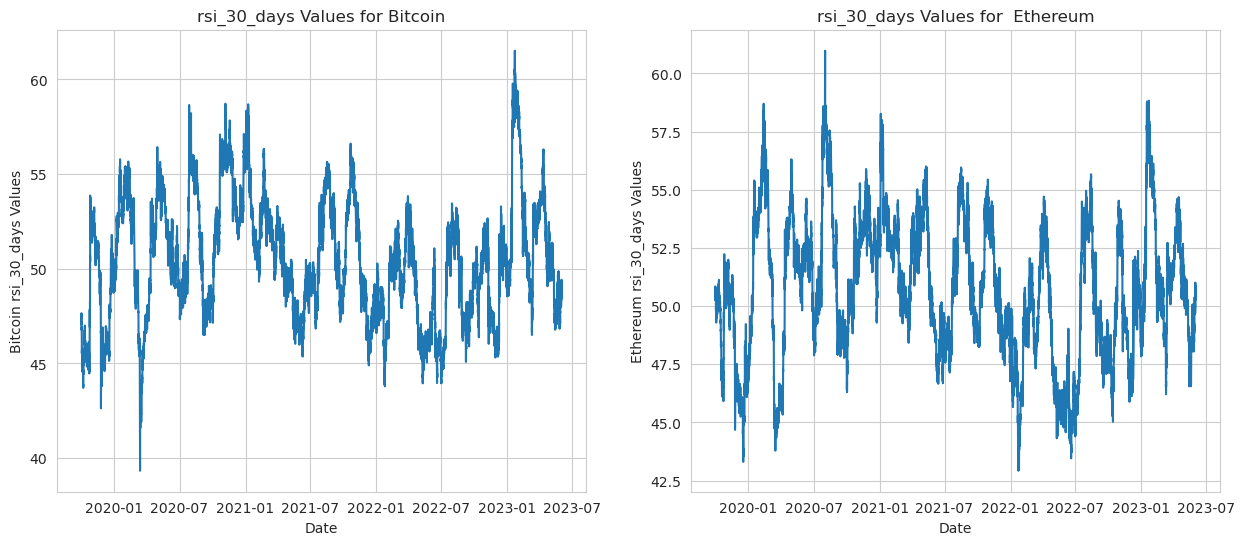

In [101]:
draw_lineplot_for_bitcoin_and_ethereum("rsi_30_days")

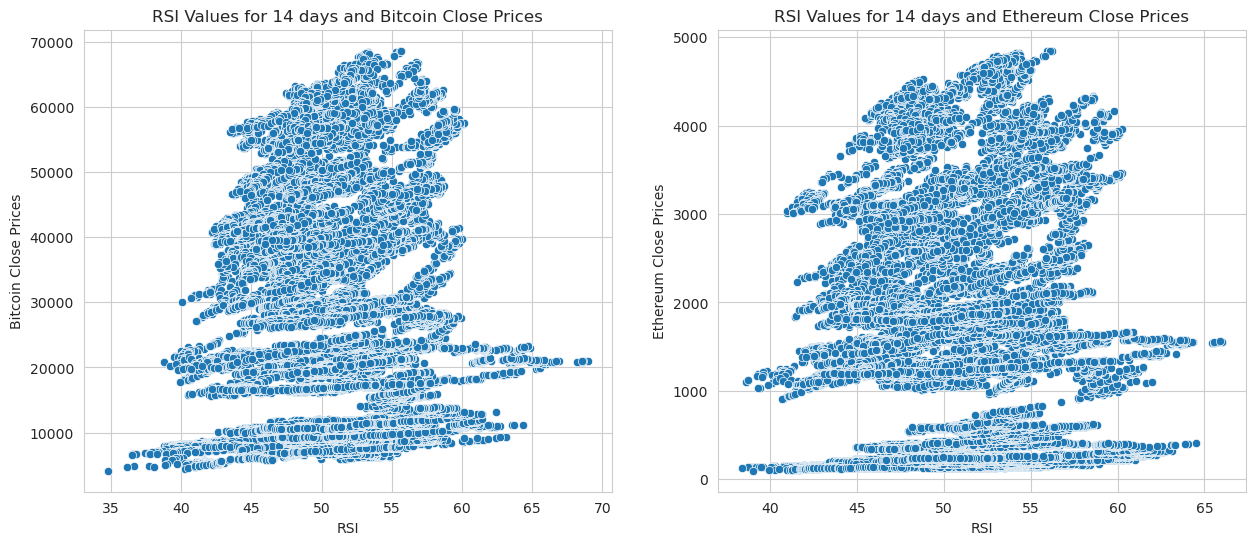

In [102]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw scatterplot for Bitcoin Close prices
sns.scatterplot(data = df_btc, x = "rsi_14_days", y = "close", ax = axes[0])
axes[0].set_title("RSI Values for 14 days and Bitcoin Close Prices")
axes[0].set_xlabel("RSI")
axes[0].set_ylabel("Bitcoin Close Prices")

# Draw scatterplot for Ethereum Close prices
sns.scatterplot(data = df_eth, x = "rsi_14_days", y = "close", ax = axes[1])
axes[1].set_title("RSI Values for 14 days and Ethereum Close Prices")
axes[1].set_xlabel("RSI")
axes[1].set_ylabel("Ethereum Close Prices")

plt.show()

### Exponential Moving Average


[link](https://coindcx.com/blog/cryptocurrency/how-to-trade-crypto-using-exponential-moving-averages/)

Exponential Moving Averages (EMAs) are popular technical analysis tools used by traders to analyze market trends and identify potential trading opportunities. They are used to smoothen out price fluctuations, providing a more accurate representation of the market’s direction. EMAs are calculated by giving more weight to recent price action, making them more responsive to current market conditions compared to other moving averages. Traders can use EMAs to determine the trend’s direction and make informed decisions on when to enter or exit a trade. By utilizing these tools correctly, traders can increase their chances of trading profitably. In this article, we will explore the benefits of using EMAs and provide practical examples of how to trade profitably using this popular technical analysis tool.

To calculate the EMA, traders need to select a specific time period and a smoothing factor. The most commonly used time periods are 12 and 26 days, while the smoothing factor is typically set at 2/(n+1), where n is the number of days in the selected time period.

In [103]:
# Specify the smoothing factor for EMA
ema_alpha_12_days = 2/(12*24 + 1)
ema_alpha_26_days = 2/(26*24 + 1)

# Calculate EMA with the specified time period
df_btc['ema_12_days'] = calculate_ema(df_btc['close'], ema_alpha_12_days)
df_eth['ema_12_days'] = calculate_ema(df_eth['close'], ema_alpha_12_days)

df_btc['ema_26_days'] = calculate_ema(df_btc['close'], ema_alpha_26_days)
df_eth['ema_26_days'] = calculate_ema(df_eth['close'], ema_alpha_26_days)

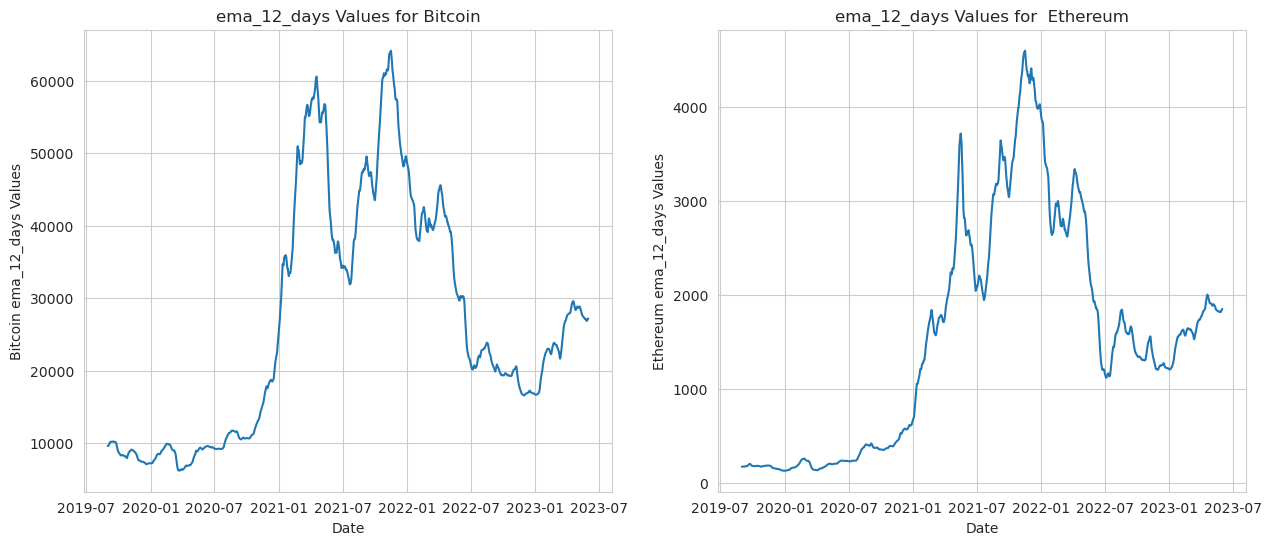

In [104]:
draw_lineplot_for_bitcoin_and_ethereum("ema_12_days")

This features seems like correlated highy with close prices for bitcoin and ethereum.

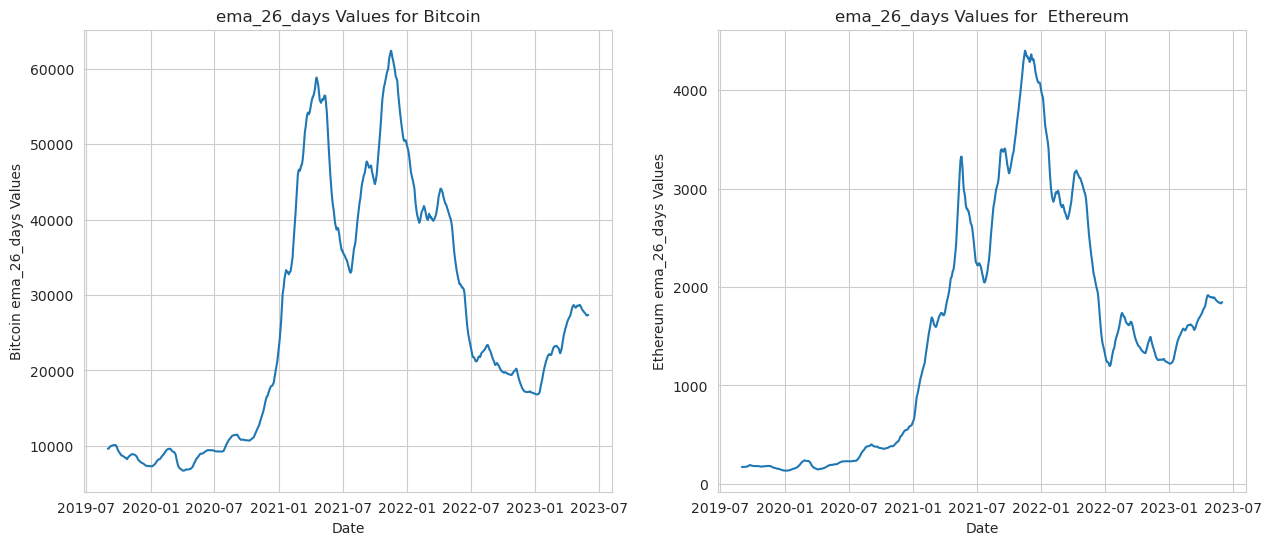

In [105]:
draw_lineplot_for_bitcoin_and_ethereum("ema_26_days")

### Bollinger Bands

[link](https://www.investopedia.com/terms/b/bollingerbands.asp)


A Bollinger Band is a technical analysis tool defined by a set of trendlines. They are plotted as two standard deviations, both positively and negatively, away from a simple moving average (SMA) of a security's price and can be adjusted to user preferences.

Bollinger Bands® was developed by technical trader John Bollinger and designed to give investors a higher probability of identifying when an asset is oversold or overbought.

**KEY TAKEAWAYS**


*   Bollinger Bands® is a technical analysis tool to generate oversold or overbought signals and was developed by John Bollinger.

*   Three lines compose Bollinger Bands: A simple moving average, or the middle band, and an upper and lower band.

*   The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average and can be modified.

*   When the price continually touches the upper Bollinger Band, it can indicate an overbought signal.

*   If the price continually touches the lower band it can indicate an oversold signal.



The first step in calculating Bollinger Bands® is to compute the simple moving average (SMA) of the security, typically using a 20-day SMA. A 20-day SMA averages the closing prices for the first 20 days as the first data point.









In [106]:
df_btc = bollinger_bands(df_btc)

In [107]:
df_eth = bollinger_bands(df_eth)

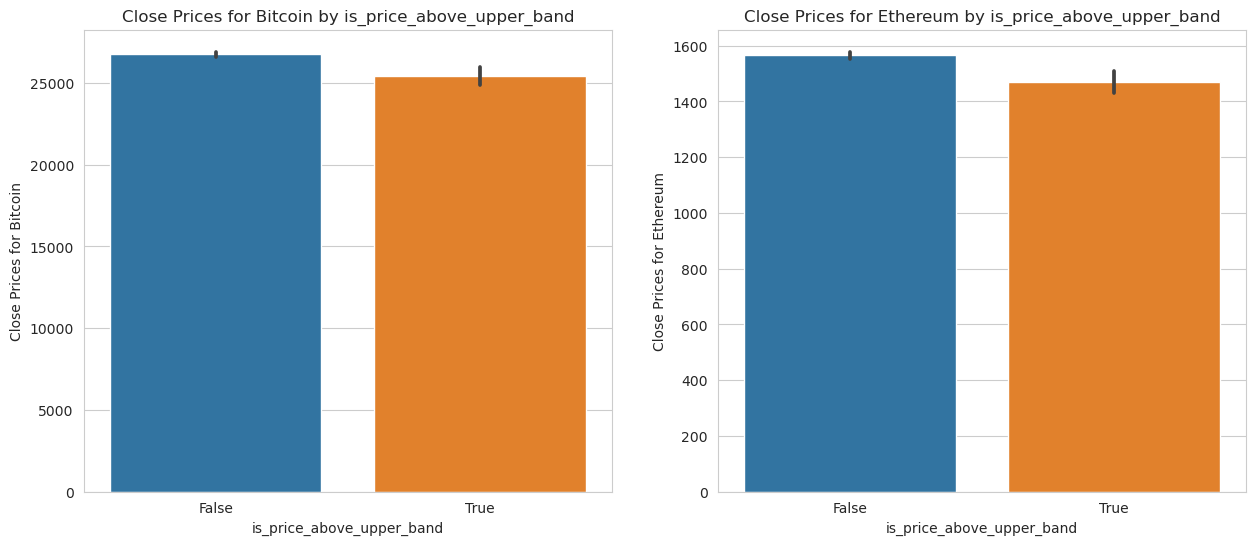

In [108]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

fig.set_size_inches(15,6)

sns.barplot(data = df_btc, x = "is_price_above_upper_band", y = "close", ax = axes[0])
axes[0].set_title("Close Prices for Bitcoin by is_price_above_upper_band")
axes[0].set_xlabel("is_price_above_upper_band")
axes[0].set_ylabel("Close Prices for Bitcoin")


sns.barplot(data = df_eth, x = "is_price_above_upper_band", y = "close", ax = axes[1])
axes[1].set_title("Close Prices for Ethereum by is_price_above_upper_band")
axes[1].set_xlabel("is_price_above_upper_band")
axes[1].set_ylabel("Close Prices for Ethereum")

plt.show()

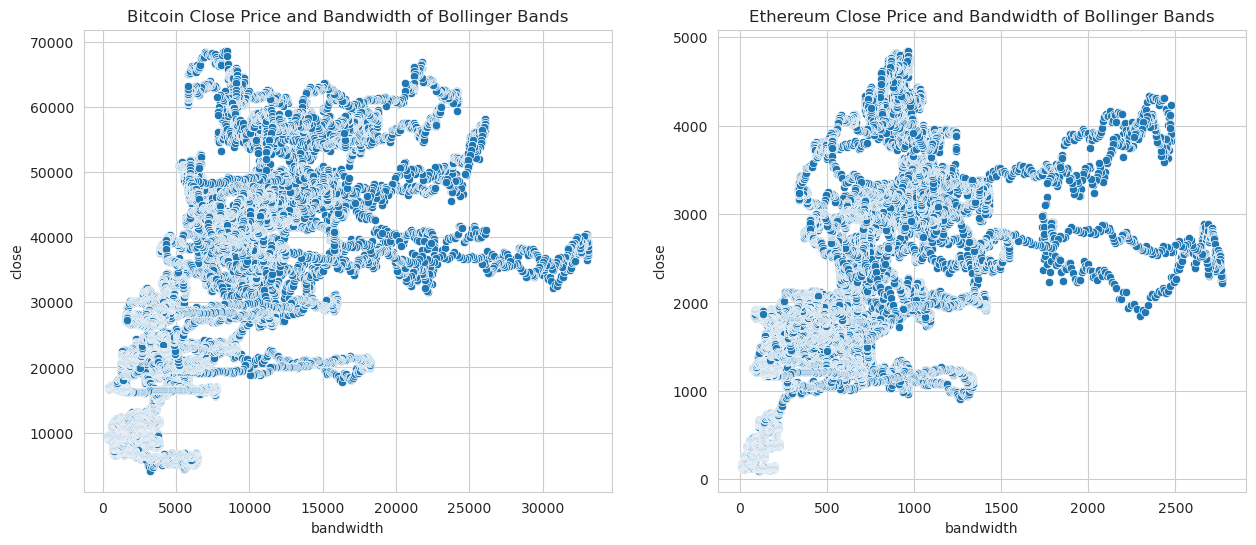

In [109]:
fig, axes = plt.subplots(nrows=1, ncols = 2)

fig.set_size_inches(15,6)

sns.scatterplot(data = df_btc, x = "bandwidth", y = "close", ax = axes[0])
axes[0].set_title("Bitcoin Close Price and Bandwidth of Bollinger Bands")

sns.scatterplot(data = df_eth, x = "bandwidth", y = "close", ax = axes[1])
axes[1].set_title("Ethereum Close Price and Bandwidth of Bollinger Bands")


plt.show()

When bandwidth greater than 6000, close price get stable form for bitcoin.When bandwidth greater than 400, close price get stable form for ethereum

In [110]:
df_btc["is_bandwidth_gt_6000"] = df_btc["bandwidth"].apply(lambda x: 1 if x >= 6000 else 0)
df_eth["is_bandwidth_gt_400"] = df_eth["bandwidth"].apply(lambda x: 1 if x >= 400 else 0)

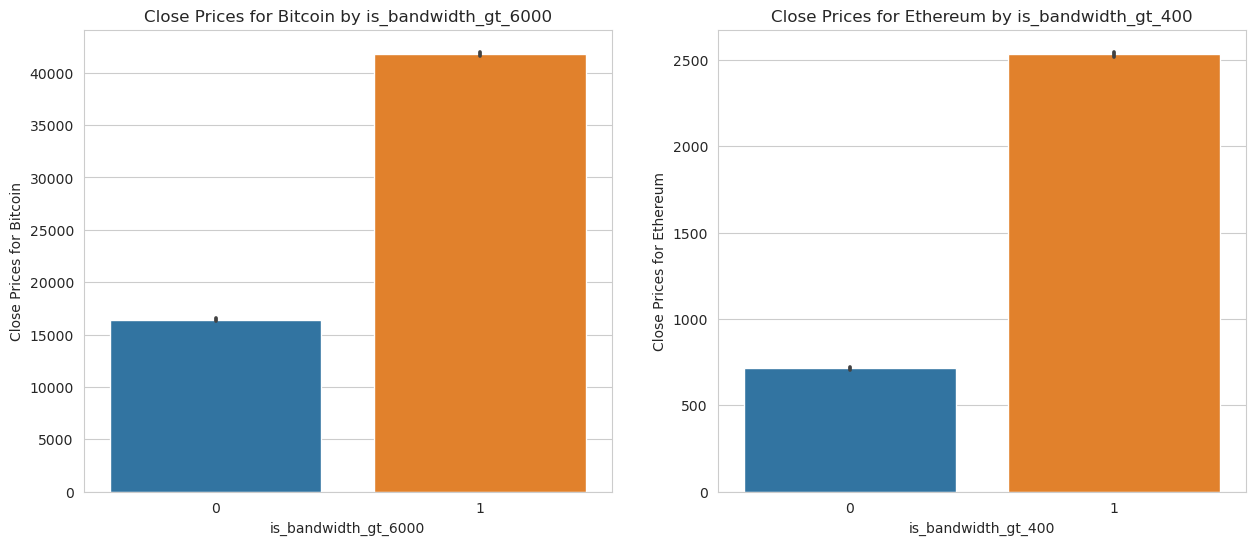

In [111]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

fig.set_size_inches(15,6)

sns.barplot(data = df_btc, x = "is_bandwidth_gt_6000", y = "close", ax = axes[0])
axes[0].set_title("Close Prices for Bitcoin by is_bandwidth_gt_6000")
axes[0].set_xlabel("is_bandwidth_gt_6000")
axes[0].set_ylabel("Close Prices for Bitcoin")


sns.barplot(data = df_eth, x = "is_bandwidth_gt_400", y = "close", ax = axes[1])
axes[1].set_title("Close Prices for Ethereum by is_bandwidth_gt_400")
axes[1].set_xlabel("is_bandwidth_gt_400")
axes[1].set_ylabel("Close Prices for Ethereum")

plt.show()

## External Datasets

### Create Daily Basis Datasets

Most of external datasets are daily basis. So, I am gonna create datasets which daily basis and use external datasets to feature engineering. We can compare hourly basis and daily basis performance score

In [112]:
# Create Datasets Daily Basis with using last hour in day
df_btc_daily = df_btc.resample("D").last()
df_eth_daily = df_eth.resample("D").last()

In [113]:
df_btc_daily.head()

open      high       low     close       volume  quote_volume  \
2019-09-01   9774.98   9795.58   9708.15   9724.98  3009.615495           2.0   
2019-09-02  10356.72  10380.12  10258.34  10340.00  1982.950330           2.0   
2019-09-03  10692.35  10694.44  10468.06  10615.28  4609.495321           4.0   
2019-09-04  10547.96  10585.07  10510.89  10567.02  1554.364686           1.0   
2019-09-05  10572.67  10607.69  10555.00  10564.49  1057.713745           1.0   

            count  taker_buy_volume  taher_buy_quote_volume  \
2019-09-01    1.0       2472.136322            2.405025e+07   
2019-09-02    1.0       1096.578454            1.133158e+07   
2019-09-03    3.0       2148.400868            2.272098e+07   
2019-09-04    1.0        636.439605            6.718524e+06   
2019-09-05    1.0        372.900255            3.945804e+06   

            quantile_transform_close_price  ...   ema_12_days  ema_26_days  \
2019-09-01                       -0.821135  ...   9616.743805  9616.867255   
2019-09-02                       -0.716780  ...   9666.330792  9640.381942   
2019-09-03                       -0.676133  ...   9796.406335  9704.795965   
2019-09-04                       -0.683785  ...   9911.128060  9766.882294   
2019-09-05                       -0.684197  ...  10008.987982  9824.763193   

            middle_band  std_dev  upper_band  lower_band  \
2019-09-01          NaN      NaN         NaN         NaN   
2019-09-02          NaN      NaN         NaN         NaN   
2019-09-03          NaN      NaN         NaN         NaN   
2019-09-04          NaN      NaN         NaN         NaN   
2019-09-05          NaN      NaN         NaN         NaN   

            is_price_above_upper_band  is_price_below_lower_band  bandwidth  \
2019-09-01                      False                      False        NaN   
2019-09-02                      False                      False        NaN   
2019-09-03                      False                      False        NaN   
2019-09-04                      False                      False        NaN   
2019-09-05                      False                      False        NaN   

            is_bandwidth_gt_6000  
2019-09-01                     0  
2019-09-02                     0  
2019-09-03                     0  
2019-09-04                     0  
2019-09-05                     0  

[5 rows x 27 columns]

In [114]:
df_eth_daily.head()

open    high     low   close       volume  quote_volume  count  \
2019-09-01  171.66  171.98  170.33  170.74   7942.55511           1.0    1.0   
2019-09-02  177.80  178.19  177.04  178.05   8484.33705           1.0    1.0   
2019-09-03  180.95  181.00  176.89  178.75  38782.28798           2.0    2.0   
2019-09-04  174.46  174.99  173.51  174.72  19256.87352           1.0    1.0   
2019-09-05  174.60  175.66  173.68  173.75   6999.93019           1.0    1.0   

            taker_buy_volume  taher_buy_quote_volume  \
2019-09-01        4410.87963            7.534687e+05   
2019-09-02        3866.87644            6.874953e+05   
2019-09-03       19130.96080            3.423292e+06   
2019-09-04       10820.14984            1.886582e+06   
2019-09-05        4000.86577            6.992962e+05   

            quantile_transform_close_price  ...  ema_12_days  ema_26_days  \
2019-09-01                       -1.406048  ...   172.200104   172.330923   
2019-09-02                       -1.264972  ...   172.389592   172.407247   
2019-09-03                       -1.254471  ...   173.377059   172.880255   
2019-09-04                       -1.315937  ...   173.929922   173.185650   
2019-09-05                       -1.341634  ...   173.778041   173.168863   

            middle_band  std_dev  upper_band  lower_band  \
2019-09-01          NaN      NaN         NaN         NaN   
2019-09-02          NaN      NaN         NaN         NaN   
2019-09-03          NaN      NaN         NaN         NaN   
2019-09-04          NaN      NaN         NaN         NaN   
2019-09-05          NaN      NaN         NaN         NaN   

            is_price_above_upper_band  is_price_below_lower_band  bandwidth  \
2019-09-01                      False                      False        NaN   
2019-09-02                      False                      False        NaN   
2019-09-03                      False                      False        NaN   
2019-09-04                      False                      False        NaN   
2019-09-05                      False                      False        NaN   

            is_bandwidth_gt_400  
2019-09-01                    0  
2019-09-02                    0  
2019-09-03                    0  
2019-09-04                    0  
2019-09-05                    0  

[5 rows x 27 columns]

### Twitter Sentiment Analysis

In [115]:
# Create directory for datasets
dir_btc_twitter = "/kaggle/input/intotheblock-bitcoin-onchain-data/ITB_btc_twitter_sentiment_undefined_2023-06-19T16_48_29.104Z.csv"
dir_eth_twitter = "/kaggle/input/intotheblock-ethereum-onchain-data/ITB_eth_twitter_sentiment_undefined_2023-06-19T17_35_56.471Z.csv"


In [116]:
# Assign datasets to variables
df_btc_twitter = pd.read_csv(dir_btc_twitter)
df_eth_twitter = pd.read_csv(dir_eth_twitter)

In [117]:
df_btc_twitter.head()

DateTime  Positive  Neutral  Negative      Price
0  2019-07-19 00:00:00     908.0   6289.0     297.0  10446.285
1  2019-07-20 00:00:00    1553.0   9950.0     429.0  10736.755
2  2019-07-21 00:00:00    1392.0   9478.0     360.0  10581.940
3  2019-07-22 00:00:00    1706.0  10734.0     444.0  10374.335
4  2019-07-23 00:00:00    1554.0  10801.0     473.0  10074.525

In [118]:
df_eth_twitter.head()

DateTime  Positive  Neutral  Negative    Price
0  2019-07-19 00:00:00     330.0   2380.0      91.0  220.260
1  2019-07-20 00:00:00     492.0   3353.0     122.0  228.010
2  2019-07-21 00:00:00     428.0   3566.0     115.0  223.560
3  2019-07-22 00:00:00     545.0   4293.0     104.0  219.935
4  2019-07-23 00:00:00     455.0   4132.0     109.0  213.825

In [119]:
df_btc_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  1431 non-null   object 
 1   Positive  1415 non-null   float64
 2   Neutral   1415 non-null   float64
 3   Negative  1415 non-null   float64
 4   Price     1431 non-null   float64
dtypes: float64(4), object(1)
memory usage: 56.0+ KB


In [120]:
df_eth_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  1431 non-null   object 
 1   Positive  1421 non-null   float64
 2   Neutral   1421 non-null   float64
 3   Negative  1421 non-null   float64
 4   Price     1431 non-null   float64
dtypes: float64(4), object(1)
memory usage: 56.0+ KB


In [121]:
# Change DateTime column datatype to datetime
df_btc_twitter["DateTime"] = pd.to_datetime(df_btc_twitter["DateTime"])
df_eth_twitter["DateTime"] = pd.to_datetime(df_eth_twitter["DateTime"])

In [122]:
# Merge dataset by dates
df_btc_daily = pd.merge(df_btc_daily.reset_index(), df_btc_twitter, left_on = "index", right_on= "DateTime")
df_eth_daily = pd.merge(df_eth_daily.reset_index(), df_eth_twitter, left_on = "index", right_on= "DateTime")

In [123]:
#Set date as a index
df_btc_daily = df_btc_daily.set_index("index")
df_eth_daily = df_eth_daily.set_index("index")

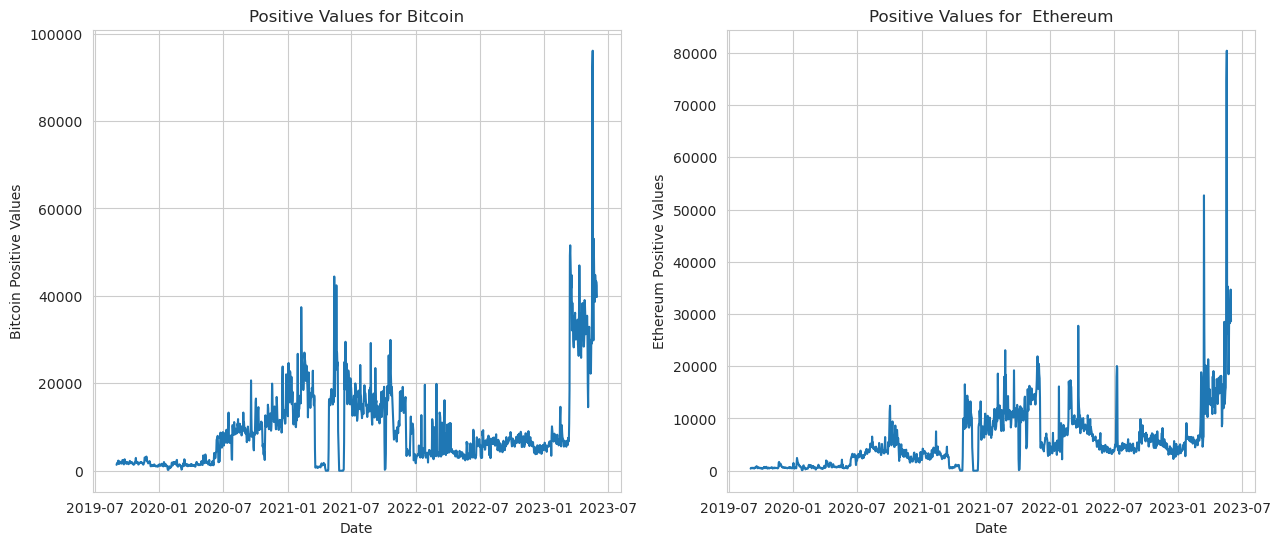

In [124]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Positive Values
sns.set_style("whitegrid")

# Draw lineplot for Bitcoin Positive Values
sns.lineplot(data = df_btc_daily["Positive"], ax = axes[0])
axes[0].set_title("Positive Values for Bitcoin")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Bitcoin Positive Values")

# Draw lineplot for Ethereum Positive Values
sns.lineplot(data = df_eth_daily["Positive"], ax = axes[1])
axes[1].set_title("Positive Values for  Ethereum")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Ethereum Positive Values")

plt.show()

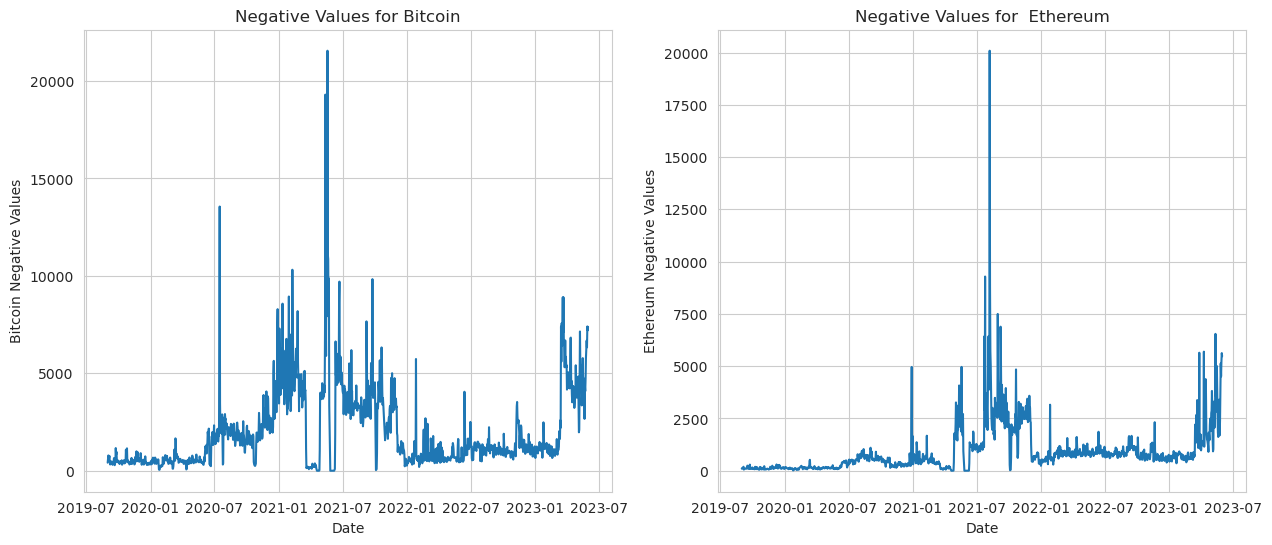

In [125]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Negative Values
sns.set_style("whitegrid")

# Draw lineplot for Bitcoin Negative Values
sns.lineplot(data = df_btc_daily["Negative"], ax = axes[0])
axes[0].set_title("Negative Values for Bitcoin")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Bitcoin Negative Values")

# Draw lineplot for Ethereum Negative Values
sns.lineplot(data = df_eth_daily["Negative"], ax = axes[1])
axes[1].set_title("Negative Values for  Ethereum")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Ethereum Negative Values")

plt.show()

In [126]:
# Create columns with using  positive and negative columns
df_btc_daily["sum_of_tweets"] = df_btc_daily["Positive"] + df_btc_daily["Negative"] + df_btc_daily["Neutral"]
df_eth_daily["sum_of_tweets"] = df_eth_daily["Positive"] + df_eth_daily["Negative"] + df_eth_daily["Neutral"]


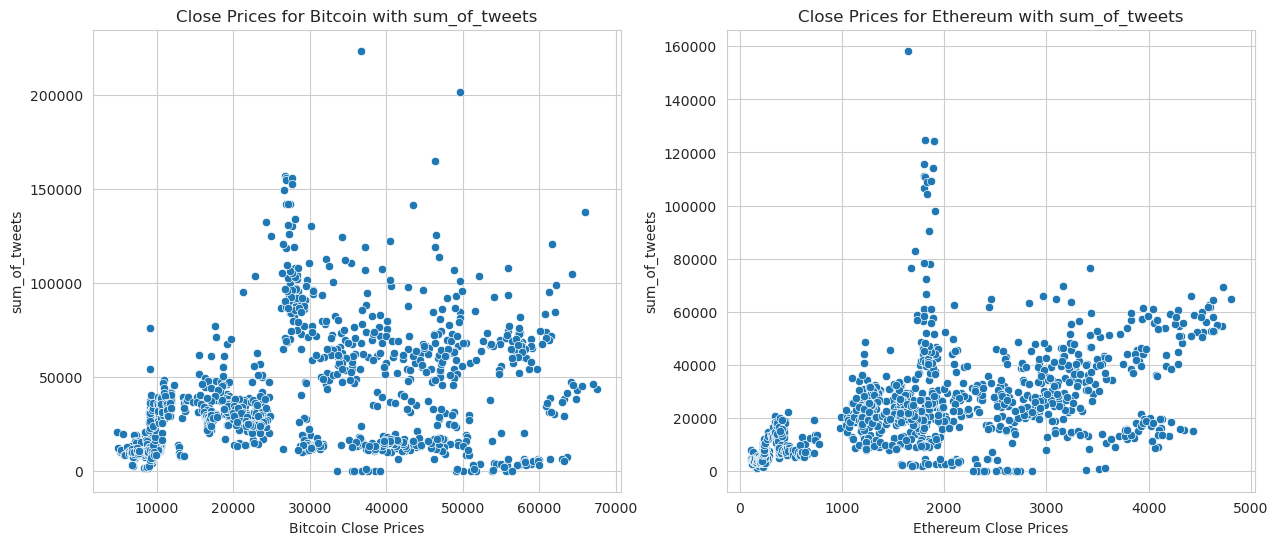

In [127]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw scatterplot to see correalation between close prices and sum_of_tweets
sns.scatterplot(data = df_btc_daily, x = "close", y = "sum_of_tweets", ax = axes[0])
axes[0].set_title(f"Close Prices for Bitcoin with sum_of_tweets")
axes[0].set_ylabel("sum_of_tweets")
axes[0].set_xlabel(f"Bitcoin Close Prices")

# Draw scatterplot to see correalation between close prices and sum_of_tweets
sns.scatterplot(data = df_eth_daily, x = "close", y = "sum_of_tweets", ax = axes[1])
axes[1].set_title("Close Prices for Ethereum with sum_of_tweets")
axes[1].set_ylabel("sum_of_tweets")
axes[1].set_xlabel(f"Ethereum Close Prices")

plt.show()

Sum of tweets and close prices seems like has a positive relationship

In [128]:
df_btc_daily["close"].corr(df_btc_daily["sum_of_tweets"]), df_eth_daily["close"].corr(df_eth_daily["sum_of_tweets"])

(0.34888159251971246, 0.5793903095638689)

In [129]:
# Drop features except sum_of_tweets
drop_cols = ["Positive", "Neutral", "Negative", "Price", "DateTime"]
df_btc_daily = df_btc_daily.drop(drop_cols, axis = 1)
df_eth_daily = df_eth_daily.drop(drop_cols, axis = 1)

### Total_Flows

[Link](https://resources.intotheblock.com/indicators/order-books/on-chain-flows/total-flows)

IntoTheBlock uses machine learning algorithms to identify centralized exchanges’ deposit and withdrawal addresses. Through this process, IntoTheBlock measures the total activity flowing in and out of centralized exchanges. The result is the Total Flows indicator which is measured the following way:

Total Flows = Inflow Volume + Outflow Volume

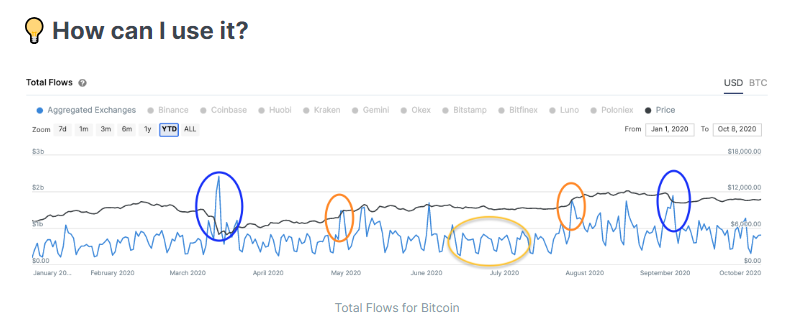

The Total Flows indicator provides indication of instances of high centralized exchange activity. So when does centralized exchange activity tend to increase?
In general, we see spikes in Total Flows when there are either local tops/bottoms (shown in blue), but also when there are price breakouts (orange). Conversely, Total Flows tend to drop during periods of accumulation or consolidation as highlighted in yellow.
While Total Flows can be indicative of market positioning, there are also natural flows managed by centralized exchanges which can lead to sudden outliers that may not necessarily be predictive of price changes.



In [130]:
# Create directory of datasets for total flows
dir_btc_total_flow = "/kaggle/input/intotheblock-bitcoin-onchain-data/ITB_btc_total_flows_undefined_2023-06-19T16_46_32.829Z.csv"
dir_eth_total_flow = "/kaggle/input/intotheblock-ethereum-onchain-data/ITB_eth_total_flows_undefined_2023-06-19T17_34_46.711Z.csv"

In [131]:
# Create dataframws with using directories
df_btc_total_flow = pd.read_csv(dir_btc_total_flow)
df_eth_total_flow = pd.read_csv(dir_eth_total_flow)

In [132]:
df_btc_total_flow.head()

DateTime  Aggregated Exchanges   Price
0  2011-07-15 00:00:00              0.541331  13.795
1  2011-07-16 00:00:00              0.345183  13.655
2  2011-07-17 00:00:00              0.120000  13.385
3  2011-07-18 00:00:00              0.300956  13.215
4  2011-07-19 00:00:00              1.268427  14.070

In [133]:
df_eth_total_flow.head()

DateTime  Aggregated Exchanges  Price
0  2015-07-30 00:00:00             666.87500    NaN
1  2015-07-31 00:00:00            1265.31250    NaN
2  2015-08-01 00:00:00             759.68750    NaN
3  2015-08-02 00:00:00            1002.18750    NaN
4  2015-08-03 00:00:00             851.40625    NaN

In [134]:
df_btc_total_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              4357 non-null   object 
 1   Aggregated Exchanges  4357 non-null   float64
 2   Price                 4357 non-null   float64
dtypes: float64(2), object(1)
memory usage: 102.2+ KB


In [135]:
df_eth_total_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              2881 non-null   object 
 1   Aggregated Exchanges  2881 non-null   float64
 2   Price                 2873 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.6+ KB


In [136]:
# Change datetime features data type
df_btc_total_flow["DateTime"] = pd.to_datetime(df_btc_total_flow["DateTime"])
df_eth_total_flow["DateTime"] = pd.to_datetime(df_eth_total_flow["DateTime"])

# Merge dataset by dates
df_btc_daily = pd.merge(df_btc_daily.reset_index(), df_btc_total_flow, left_on = "index", right_on= "DateTime")
df_eth_daily = pd.merge_asof(df_eth_daily.reset_index(), df_eth_total_flow, left_on = "index", right_on= "DateTime")

In [137]:
#Set date as a index
df_btc_daily = df_btc_daily.set_index("index")
df_eth_daily = df_eth_daily.set_index("index")

In [138]:
# Change feature names
df_btc_daily = df_btc_daily.rename(columns = {"Aggregated Exchanges": "total_flows"})
df_eth_daily = df_eth_daily.rename(columns = {"Aggregated Exchanges": "total_flows"})

I am gonna try to find local minima and maxima points

In [139]:
# Find local minima indices
minima_indices_total_flows_btc = argrelextrema(data = df_btc_daily["total_flows"].values, comparator = np.less, order = 45)[0]
minima_indices_total_flows_eth = argrelextrema(data = df_eth_daily["total_flows"].values, comparator = np.less, order = 45)[0]

# Find local maxima indices
maxima_indices_total_flows_btc = argrelextrema(data = df_btc_daily["total_flows"].values, comparator = np.greater, order = 45)[0]
maxima_indices_total_flows_eth = argrelextrema(data = df_eth_daily["total_flows"].values, comparator = np.greater, order = 45)[0]


# Find local minima points
df_btc_daily["local_minima_total_flows"] = df_btc_daily.iloc[minima_indices_total_flows_btc]["total_flows"]
df_eth_daily["local_minima_total_flows"] = df_eth_daily.iloc[minima_indices_total_flows_eth]["total_flows"]

# Find local maxima points
df_btc_daily["local_maxima_total_flows"] = df_btc_daily.iloc[maxima_indices_total_flows_btc]["total_flows"]
df_eth_daily["local_maxima_total_flows"] = df_eth_daily.iloc[maxima_indices_total_flows_eth]["total_flows"]

Now, we can check to local minima and local maxima points accuracy

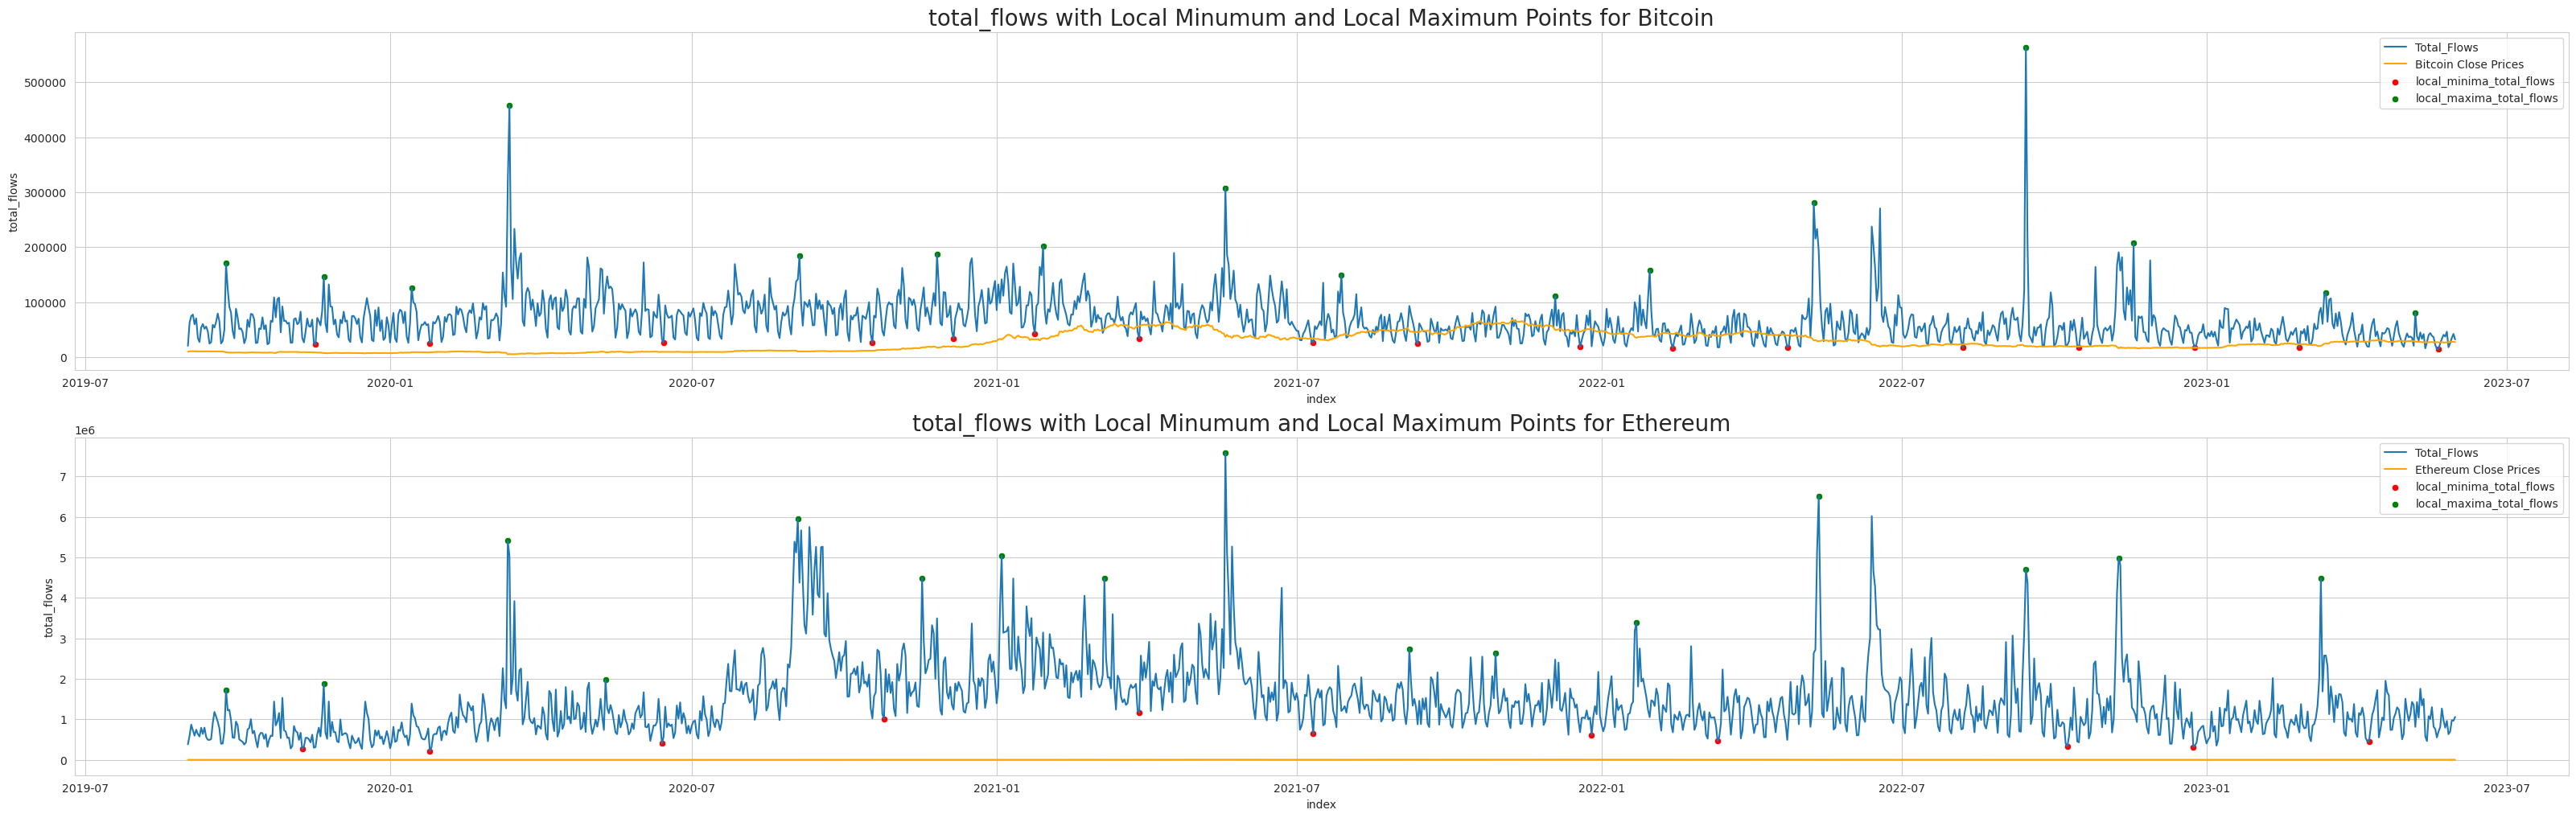

In [140]:
draw_scatterplot_and_lineplot(df_btc_daily, df_eth_daily, feature = "total_flows")

Now, we can change local minima and local maxima points data type as binary variables.

In [141]:
# Change local minima points to binary variables
df_btc_daily["local_minima_total_flows"] = df_btc_daily["local_minima_total_flows"].notnull().astype(int)
df_eth_daily["local_minima_total_flows"] = df_eth_daily["local_minima_total_flows"].notnull().astype(int)

# Change local maxima points to binary variables
df_btc_daily["local_maxima_total_flows"] = df_btc_daily["local_maxima_total_flows"].notnull().astype(int)
df_eth_daily["local_maxima_total_flows"] = df_eth_daily["local_maxima_total_flows"].notnull().astype(int)

In [142]:
# Change features name as a logically
df_btc_daily = df_btc_daily.rename(columns = {"local_minima_total_flows": "is_local_minima_total_flows", "local_maxima_total_flows": "is_local_maxima_total_flows"})
df_eth_daily = df_eth_daily.rename(columns = {"local_minima_total_flows": "is_local_minima_total_flows", "local_maxima_total_flows": "is_local_maxima_total_flows"})

In [143]:
# Drop features which not important
drop_features = ["DateTime", "Price"]
df_btc_daily = df_btc_daily.drop(drop_features, axis = 1)
df_eth_daily = df_eth_daily.drop(drop_features, axis = 1)

### Inflow Volume

[Link](https://resources.intotheblock.com/indicators/order-books/on-chain-flows/inflow-volume)


IntoTheBlock has built a proprietary machine learning powered classifier to identify addresses of top centralized exchanges, including their deposit addresses, withdrawal addresses, hot wallets and cold wallets. With this classifier, IntoTheBlock can measure the total amount of a given crypto-asset flowing into exchanges and measures this in dollar and crypto terms. The result is the Inflow Volume indicator.

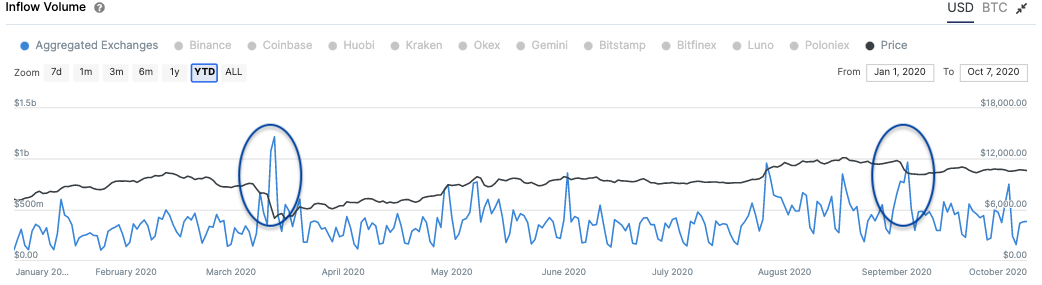
Exchange inflows are helpful to track funds going into exchanges. Spikes in inflows tend to coincide with and sometimes precede periods of high volatility as shown above. This can potentially be interpreted as a sign of holders looking to sell in centralized exchanges.

At the same time, there are natural fluctuations in inflows as centralized exchanges and institutional players manage their funds. For instance, unsurprisingly inflows tend to drop on weekends and increase during the week.
Overall, Inflow Volume can be helpful to spot periods of high volatility, but users should also consider there are natural fluctuations in the indicator which make it less predictive during periods of low volatility.

In [144]:
# Create directory of datasets for inflow volumes
dir_btc_inflow = "/kaggle/input/intotheblock-bitcoin-onchain-data/ITB_btc_inflow_volume_undefined_2023-06-19T16_45_51.762Z.csv"
dir_eth_inflow = "/kaggle/input/intotheblock-ethereum-onchain-data/ITB_eth_inflow_volume_undefined_2023-06-19T17_34_21.461Z.csv"

In [145]:
# Create dataframws with using directories
df_btc_inflow = pd.read_csv(dir_btc_inflow)
df_eth_inflow = pd.read_csv(dir_eth_inflow)

In [146]:
df_btc_inflow.head()

DateTime  Aggregated Exchanges   Price
0  2011-07-15 00:00:00              7.467657  13.795
1  2011-07-16 00:00:00              4.713468  13.655
2  2011-07-17 00:00:00              1.606200  13.385
3  2011-07-18 00:00:00              3.977129  13.215
4  2011-07-19 00:00:00              0.365232  14.070

In [147]:
df_eth_inflow.head()

DateTime  Aggregated Exchanges  Price
0  2015-07-30 00:00:00             666.87500    NaN
1  2015-07-31 00:00:00            1265.31250    NaN
2  2015-08-01 00:00:00             759.68750    NaN
3  2015-08-02 00:00:00            1002.18750    NaN
4  2015-08-03 00:00:00             851.40625    NaN

In [148]:
df_btc_inflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              4357 non-null   object 
 1   Aggregated Exchanges  4357 non-null   float64
 2   Price                 4357 non-null   float64
dtypes: float64(2), object(1)
memory usage: 102.2+ KB


In [149]:
df_eth_inflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              2881 non-null   object 
 1   Aggregated Exchanges  2881 non-null   float64
 2   Price                 2873 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.6+ KB


There are 8 null values on Price feature, but this feature not important for us

In [150]:
# Change datetime features data type
df_btc_inflow["DateTime"] = pd.to_datetime(df_btc_inflow["DateTime"])
df_eth_inflow["DateTime"] = pd.to_datetime(df_eth_inflow["DateTime"])

# Merge dataset by dates
df_btc_daily = pd.merge(df_btc_daily.reset_index(), df_btc_total_flow, left_on = "index", right_on= "DateTime")
df_eth_daily = pd.merge_asof(df_eth_daily.reset_index(), df_eth_total_flow, left_on = "index", right_on= "DateTime")

In [151]:
#Set date as a index
df_btc_daily = df_btc_daily.set_index("index")
df_eth_daily = df_eth_daily.set_index("index")

In [152]:
# Change feature names
df_btc_daily = df_btc_daily.rename(columns = {"Aggregated Exchanges": "inflow"})
df_eth_daily = df_eth_daily.rename(columns = {"Aggregated Exchanges": "inflow"})

In [153]:
# Find local maxima indices
maxima_indices_inflow_btc = argrelextrema(data = df_btc_daily["inflow"].values, comparator = np.greater, order = 45)[0]
maxima_indices_inflow_eth = argrelextrema(data = df_eth_daily["inflow"].values, comparator = np.greater, order = 45)[0]

# Find local maxima points
df_btc_daily["local_maxima_inflow"] = df_btc_daily.iloc[maxima_indices_inflow_btc]["inflow"]
df_eth_daily["local_maxima_inflow"] = df_eth_daily.iloc[maxima_indices_inflow_eth]["inflow"]

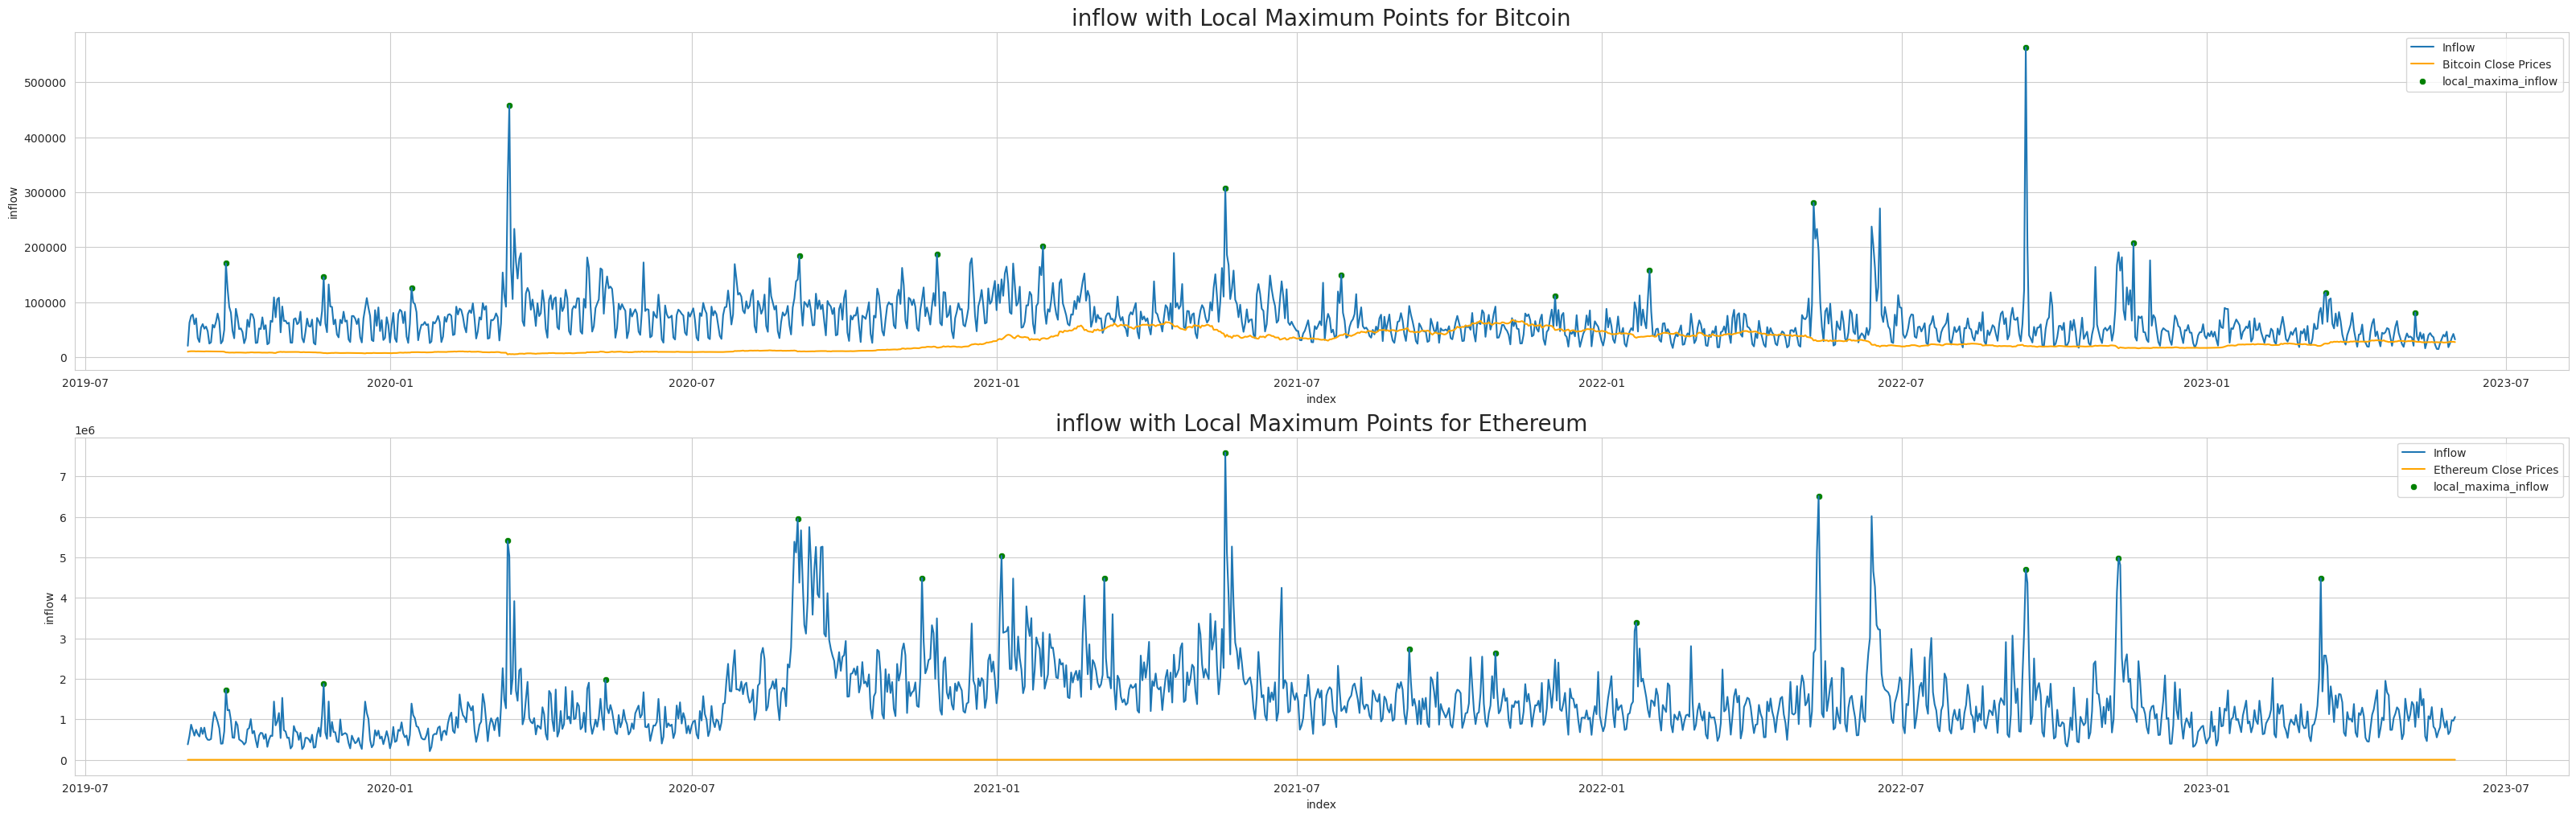

In [154]:
draw_scatterplot_and_lineplot(df_btc_daily, df_eth_daily, feature = "inflow", is_minima=False)

In [155]:
# Change local maxima points to binary variables
df_btc_daily["local_maxima_inflow"] = df_btc_daily["local_maxima_inflow"].notnull().astype(int)
df_eth_daily["local_maxima_inflow"] = df_eth_daily["local_maxima_inflow"].notnull().astype(int)

In [156]:
# Change features name as a logically
df_btc_daily = df_btc_daily.rename(columns = {"local_maxima_inflow": "is_local_maxima_inflow"})
df_eth_daily = df_eth_daily.rename(columns = {"local_maxima_inflow": "is_local_maxima_inflow"})

In [157]:
# Drop features which not important
drop_features = ["DateTime", "Price"]
df_btc_daily = df_btc_daily.drop(drop_features, axis = 1)
df_eth_daily = df_eth_daily.drop(drop_features, axis = 1)

### Outflow Volume

[Link](https://resources.intotheblock.com/indicators/order-books/on-chain-flows/outflow-volume)

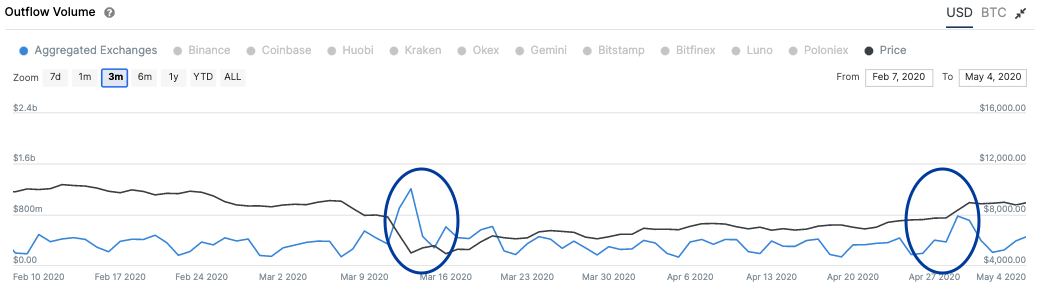

While Inflow Volume at times anticipate volatility, Outflow Volume is often more reactive. In other words, Outflow Volume often spikes following either a crash or a significant break-out as shown in the example above. This could potentially be interpreted as users going long and opting to hold their crypto outside centralized exchanges.

In [158]:
# Create directory of datasets for total flows
dir_btc_outflow = "/kaggle/input/intotheblock-bitcoin-onchain-data/ITB_btc_outflow_volume_undefined_2023-06-19T16_46_17.119Z.csv"
dir_eth_outflow = "/kaggle/input/intotheblock-ethereum-onchain-data/ITB_eth_outflow_volume_undefined_2023-06-19T17_34_32.118Z.csv"

In [159]:
# Create dataframws with using directories
df_btc_outflow = pd.read_csv(dir_btc_outflow)
df_eth_outflow = pd.read_csv(dir_eth_outflow)

In [160]:
df_btc_outflow.head()

DateTime  Aggregated Exchanges   Price
0  2011-07-15 00:00:00              0.000000  13.795
1  2011-07-16 00:00:00              0.000000  13.655
2  2011-07-17 00:00:00              0.000000  13.385
3  2011-07-18 00:00:00              0.000000  13.215
4  2011-07-19 00:00:00              1.242469  14.070

In [161]:
df_eth_outflow.head()

DateTime  Aggregated Exchanges  Price
0  2015-07-30 00:00:00                   0.0    NaN
1  2015-07-31 00:00:00                   0.0    NaN
2  2015-08-01 00:00:00                   0.0    NaN
3  2015-08-02 00:00:00                   0.0    NaN
4  2015-08-03 00:00:00                   0.0    NaN

In [162]:
df_btc_outflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              4357 non-null   object 
 1   Aggregated Exchanges  4357 non-null   float64
 2   Price                 4357 non-null   float64
dtypes: float64(2), object(1)
memory usage: 102.2+ KB


In [163]:
df_eth_outflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              2881 non-null   object 
 1   Aggregated Exchanges  2881 non-null   float64
 2   Price                 2873 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.6+ KB


In [164]:
# Change datetime features data type
df_btc_outflow["DateTime"] = pd.to_datetime(df_btc_outflow["DateTime"])
df_eth_outflow["DateTime"] = pd.to_datetime(df_eth_outflow["DateTime"])

# Merge dataset by dates
df_btc_daily = pd.merge(df_btc_daily.reset_index(), df_btc_outflow, left_on = "index", right_on= "DateTime")
df_eth_daily = pd.merge_asof(df_eth_daily.reset_index(), df_eth_outflow, left_on = "index", right_on= "DateTime")

In [165]:
#Set date as a index
df_btc_daily = df_btc_daily.set_index("index")
df_eth_daily = df_eth_daily.set_index("index")

In [166]:
# Change feature names
df_btc_daily = df_btc_daily.rename(columns = {"Aggregated Exchanges": "outflow"})
df_eth_daily = df_eth_daily.rename(columns = {"Aggregated Exchanges": "outflow"})

In [167]:
# Find local maxima indices
maxima_indices_outflow_btc = argrelextrema(data = df_btc_daily["outflow"].values, comparator = np.greater, order = 45)[0]
maxima_indices_outflow_eth = argrelextrema(data = df_eth_daily["outflow"].values, comparator = np.greater, order = 45)[0]

# Find local maxima points
df_btc_daily["local_maxima_outflow"] = df_btc_daily.iloc[maxima_indices_outflow_btc]["outflow"]
df_eth_daily["local_maxima_outflow"] = df_eth_daily.iloc[maxima_indices_outflow_eth]["outflow"]

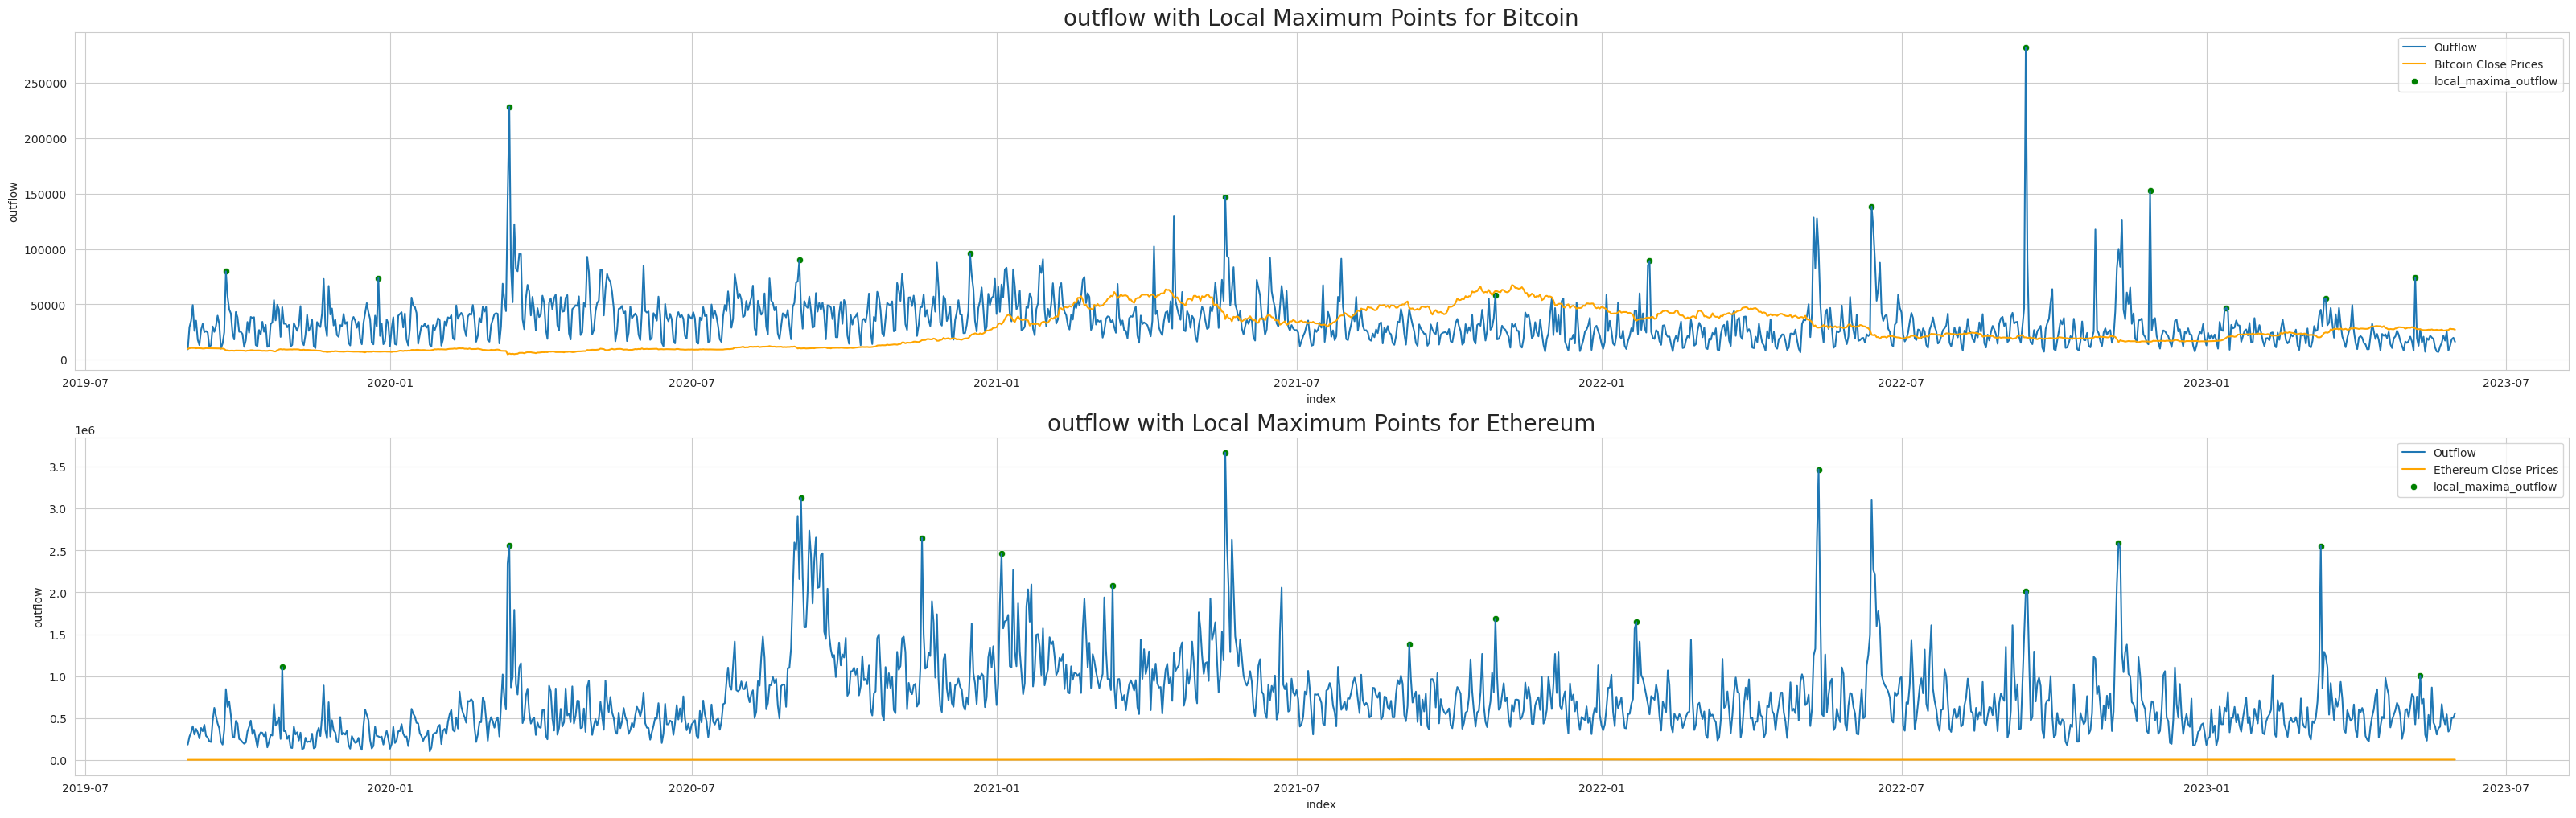

In [168]:
draw_scatterplot_and_lineplot(df_btc_daily, df_eth_daily, feature = "outflow", is_minima=False)

In [169]:
# Change local maxima points to binary variables
df_btc_daily["local_maxima_outflow"] = df_btc_daily["local_maxima_outflow"].notnull().astype(int)
df_eth_daily["local_maxima_outflow"] = df_eth_daily["local_maxima_outflow"].notnull().astype(int)

In [170]:
# Change features name as a logically
df_btc_daily = df_btc_daily.rename(columns = {"local_maxima_outflow": "is_local_maxima_outflow"})
df_eth_daily = df_eth_daily.rename(columns = {"local_maxima_outflow": "is_local_maxima_outflow"})

In [171]:
# Drop features which not important
drop_features = ["DateTime", "Price"]
df_btc_daily = df_btc_daily.drop(drop_features, axis = 1)
df_eth_daily = df_eth_daily.drop(drop_features, axis = 1)

### Outflow Transaction Count

[Link](https://resources.intotheblock.com/indicators/order-books/on-chain-flows/outflow-transaction-count)

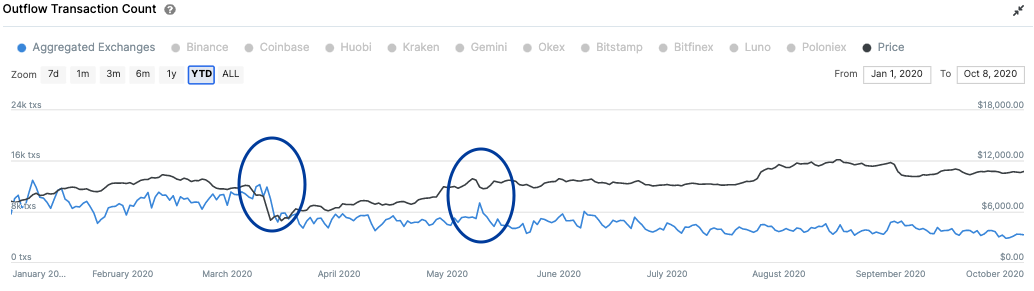

The Outflow Transaction Count indicator provides indication of users withdrawing their funds from centralized exchanges likely to store in safer cold wallets. This is a valuable approximation of users going long and opting to hold their own funds.
For this reason, outflows tend to spike as price crashes as pointed in the example above. While this can be the case on several occasions, natural fluctuations in exchanges’ flows can often have smaller spikes without regards to price action as well.

In [172]:
# Create directory of datasets for total flows
dir_btc_outflow_trainsaction_count = "/kaggle/input/intotheblock-bitcoin-onchain-data/ITB_btc_outflow_transaction_count_undefined_2023-06-19T16_46_21.236Z.csv"
dir_eth_outflow_trainsaction_count = "/kaggle/input/intotheblock-ethereum-onchain-data/ITB_eth_outflow_transaction_count_undefined_2023-06-19T17_34_35.680Z.csv"

In [173]:
# Create dataframws with using directories
df_btc_outflow_trainsaction_count = pd.read_csv(dir_btc_outflow_trainsaction_count)
df_eth_outflow_trainsaction_count = pd.read_csv(dir_eth_outflow_trainsaction_count)

In [174]:
df_btc_outflow_trainsaction_count.head()

DateTime  Aggregated Exchanges   Price
0  2011-07-15 00:00:00                     0  13.795
1  2011-07-16 00:00:00                     0  13.655
2  2011-07-17 00:00:00                     0  13.385
3  2011-07-18 00:00:00                     0  13.215
4  2011-07-19 00:00:00                     1  14.070

In [175]:
df_eth_outflow_trainsaction_count.head()

DateTime  Aggregated Exchanges  Price
0  2015-07-30 00:00:00                     0    NaN
1  2015-07-31 00:00:00                     0    NaN
2  2015-08-01 00:00:00                     0    NaN
3  2015-08-02 00:00:00                     0    NaN
4  2015-08-03 00:00:00                     0    NaN

In [176]:
df_btc_outflow_trainsaction_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              4357 non-null   object 
 1   Aggregated Exchanges  4357 non-null   int64  
 2   Price                 4357 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.2+ KB


In [177]:
df_eth_outflow_trainsaction_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              2881 non-null   object 
 1   Aggregated Exchanges  2881 non-null   int64  
 2   Price                 2873 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 67.6+ KB


In [178]:
# Change datetime features data type
df_btc_outflow_trainsaction_count["DateTime"] = pd.to_datetime(df_btc_outflow_trainsaction_count["DateTime"])
df_eth_outflow_trainsaction_count["DateTime"] = pd.to_datetime(df_eth_outflow_trainsaction_count["DateTime"])

# Merge dataset by dates
df_btc_daily = pd.merge(df_btc_daily.reset_index(), df_btc_outflow_trainsaction_count, left_on = "index", right_on= "DateTime")
df_eth_daily = pd.merge_asof(df_eth_daily.reset_index(), df_eth_outflow_trainsaction_count, left_on = "index", right_on= "DateTime")

In [179]:
#Set date as a index
df_btc_daily = df_btc_daily.set_index("index")
df_eth_daily = df_eth_daily.set_index("index")

In [180]:
# Change feature names
df_btc_daily = df_btc_daily.rename(columns = {"Aggregated Exchanges": "outflow_transaction_count"})
df_eth_daily = df_eth_daily.rename(columns = {"Aggregated Exchanges": "outflow_transaction_count"})

In [181]:
# Find local maxima indices
maxima_indices_outflow_transaction_count_btc = argrelextrema(data = df_btc_daily["outflow_transaction_count"].values, comparator = np.greater, order = 45)[0]
maxima_indices_outflow_transaction_count_eth = argrelextrema(data = df_eth_daily["outflow_transaction_count"].values, comparator = np.greater, order = 45)[0]

# Find local maxima points
df_btc_daily["local_maxima_outflow_transaction_count"] = df_btc_daily.iloc[maxima_indices_outflow_transaction_count_btc]["outflow_transaction_count"]
df_eth_daily["local_maxima_outflow_transaction_count"] = df_eth_daily.iloc[maxima_indices_outflow_transaction_count_eth]["outflow_transaction_count"]

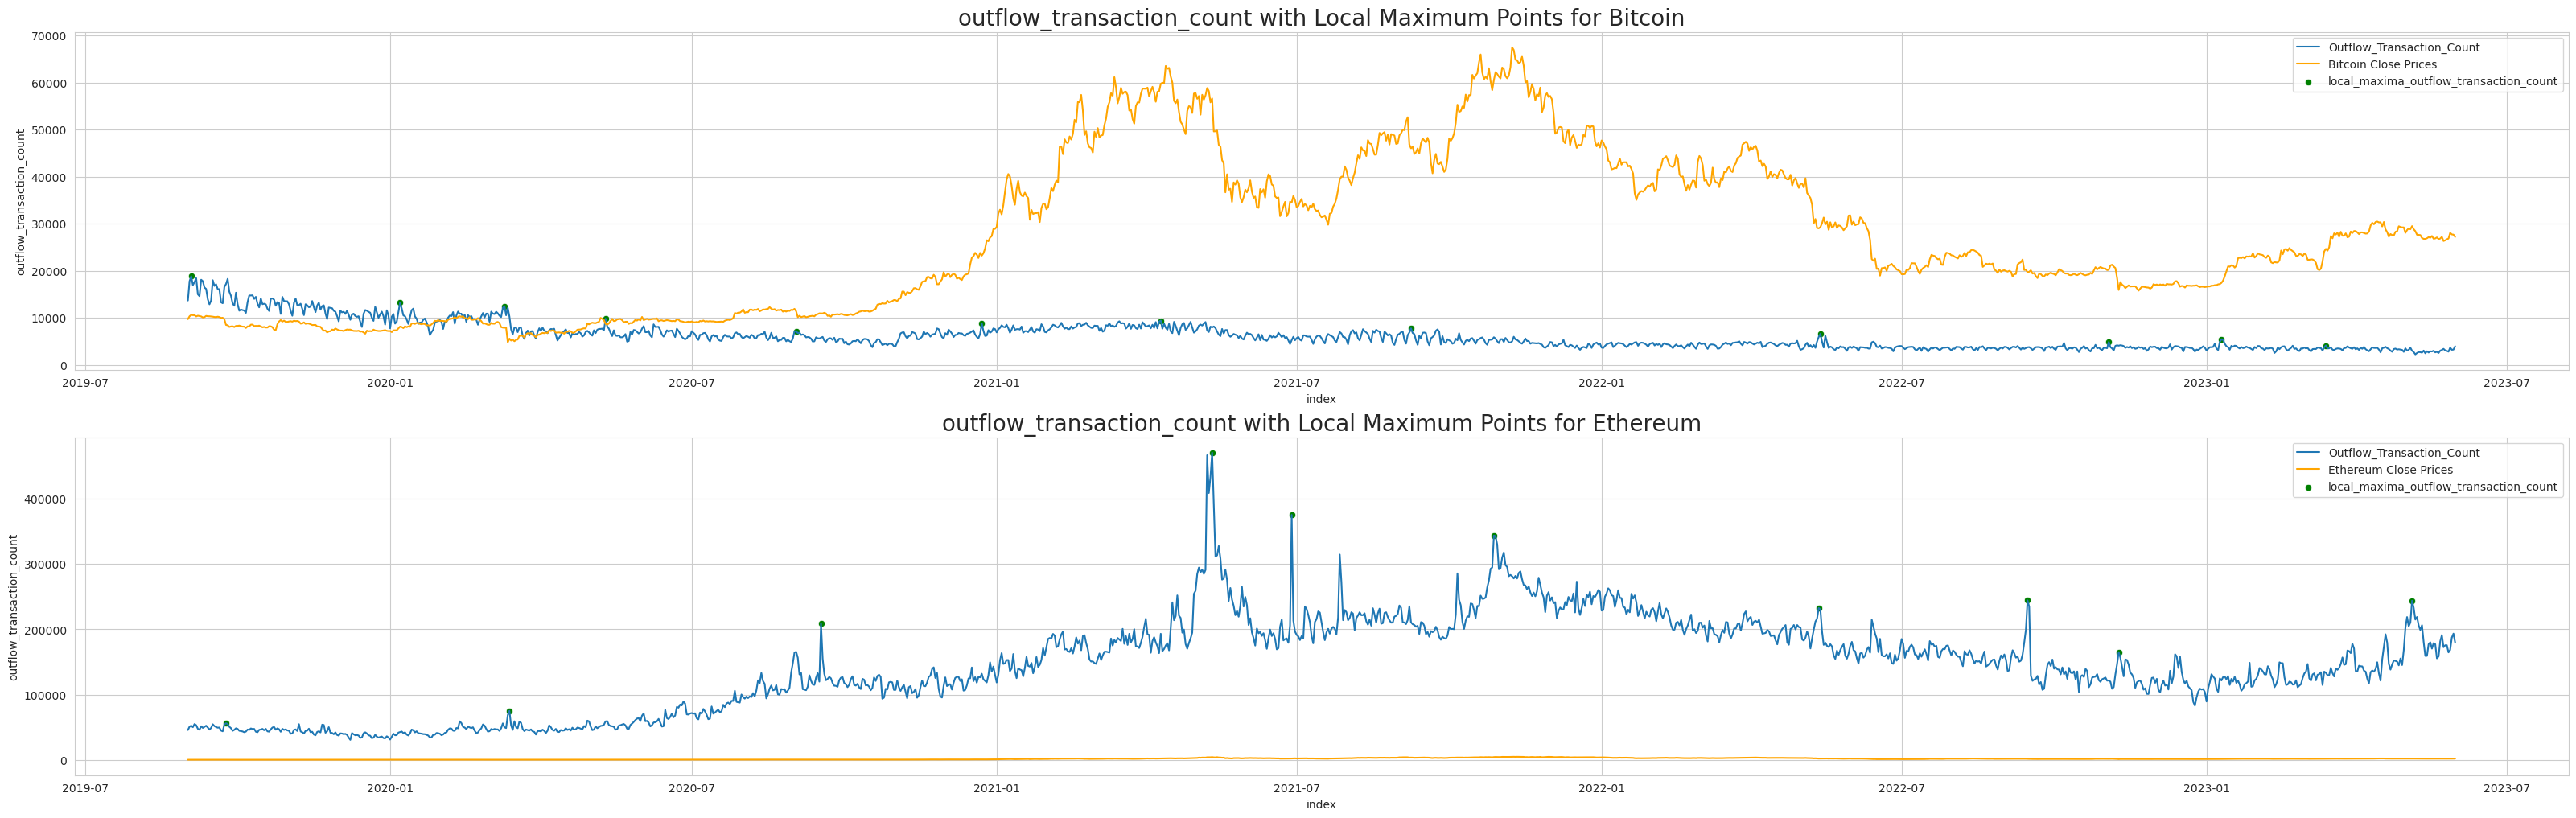

In [182]:
draw_scatterplot_and_lineplot(df_btc_daily, df_eth_daily, feature = "outflow_transaction_count", is_minima=False)

In [183]:
# Change local maxima points to binary variables
df_btc_daily["local_maxima_outflow_transaction_count"] = df_btc_daily["local_maxima_outflow_transaction_count"].notnull().astype(int)
df_eth_daily["local_maxima_outflow_transaction_count"] = df_eth_daily["local_maxima_outflow_transaction_count"].notnull().astype(int)

In [184]:
# Change features name as a logically
df_btc_daily = df_btc_daily.rename(columns = {"local_maxima_outflow_transaction_count": "is_local_maxima_outflow_transaction_count"})
df_eth_daily = df_eth_daily.rename(columns = {"local_maxima_outflow_transaction_count": "is_local_maxima_outflow_transaction_count"})

In [185]:
# Drop features which not important
drop_features = ["DateTime", "Price"]
df_btc_daily = df_btc_daily.drop(drop_features, axis = 1)
df_eth_daily = df_eth_daily.drop(drop_features, axis = 1)

### Inflow Transaction Count

[Link](https://resources.intotheblock.com/indicators/order-books/on-chain-flows/inflow-transaction-count)

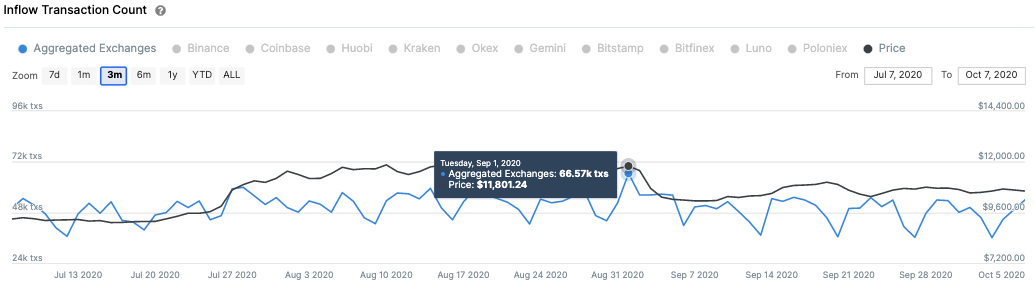

As the name suggests, the Inflow Transaction Count indicator provides the number of incoming crypto transactions entering exchanges. While the Inflow Volume measures the aggregate dollar amount, which is influenced by whales’ transactions, the Inflow Transaction Count is a better approximation of the number of users sending funds into exchanges.

This indicator has also shown to rise along and anticipate periods of high volatility. For example, on September 1st, inflow transactions for Bitcoin hit a 3-month high preceding a decrease in price of 14% over the following 48 hours. While this pattern does tend to emerge, natural fluctuations in inflow transactions can also increase at times.

In [186]:
# Create directory of datasets for total flows
dir_btc_inflow_trainsaction_count = "/kaggle/input/intotheblock-bitcoin-onchain-data/ITB_btc_inflow_transaction_count_undefined_2023-06-19T16_46_11.596Z.csv"
dir_eth_inflow_trainsaction_count = "/kaggle/input/intotheblock-ethereum-onchain-data/ITB_eth_inflow_transaction_count_undefined_2023-06-19T17_34_27.114Z.csv"

In [187]:
# Create dataframws with using directories
df_btc_inflow_trainsaction_count = pd.read_csv(dir_btc_inflow_trainsaction_count)
df_eth_inflow_trainsaction_count = pd.read_csv(dir_eth_inflow_trainsaction_count)

In [188]:
df_btc_inflow_trainsaction_count.head()

DateTime  Aggregated Exchanges   Price
0  2011-07-15 00:00:00                     2  13.795
1  2011-07-16 00:00:00                     2  13.655
2  2011-07-17 00:00:00                     2  13.385
3  2011-07-18 00:00:00                     3  13.215
4  2011-07-19 00:00:00                     1  14.070

In [189]:
df_eth_inflow_trainsaction_count.head()

DateTime  Aggregated Exchanges  Price
0  2015-07-30 00:00:00                     9    NaN
1  2015-07-31 00:00:00                    24    NaN
2  2015-08-01 00:00:00                    24    NaN
3  2015-08-02 00:00:00                    29    NaN
4  2015-08-03 00:00:00                    26    NaN

In [190]:
df_btc_inflow_trainsaction_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              4357 non-null   object 
 1   Aggregated Exchanges  4357 non-null   int64  
 2   Price                 4357 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.2+ KB


In [191]:
df_eth_inflow_trainsaction_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              2881 non-null   object 
 1   Aggregated Exchanges  2881 non-null   int64  
 2   Price                 2873 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 67.6+ KB


In [192]:
# Change datetime features data type
df_btc_inflow_trainsaction_count["DateTime"] = pd.to_datetime(df_btc_inflow_trainsaction_count["DateTime"])
df_eth_inflow_trainsaction_count["DateTime"] = pd.to_datetime(df_eth_inflow_trainsaction_count["DateTime"])

# Merge dataset by dates
df_btc_daily = pd.merge(df_btc_daily.reset_index(), df_btc_inflow_trainsaction_count, left_on = "index", right_on= "DateTime")
df_eth_daily = pd.merge_asof(df_eth_daily.reset_index(), df_eth_inflow_trainsaction_count, left_on = "index", right_on= "DateTime")

In [193]:
#Set date as a index
df_btc_daily = df_btc_daily.set_index("index")
df_eth_daily = df_eth_daily.set_index("index")

In [194]:
# Change feature names
df_btc_daily = df_btc_daily.rename(columns = {"Aggregated Exchanges": "inflow_transaction_count"})
df_eth_daily = df_eth_daily.rename(columns = {"Aggregated Exchanges": "inflow_transaction_count"})

In [195]:
# Find local maxima indices
maxima_indices_inflow_transaction_count_btc = argrelextrema(data = df_btc_daily["inflow_transaction_count"].values, comparator = np.greater, order = 45)[0]
maxima_indices_inflow_transaction_count_eth = argrelextrema(data = df_eth_daily["inflow_transaction_count"].values, comparator = np.greater, order = 45)[0]

# Find local maxima points
df_btc_daily["local_maxima_inflow_transaction_count"] = df_btc_daily.iloc[maxima_indices_inflow_transaction_count_btc]["inflow_transaction_count"]
df_eth_daily["local_maxima_inflow_transaction_count"] = df_eth_daily.iloc[maxima_indices_inflow_transaction_count_eth]["inflow_transaction_count"]

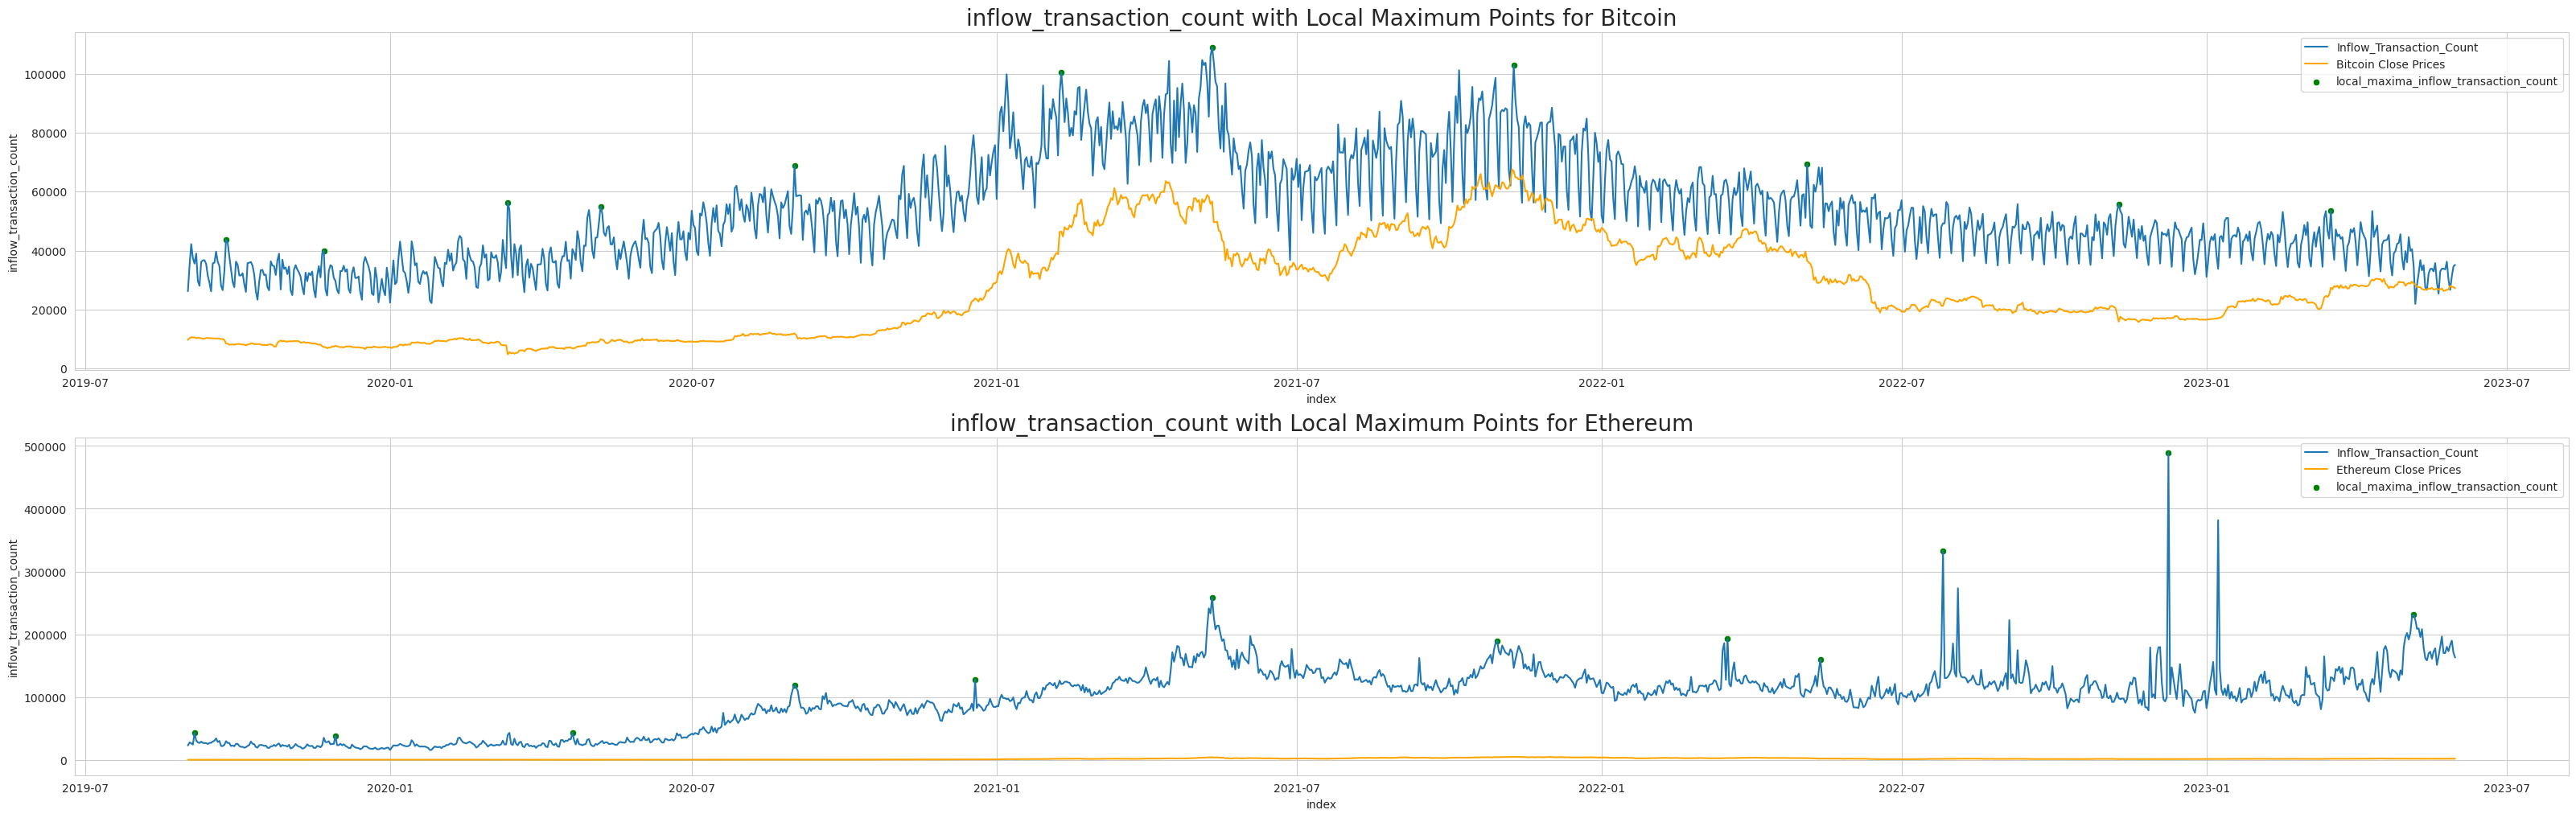

In [196]:
draw_scatterplot_and_lineplot(df_btc_daily, df_eth_daily, feature = "inflow_transaction_count", is_minima=False)

In [197]:
# Change local maxima points to binary variables
df_btc_daily["local_maxima_inflow_transaction_count"] = df_btc_daily["local_maxima_inflow_transaction_count"].notnull().astype(int)
df_eth_daily["local_maxima_inflow_transaction_count"] = df_eth_daily["local_maxima_inflow_transaction_count"].notnull().astype(int)

In [198]:
# Change features name as a logically
df_btc_daily = df_btc_daily.rename(columns = {"local_maxima_inflow_transaction_count": "is_local_maxima_inflow_transaction_count"})
df_eth_daily = df_eth_daily.rename(columns = {"local_maxima_inflow_transaction_count": "is_local_maxima_inflow_transaction_count"})

In [199]:
# Drop features which not important
drop_features = ["DateTime", "Price"]
df_btc_daily = df_btc_daily.drop(drop_features, axis = 1)
df_eth_daily = df_eth_daily.drop(drop_features, axis = 1)

### Net Flows

[Link](https://resources.intotheblock.com/indicators/order-books/on-chain-flows/net-flows)

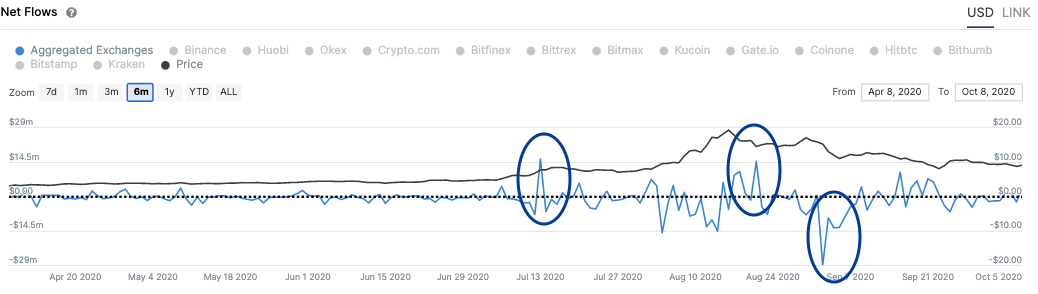

Net Flows = Inflow Volume - Outflow Volume

The Net Flows indicator highlights trends of traders sending money in and out of exchanges. Recall that Net Flows are positive when more funds are entering than leaving exchanges. Therefore, we observe that positive Net Flows tend to coincide with periods following large increases in price (like LINK when it tripled between April and July) or confirmation of down-trends (as seen with LINK in late August).

Conversely, Net Flows are negative when a greater volume is being withdrawn from exchanges. This could be seen as a sign of accumulation (LINK in early August) or addresses buying back following large declines (LINK in early September).

While Net Flows also affect large cap crypto-assets, smaller cap tokens are more susceptible to large changes in prices deriving from exchange flows. This is simply a result of smaller caps requiring less capital in order to make market-moving trades. This is worth considering when using the Net Flows indicator to trade.

In [200]:
# Create directory of datasets for net flows
dir_btc_netflow = "/kaggle/input/intotheblock-bitcoin-onchain-data/ITB_btc_netflows_undefined_2023-06-19T16_46_26.728Z.csv"
dir_eth_netflow = "/kaggle/input/intotheblock-ethereum-onchain-data/ITB_eth_netflows_undefined_2023-06-19T17_34_40.860Z.csv"

In [201]:
# Create dataframws with using directories
df_btc_netflow = pd.read_csv(dir_btc_netflow)
df_eth_netflow = pd.read_csv(dir_eth_netflow)

In [202]:
df_btc_netflow.head()

DateTime  Aggregated Exchanges   Price
0  2011-07-15 00:00:00              0.541331  13.795
1  2011-07-16 00:00:00              0.345183  13.655
2  2011-07-17 00:00:00              0.120000  13.385
3  2011-07-18 00:00:00              0.300956  13.215
4  2011-07-19 00:00:00             -1.216511  14.070

In [203]:
df_eth_netflow.head()

DateTime  Aggregated Exchanges  Price
0  2015-07-30 00:00:00             666.87500    NaN
1  2015-07-31 00:00:00            1265.31250    NaN
2  2015-08-01 00:00:00             759.68750    NaN
3  2015-08-02 00:00:00            1002.18750    NaN
4  2015-08-03 00:00:00             851.40625    NaN

In [204]:
df_btc_netflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              4357 non-null   object 
 1   Aggregated Exchanges  4357 non-null   float64
 2   Price                 4357 non-null   float64
dtypes: float64(2), object(1)
memory usage: 102.2+ KB


In [205]:
df_eth_netflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              2881 non-null   object 
 1   Aggregated Exchanges  2881 non-null   float64
 2   Price                 2873 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.6+ KB


In [206]:
# Change datetime features data type
df_btc_netflow["DateTime"] = pd.to_datetime(df_btc_netflow["DateTime"])
df_eth_netflow["DateTime"] = pd.to_datetime(df_eth_netflow["DateTime"])

# Merge dataset by dates
df_btc_daily = pd.merge(df_btc_daily.reset_index(), df_btc_netflow, left_on = "index", right_on= "DateTime")
df_eth_daily = pd.merge_asof(df_eth_daily.reset_index(), df_eth_netflow, left_on = "index", right_on= "DateTime")

In [207]:
#Set date as a index
df_btc_daily = df_btc_daily.set_index("index")
df_eth_daily = df_eth_daily.set_index("index")

In [208]:
# Change feature names
df_btc_daily = df_btc_daily.rename(columns = {"Aggregated Exchanges": "netflow"})
df_eth_daily = df_eth_daily.rename(columns = {"Aggregated Exchanges": "netflow"})

In [209]:
# Find local minima indices
minima_indices_netflow_btc = argrelextrema(data = df_btc_daily["netflow"].values, comparator = np.less, order = 45)[0]
minima_indices_netflow_eth = argrelextrema(data = df_eth_daily["netflow"].values, comparator = np.less, order = 45)[0]

# Find local maxima indices
maxima_indices_netflow_btc = argrelextrema(data = df_btc_daily["netflow"].values, comparator = np.greater, order = 45)[0]
maxima_indices_netflow_eth = argrelextrema(data = df_eth_daily["netflow"].values, comparator = np.greater, order = 45)[0]


# Find local minima points
df_btc_daily["local_minima_netflow"] = df_btc_daily.iloc[minima_indices_netflow_btc]["netflow"]
df_eth_daily["local_minima_netflow"] = df_eth_daily.iloc[minima_indices_netflow_eth]["netflow"]

# Find local maxima points
df_btc_daily["local_maxima_netflow"] = df_btc_daily.iloc[maxima_indices_netflow_btc]["netflow"]
df_eth_daily["local_maxima_netflow"] = df_eth_daily.iloc[maxima_indices_netflow_eth]["netflow"]

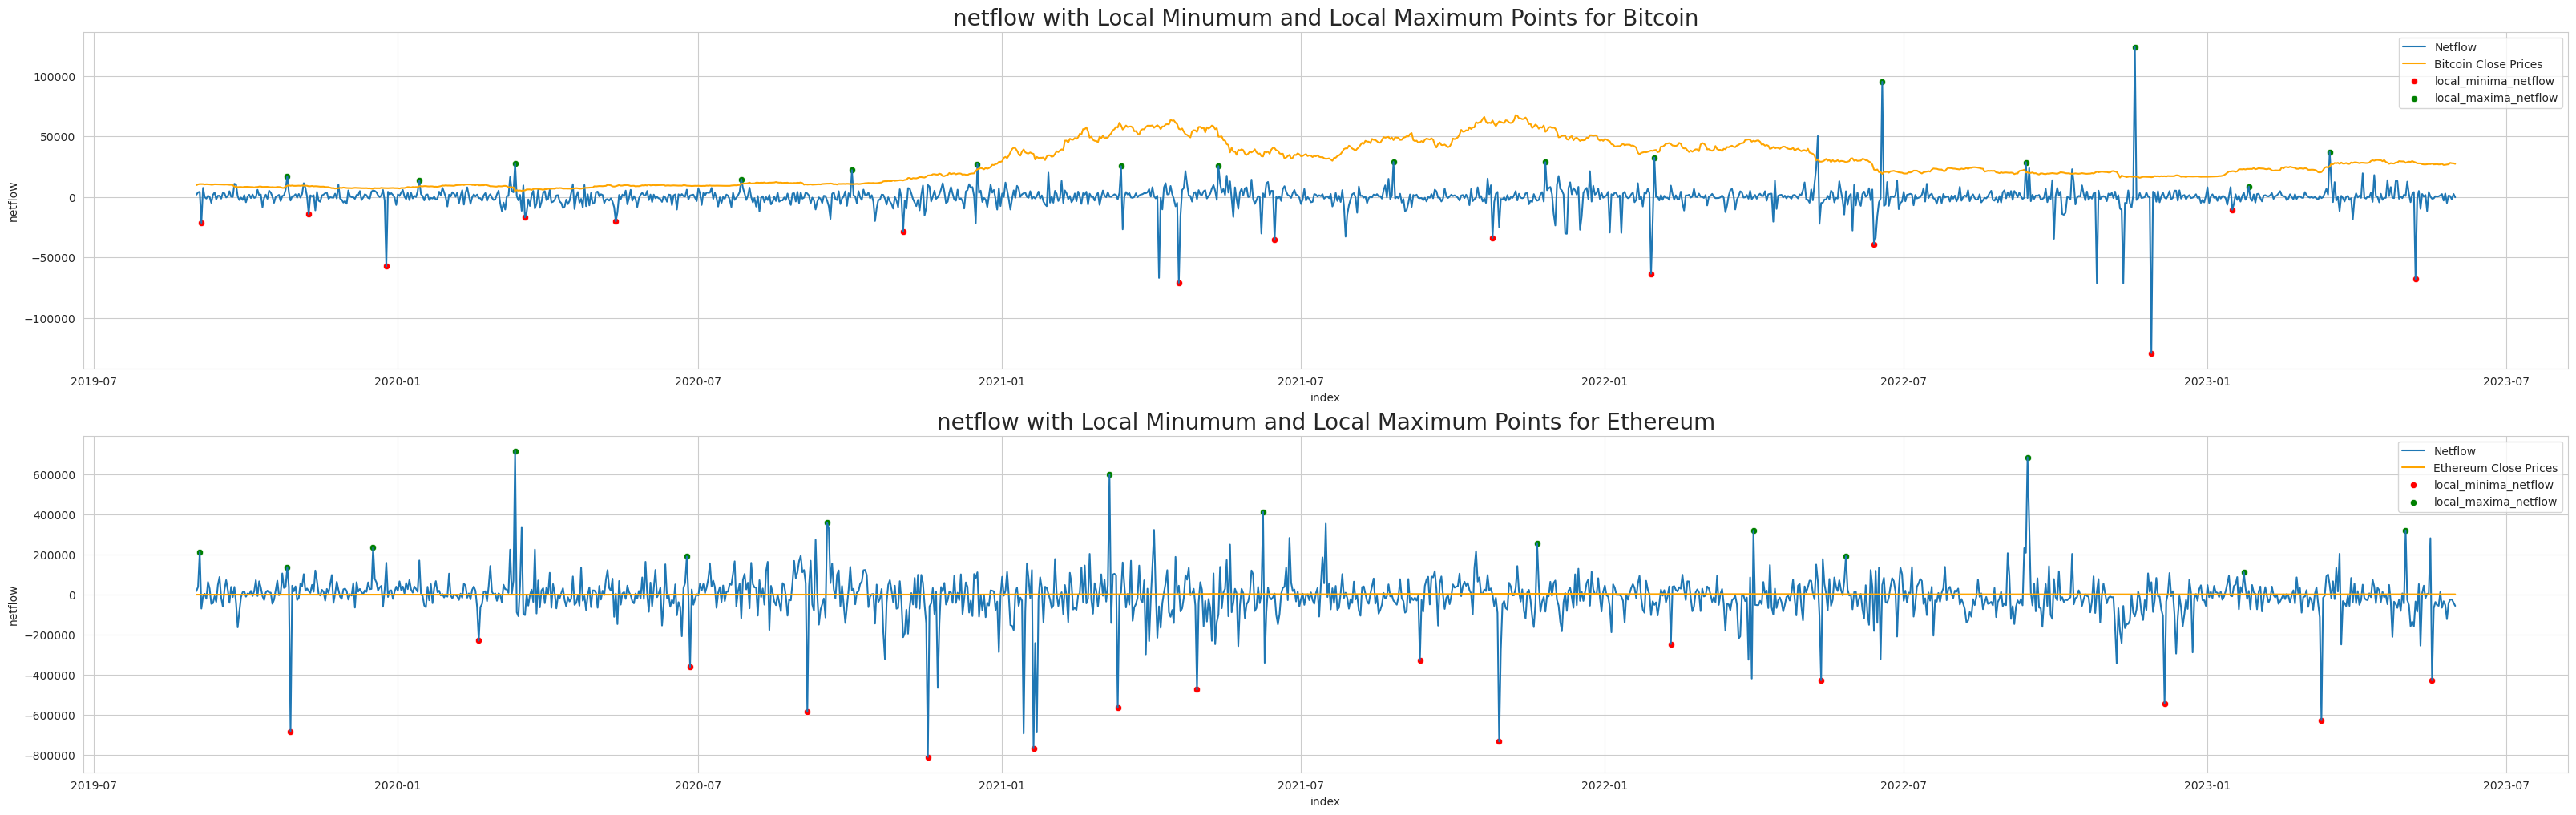

In [210]:
draw_scatterplot_and_lineplot(df_btc_daily, df_eth_daily, feature = "netflow", is_minima=True)

In [211]:
# Change local minima points to binary variables
df_btc_daily["local_minima_netflow"] = df_btc_daily["local_minima_netflow"].notnull().astype(int)
df_eth_daily["local_minima_netflow"] = df_eth_daily["local_minima_netflow"].notnull().astype(int)

# Change local maxima points to binary variables
df_btc_daily["local_maxima_netflow"] = df_btc_daily["local_maxima_netflow"].notnull().astype(int)
df_eth_daily["local_maxima_netflow"] = df_eth_daily["local_maxima_netflow"].notnull().astype(int)

In [212]:
# Change features name as a logically
df_btc_daily = df_btc_daily.rename(columns = {"local_minima_netflow": "is_local_minima_netflow", "local_maxima_netflow": "is_local_maxima_netflow"})
df_eth_daily = df_eth_daily.rename(columns = {"local_minima_netflow": "is_local_minima_netflow", "local_maxima_netflow": "is_local_maxima_netflow"})

In [213]:
# Drop features which not important
drop_features = ["DateTime", "Price"]
df_btc_daily = df_btc_daily.drop(drop_features, axis = 1)
df_eth_daily = df_eth_daily.drop(drop_features, axis = 1)

# Modeling

I want to try random forest, xgbbost and LSTM model to predict bitcoin prices. We have two datasets which one of them is hourly basis, other one is daily basis. Dataset which daily basis have a OnChain indicators. We area gonna use all of models to two dataset and compare result.

Target values is next 3 hours for hourly basis datasets and next 1 day for daily basis. Because in real life, we can get data befor etwo hours at best posibility.

Test set is last 4380 hours(aproximately 6 month) for hourly basis and 180 day for daily basis datasets

## Train and Test Set

In [214]:
# Change price_above_upper_band, price_below_lower_band and weekofyear features as integer
df_btc["is_price_above_upper_band"] = df_btc["is_price_above_upper_band"].astype(int)
df_btc["is_price_below_lower_band"] = df_btc["is_price_below_lower_band"].astype(int)

df_eth["is_price_above_upper_band"] = df_eth["is_price_above_upper_band"].astype(int)
df_eth["is_price_below_lower_band"] = df_eth["is_price_below_lower_band"].astype(int)

df_btc_daily["is_price_above_upper_band"] = df_btc_daily["is_price_above_upper_band"].astype(int)
df_btc_daily["is_price_below_lower_band"] = df_btc_daily["is_price_below_lower_band"].astype(int)

df_eth_daily["is_price_above_upper_band"] = df_eth_daily["is_price_above_upper_band"].astype(int)
df_eth_daily["is_price_below_lower_band"] = df_eth_daily["is_price_below_lower_band"].astype(int)

df_btc["weekofyear"] = df_btc["weekofyear"].astype(int)
df_eth["weekofyear"] = df_eth["weekofyear"].astype(int)
df_btc_daily["weekofyear"] = df_btc_daily["weekofyear"].astype(int)
df_eth_daily["weekofyear"] = df_eth_daily["weekofyear"].astype(int)

In [215]:
# Drop rows which has NaN values from satasets
df_btc = df_btc.dropna()
df_eth = df_eth.dropna()
df_btc_daily = df_btc_daily.dropna()
df_eth_daily = df_eth_daily.dropna()

In [216]:
scaled_features = ["open", "high", "low", "volume", "quote_volume", "taker_buy_volume", "taher_buy_quote_volume", 
                   "rsi_7_days", "rsi_14_days", "rsi_30_days", "ema_12_days", "ema_26_days", "middle_band", "std_dev", "upper_band", "lower_band", "bandwidth"]
scaler_standard = StandardScaler()
df_btc[scaled_features] = scaler_standard.fit_transform(df_btc[scaled_features])
df_eth[scaled_features] = scaler_standard.fit_transform(df_eth[scaled_features])

In [217]:
# Define train sets
X_train_btc_hourly = df_btc.drop(["quantile_transform_close_price", "close"], axis = 1)[:-4380]
X_train_eth_hourly = df_eth.drop(["quantile_transform_close_price", "close"], axis = 1)[:-4380]
X_train_btc_daily = df_btc_daily.drop(["quantile_transform_close_price", "close"], axis = 1)[:-180]
X_train_eth_daily = df_eth_daily.drop(["quantile_transform_close_price", "close"], axis = 1)[:-180]

y_train_btc_hourly = df_btc.quantile_transform_close_price[:-4380]
y_train_eth_hourly = df_eth.quantile_transform_close_price[:-4380]
y_train_btc_daily = df_btc_daily.quantile_transform_close_price[:-180]
y_train_eth_daily = df_eth_daily.quantile_transform_close_price[:-180]

# Define test sets
X_test_btc_hourly = df_btc.drop(["quantile_transform_close_price", "close"], axis = 1)[-4380:]
X_test_eth_hourly = df_eth.drop(["quantile_transform_close_price", "close"], axis = 1)[-4380:]
X_test_btc_daily = df_btc_daily.drop(["quantile_transform_close_price", "close"], axis = 1)[-180:]
X_test_eth_daily = df_eth_daily.drop(["quantile_transform_close_price", "close"], axis = 1)[-180:]

y_test_btc_hourly = df_btc.quantile_transform_close_price[-4380:]
y_test_eth_hourly = df_eth.quantile_transform_close_price[-4380:]
y_test_btc_daily = df_btc_daily.quantile_transform_close_price[-180:]
y_test_eth_daily = df_eth_daily.quantile_transform_close_price[-180:]

## RandomForestRegressor

In [218]:
params_rr = {
    "n_estimators" : 100,
    "min_samples_split" : 5,
    "random_state" : 42
}

In [219]:
rr_model = RandomForestRegressor(**params_rr)

### df_btc dataset

In [220]:
preds_rr_df_btc, rmse_rr_df_btc, mape_rr_df_btc, mae_rr_df_btc, r2_rr_df_btc = apply_model(model = rr_model, 
                                                                                           X_train = X_train_btc_hourly, 
                                                                                           y_train = y_train_btc_hourly, 
                                                                                           X_test = X_test_btc_hourly, 
                                                                                           y_test = y_test_btc_hourly)

Mean Absolute Percentage Error : 0.20127244866501923 
 Root Mean Squared Error : 78.35759822386984 
           Mean Absolute Error : 48.87240249738944 
 R2_Score : 0.9996939268644726


In [221]:
reshaped_y_test = y_test_btc_hourly.to_numpy().reshape(-1, 1)
reshaped_preds = preds_rr_df_btc.reshape(-1, 1)

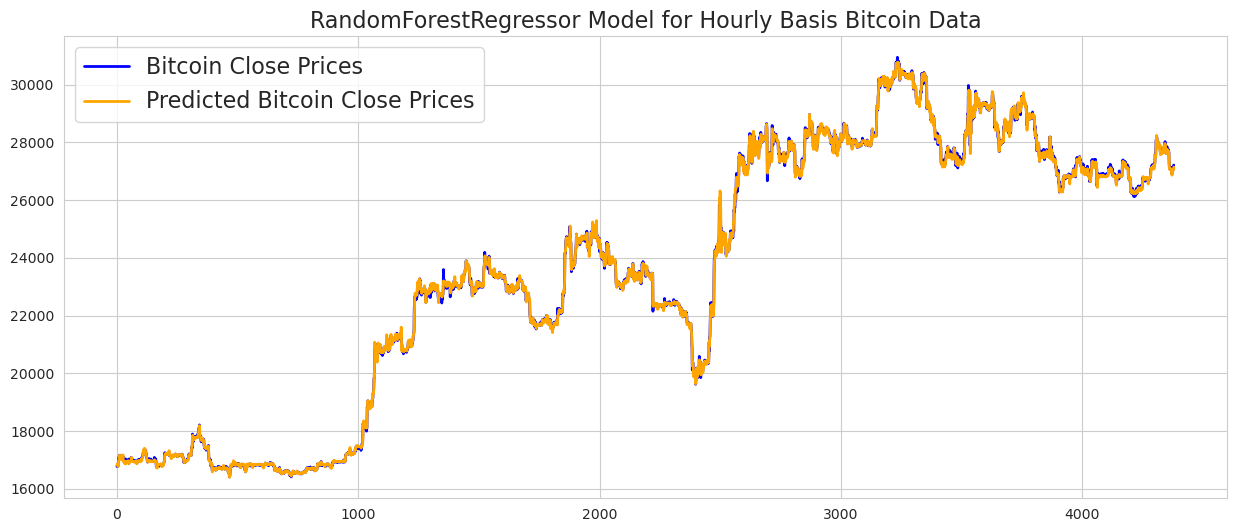

In [222]:
line_plot(transformer_quantile_df_btc.inverse_transform(reshaped_y_test).flatten(), 
          transformer_quantile_df_btc.inverse_transform(reshaped_preds).flatten(),
          label1 = "Bitcoin Close Prices", 
          label2 = "Predicted Bitcoin Close Prices", 
          title = "RandomForestRegressor Model for Hourly Basis Bitcoin Data")

### df_eth dataset

In [223]:
preds_rr_df_eth, rmse_rr_df_eth, mape_rr_df_eth, mae_rr_df_eth, r2_rr_df_eth = apply_model(model = rr_model, 
                                                                                           X_train = X_train_eth_hourly, 
                                                                                           y_train = y_train_eth_hourly, 
                                                                                           X_test = X_test_eth_hourly, 
                                                                                           y_test = y_test_eth_hourly, 
                                                                                           is_btc = False)

Mean Absolute Percentage Error : 0.181773863144716 
 Root Mean Squared Error : 4.3517837746540655 
           Mean Absolute Error : 2.954519031014623 
 R2_Score : 0.9996938793659622


In [224]:
reshaped_y_test = y_test_eth_hourly.to_numpy().reshape(-1, 1)
reshaped_preds = preds_rr_df_eth.reshape(-1, 1)

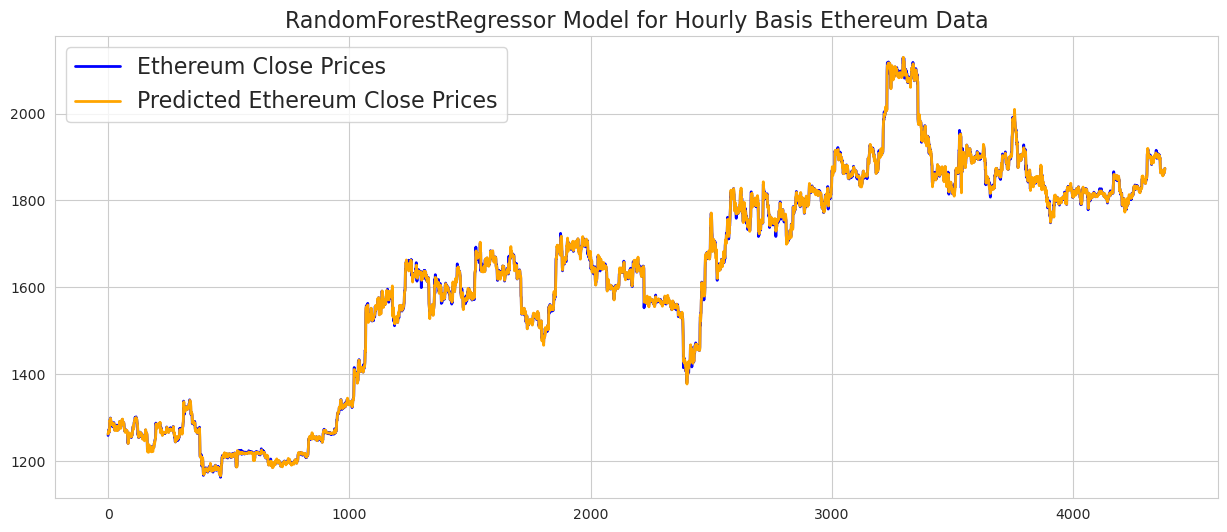

In [225]:
line_plot(transformer_quantile_df_eth.inverse_transform(reshaped_y_test).flatten(), 
         transformer_quantile_df_eth.inverse_transform(reshaped_preds).flatten(), 
          label1 = "Ethereum Close Prices", 
          label2 = "Predicted Ethereum Close Prices", 
          title = "RandomForestRegressor Model for Hourly Basis Ethereum Data")

### df_btc_daily dataset

In [226]:
preds_rr_df_btc_daily, rmse_rr_df_btc_daily, mape_rr_df_btc_daily, mae_rr_df_btc_daily, r2_rr_df_btc_daily = apply_model(
                                                                                           model = rr_model, 
                                                                                           X_train = X_train_btc_daily, 
                                                                                           y_train = y_train_btc_daily, 
                                                                                           X_test = X_test_btc_daily, 
                                                                                           y_test = y_test_btc_daily)

Mean Absolute Percentage Error : 0.41807921201841697 
 Root Mean Squared Error : 144.461900913594 
           Mean Absolute Error : 103.42170493116747 
 R2_Score : 0.9989345496576021


In [227]:
reshaped_y_test = y_test_btc_daily.to_numpy().reshape(-1, 1)
reshaped_preds = preds_rr_df_btc_daily.reshape(-1, 1)

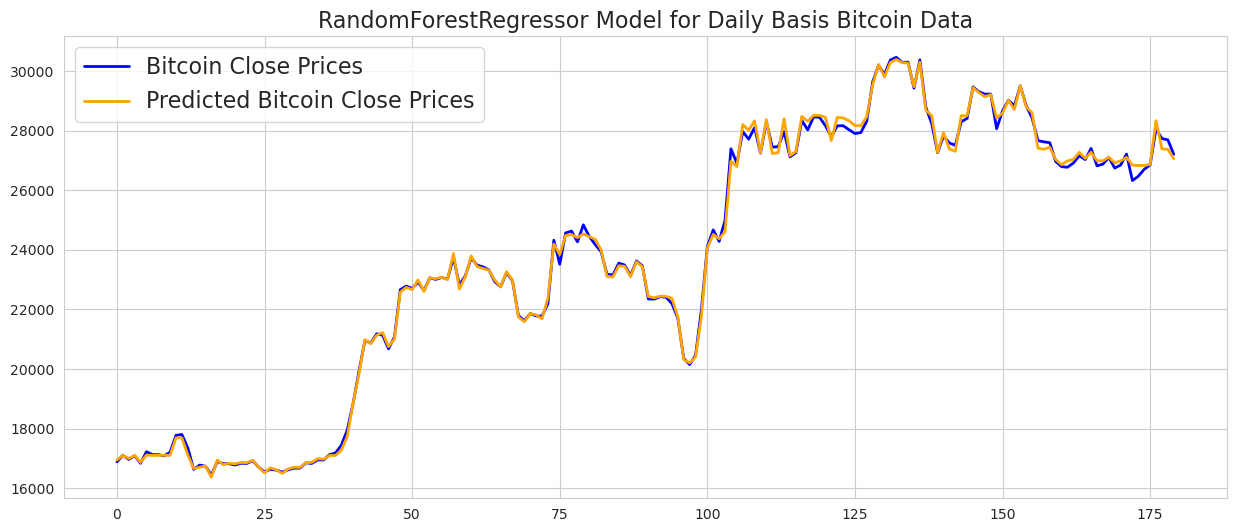

In [228]:
line_plot(transformer_quantile_df_btc.inverse_transform(reshaped_y_test).flatten(), 
          transformer_quantile_df_btc.inverse_transform(reshaped_preds).flatten(), 
          label1 = "Bitcoin Close Prices", 
          label2 = "Predicted Bitcoin Close Prices", 
          title = "RandomForestRegressor Model for Daily Basis Bitcoin Data")

### df_eth_daily dataset

In [229]:
preds_rr_df_eth_daily, rmse_rr_df_eth_daily, mape_rr_df_eth_daily, mae_rr_df_eth_daily, r2_rr_df_eth_daily = apply_model(
                                                                                           model = rr_model, 
                                                                                           X_train = X_train_eth_daily, 
                                                                                           y_train = y_train_eth_daily, 
                                                                                           X_test = X_test_eth_daily, 
                                                                                           y_test = y_test_eth_daily,
                                                                                           is_btc = False)

Mean Absolute Percentage Error : 0.3153524576342212 
 Root Mean Squared Error : 6.817875056342643 
           Mean Absolute Error : 5.042561953482049 
 R2_Score : 0.9992340061629191


In [230]:
reshaped_y_test = y_test_eth_daily.to_numpy().reshape(-1, 1)
reshaped_preds = preds_rr_df_eth_daily.reshape(-1, 1)

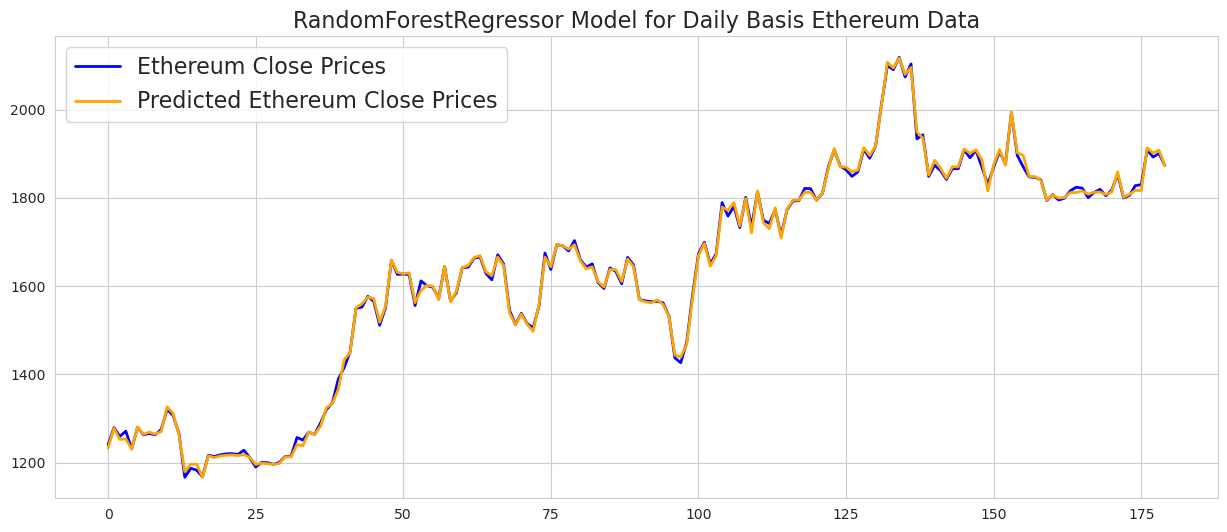

In [231]:
line_plot(transformer_quantile_df_eth.inverse_transform(reshaped_y_test).flatten(), 
          transformer_quantile_df_eth.inverse_transform(reshaped_preds).flatten(),
          label1 = "Ethereum Close Prices",
          label2 = "Predicted Ethereum Close Prices", 
          title = "RandomForestRegressor Model for Daily Basis Ethereum Data")

## Xgboost

In [232]:
params_xgb = {
    "max_depth": 3,
    "learning_rate": 0.1,
    "n_estimators": 100
}

In [233]:
xgb_model = xgb.XGBRegressor(objective ="reg:squarederror",
                             **params_xgb)

### df_btc dataset

In [234]:
preds_xgb_df_btc, rmse_xgb_df_btc, mape_xgb_df_btc, mae_xgb_df_btc, r2_xgb_df_btc = apply_model(
                                                                                           model = xgb_model, 
                                                                                           X_train = X_train_btc_hourly, 
                                                                                           y_train = y_train_btc_hourly, 
                                                                                           X_test = X_test_btc_hourly, 
                                                                                           y_test = y_test_btc_hourly)

Mean Absolute Percentage Error : 0.9005149509356389 
 Root Mean Squared Error : 391.4822723489944 
           Mean Absolute Error : 215.14901403538104 
 R2_Score : 0.9923601086538801


In [235]:
reshaped_y_test = y_test_btc_hourly.to_numpy().reshape(-1, 1)
reshaped_preds = preds_xgb_df_btc.reshape(-1, 1)

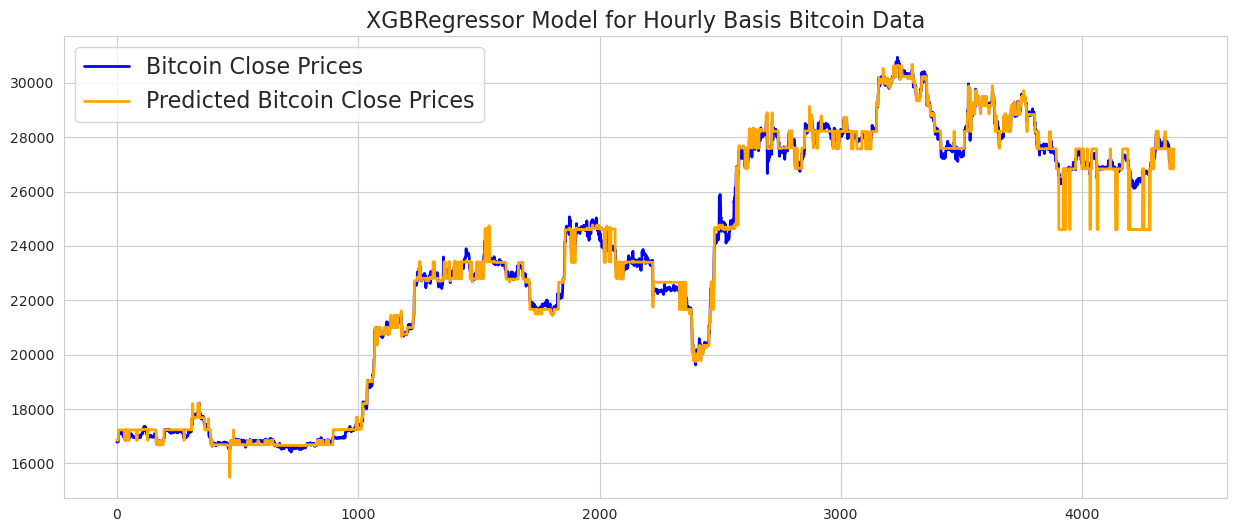

In [236]:
line_plot(transformer_quantile_df_btc.inverse_transform(reshaped_y_test).flatten(), 
          transformer_quantile_df_btc.inverse_transform(reshaped_preds).flatten(),
          label1 = "Bitcoin Close Prices", 
          label2 = "Predicted Bitcoin Close Prices", 
          title = "XGBRegressor Model for Hourly Basis Bitcoin Data")

### df_eth dataset

In [237]:
preds_xgb_df_eth, rmse_xgb_df_eth, mape_xgb_df_eth, mae_xgb_df_eth, r2_xgb_df_eth = apply_model(
                                                                                           model = xgb_model, 
                                                                                           X_train = X_train_eth_hourly, 
                                                                                           y_train = y_train_eth_hourly, 
                                                                                           X_test = X_test_eth_hourly, 
                                                                                           y_test = y_test_eth_hourly,
                                                                                           is_btc = False)

Mean Absolute Percentage Error : 0.6444233371793343 
 Root Mean Squared Error : 15.484881194887038 
           Mean Absolute Error : 10.448817821760104 
 R2_Score : 0.9961240894802548


In [238]:
reshaped_y_test = y_test_eth_hourly.to_numpy().reshape(-1, 1)
reshaped_preds = preds_xgb_df_eth.reshape(-1, 1)

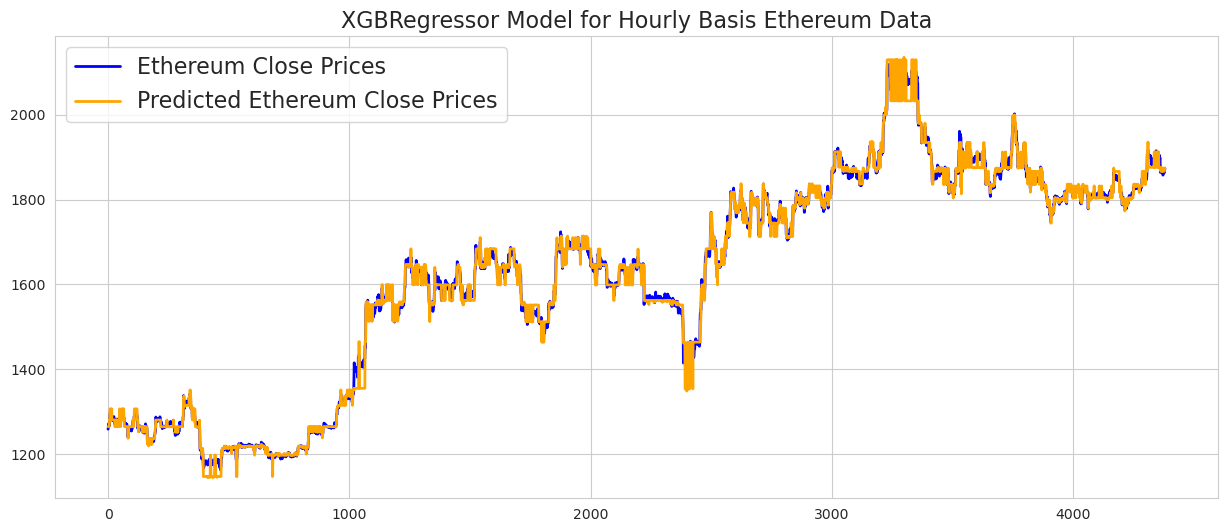

In [239]:
line_plot(transformer_quantile_df_eth.inverse_transform(reshaped_y_test).flatten(), 
          transformer_quantile_df_eth.inverse_transform(reshaped_preds).flatten(),
          label1 = "Ethereum Close Prices",
          label2 = "Predicted Ethereum Close Prices", 
          title = "XGBRegressor Model for Hourly Basis Ethereum Data")

### df_btc_daily dataset

In [240]:
preds_xgb_df_btc_daily, rmse_xgb_df_btc_daily, mape_xgb_df_btc_daily, mae_xgb_df_btc_daily, r2_xgb_df_btc_daily = apply_model(
                                                                                           model = xgb_model, 
                                                                                           X_train = X_train_btc_daily, 
                                                                                           y_train = y_train_btc_daily, 
                                                                                           X_test = X_test_btc_daily, 
                                                                                           y_test = y_test_btc_daily)

Mean Absolute Percentage Error : 0.9423512355094934 
 Root Mean Squared Error : 397.14209181592395 
           Mean Absolute Error : 228.28524652777762 
 R2_Score : 0.9919477286653547


In [241]:
reshaped_y_test = y_test_btc_daily.to_numpy().reshape(-1, 1)
reshaped_preds = preds_xgb_df_btc_daily.reshape(-1, 1)

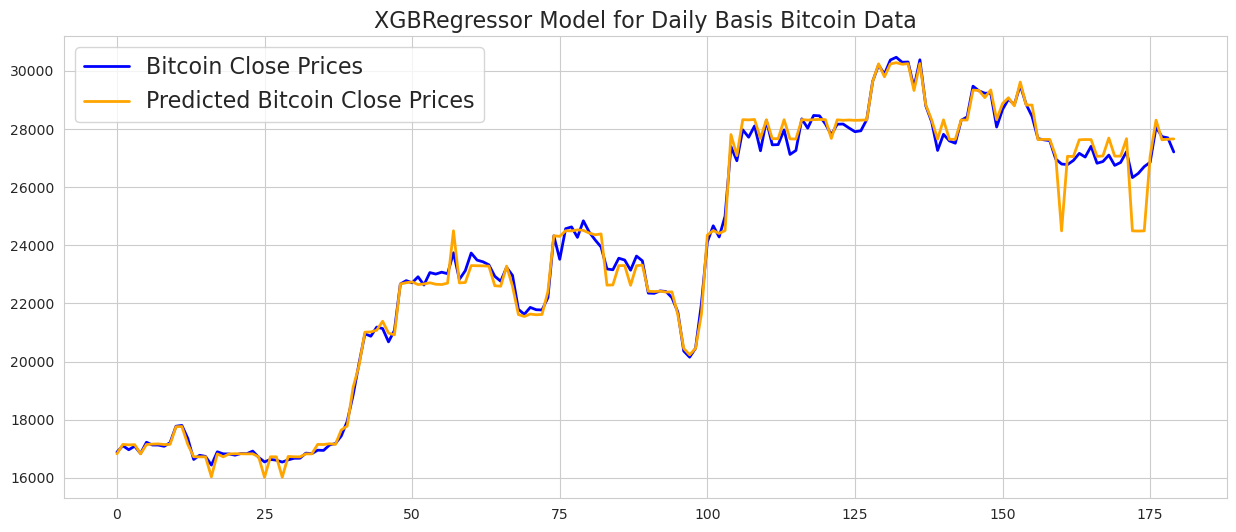

In [242]:
line_plot(transformer_quantile_df_btc.inverse_transform(reshaped_y_test).flatten(), 
          transformer_quantile_df_btc.inverse_transform(reshaped_preds).flatten(),
          label1 = "Bitcoin Close Prices",
          label2 = "Predicted Bitcoin Close Prices", 
          title = "XGBRegressor Model for Daily Basis Bitcoin Data")

### df_eth_daily dataset

In [243]:
preds_xgb_df_eth_daily, rmse_xgb_df_eth_daily, mape_xgb_df_eth_daily, mae_xgb_df_eth_daily, r2_xgb_df_eth_daily = apply_model(
                                                                                           model = xgb_model, 
                                                                                           X_train = X_train_eth_daily, 
                                                                                           y_train = y_train_eth_daily, 
                                                                                           X_test = X_test_eth_daily, 
                                                                                           y_test = y_test_eth_daily,
                                                                                           is_btc = False)

Mean Absolute Percentage Error : 0.6169503033392993 
 Root Mean Squared Error : 13.450205133091083 
           Mean Absolute Error : 10.052914876302092 
 R2_Score : 0.9970188418555735


In [244]:
reshaped_y_test = y_test_eth_daily.to_numpy().reshape(-1, 1)
reshaped_preds = preds_xgb_df_eth_daily.reshape(-1, 1)

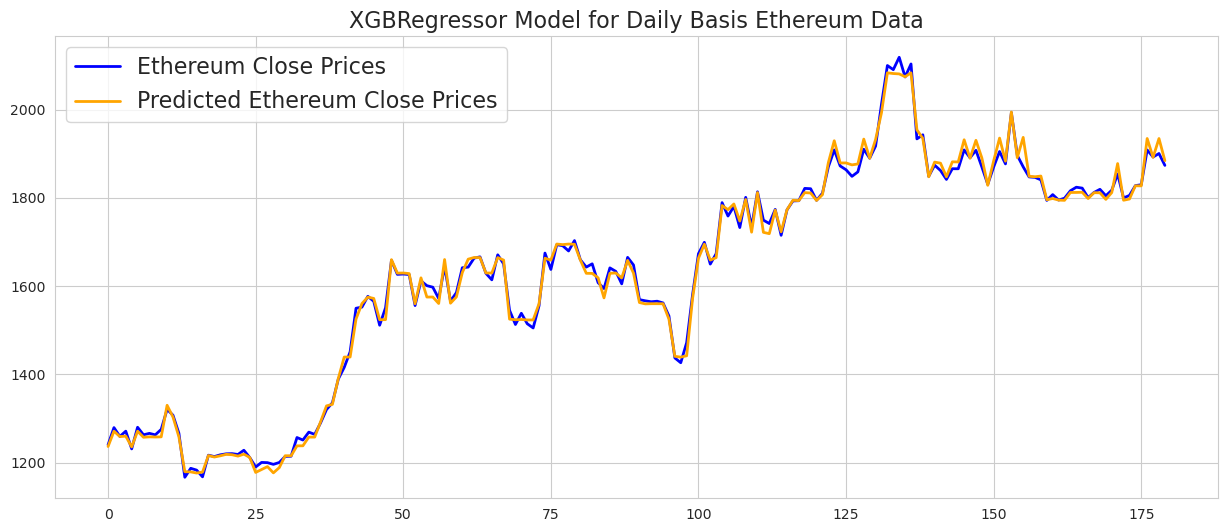

In [245]:
line_plot(transformer_quantile_df_eth.inverse_transform(reshaped_y_test).flatten(), 
          transformer_quantile_df_eth.inverse_transform(reshaped_preds).flatten(),
          label1 = "Ethereum Close Prices",
          label2 = "Predicted Ethereum Close Prices", 
          title = "XGBRegressor Model for Daily Basis Ethereum Data")

### LSTM Model

In [246]:
epochs = 50
batch_size = 32
window_len = 24 # equal to 1 day

### df_btc dataset

In [247]:
y_train_btc_deep_learning = df_btc.quantile_transform_close_price[:-4380].to_numpy()
y_test_btc_deep_learning = df_btc.quantile_transform_close_price[-4380:].to_numpy()

In [248]:
X_train, y_train, X_test, y_test = prepare_data_for_deep_learning(y_train_btc_deep_learning, y_train_btc_deep_learning, 
                                                                  y_test_btc_deep_learning, y_test_btc_deep_learning, window_len = window_len)

In [249]:
X_train.shape

(27733, 24, 1)

In [250]:
model = build_lstm_model(X_train, neurons = 64)

In [251]:
fit_model, preds_lstm_df_btc, rmse_lstm_df_btc, mape_lstm_df_btc, mae_lstm_df_btc, r2_lstm_df_btc = apply_lstm_model(
                                                                                        model, X_train, y_train, X_test, y_test, 
                                                                                        epochs = epochs, batch_size = batch_size)

Epoch 1/50
867/867 [==============================] - 53s 50ms/step - loss: 0.0358 - val_loss: 5.7694e-04
Epoch 2/50
867/867 [==============================] - 42s 48ms/step - loss: 0.0068 - val_loss: 4.5328e-04
Epoch 3/50
867/867 [==============================] - 42s 48ms/step - loss: 0.0055 - val_loss: 9.5957e-04
Epoch 4/50
867/867 [==============================] - 43s 49ms/step - loss: 0.0049 - val_loss: 4.6162e-04
Epoch 5/50
867/867 [==============================] - 42s 48ms/step - loss: 0.0043 - val_loss: 9.9113e-04
Epoch 6/50
867/867 [==============================] - 42s 49ms/step - loss: 0.0040 - val_loss: 3.4141e-04
Epoch 7/50
867/867 [==============================] - 42s 48ms/step - loss: 0.0036 - val_loss: 4.5283e-04
Epoch 8/50
867/867 [==============================] - 42s 48ms/step - loss: 0.0035 - val_loss: 7.5700e-04
Epoch 9/50
867/867 [==============================] - 42s 48ms/step - loss: 0.0032 - val_loss: 3.2546e-04
Epoch 10/50
867/867 [=========================

In [252]:
reshaped_y_test = y_test.reshape(-1, 1)
reshaped_preds = preds_lstm_df_btc.reshape(-1, 1)

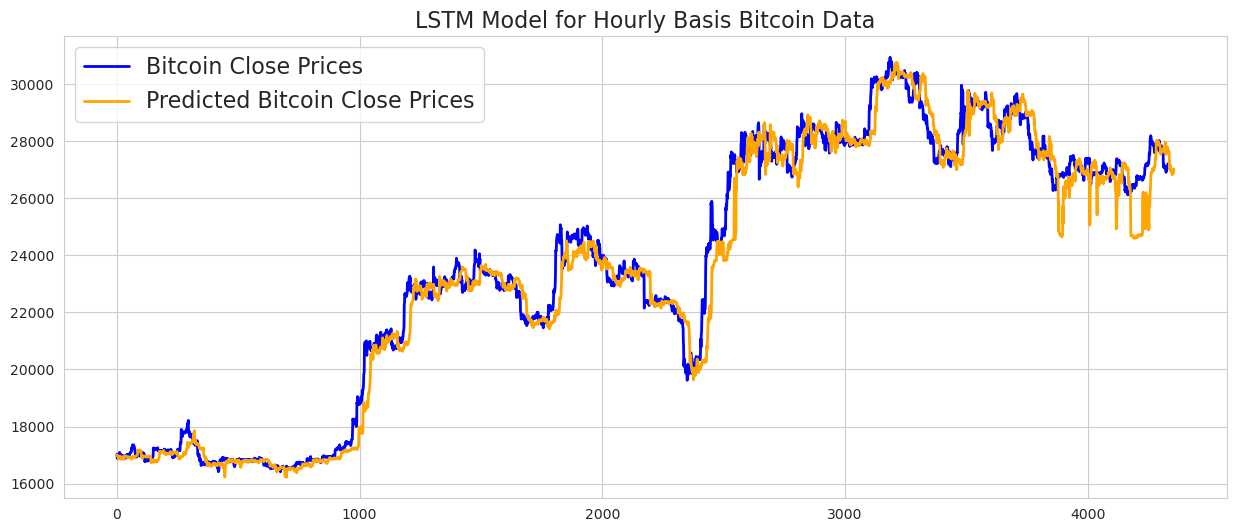

In [253]:
line_plot(transformer_quantile_df_btc.inverse_transform(reshaped_y_test).flatten()[window_len:], 
          transformer_quantile_df_btc.inverse_transform(reshaped_preds).flatten(),
          label1 = "Bitcoin Close Prices",
          label2 = "Predicted Bitcoin Close Prices", 
          title = "LSTM Model for Hourly Basis Bitcoin Data")

### df_eth dataset

In [254]:
y_train_eth_deep_learning = df_eth.quantile_transform_close_price[:-4380].to_numpy()
y_test_eth_deep_learning = df_eth.quantile_transform_close_price[-4380:].to_numpy()

In [255]:
X_train, y_train, X_test, y_test = prepare_data_for_deep_learning(y_train_eth_deep_learning, y_train_eth_deep_learning, 
                                                                  y_test_eth_deep_learning, y_test_eth_deep_learning, window_len = window_len)

In [256]:
X_train.shape

(27733, 24, 1)

In [257]:
model = build_lstm_model(X_train, neurons = 32)

In [258]:
fit_model, preds_lstm_df_eth, rmse_lstm_df_eth, mape_lstm_df_eth, mae_lstm_df_eth, r2_lstm_df_eth = apply_lstm_model(
                                                                                        model, X_train, y_train, X_test, y_test, 
                                                                                        epochs = epochs, batch_size = batch_size, 
                                                                                        is_btc = False)

Epoch 1/50
867/867 [==============================] - 48s 46ms/step - loss: 0.0607 - val_loss: 0.0015
Epoch 2/50
867/867 [==============================] - 39s 45ms/step - loss: 0.0077 - val_loss: 0.0011
Epoch 3/50
867/867 [==============================] - 38s 44ms/step - loss: 0.0063 - val_loss: 0.0016
Epoch 4/50
867/867 [==============================] - 38s 44ms/step - loss: 0.0057 - val_loss: 9.5463e-04
Epoch 5/50
867/867 [==============================] - 38s 44ms/step - loss: 0.0052 - val_loss: 5.9535e-04
Epoch 6/50
867/867 [==============================] - 38s 44ms/step - loss: 0.0048 - val_loss: 9.1113e-04
Epoch 7/50
867/867 [==============================] - 38s 44ms/step - loss: 0.0043 - val_loss: 5.4081e-04
Epoch 8/50
867/867 [==============================] - 38s 44ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 9/50
867/867 [==============================] - 38s 44ms/step - loss: 0.0038 - val_loss: 5.1204e-04
Epoch 10/50
867/867 [==============================] - 38s 44m

In [259]:
reshaped_y_test = y_test.reshape(-1, 1)
reshaped_preds = preds_lstm_df_eth.reshape(-1, 1)

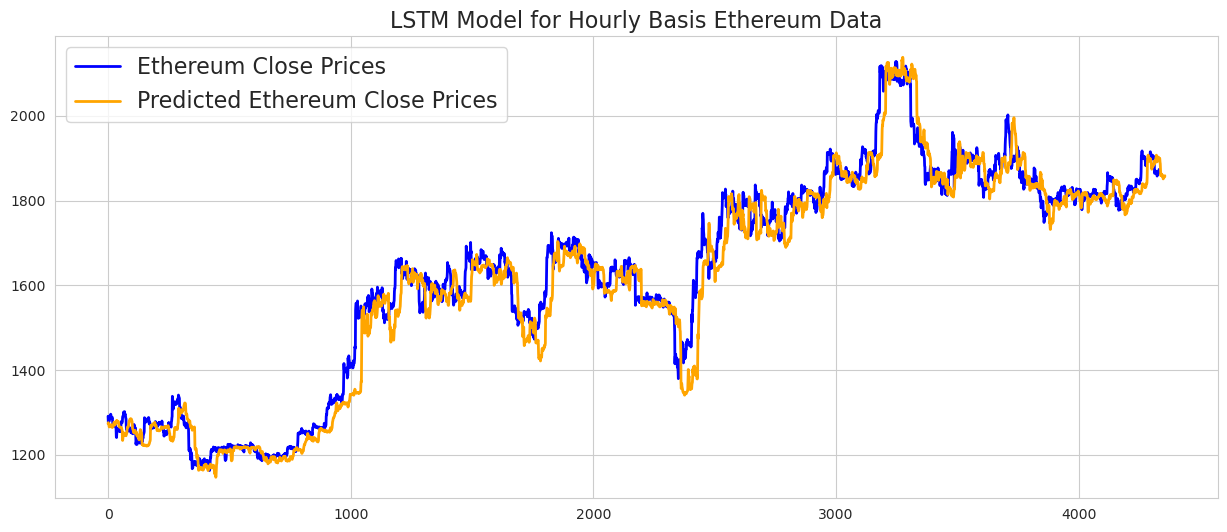

In [260]:
line_plot(transformer_quantile_df_eth.inverse_transform(reshaped_y_test).flatten()[window_len:], 
          transformer_quantile_df_eth.inverse_transform(reshaped_preds).flatten(),
          label1 = "Ethereum Close Prices",
          label2 = "Predicted Ethereum Close Prices", 
          title = "LSTM Model for Hourly Basis Ethereum Data")

### df_btc_daily dataset

In [261]:
epochs = 30
window_len = 60 #equal to 60 days

In [262]:
y_train_btc_daily_deep_learning = df_btc_daily.quantile_transform_close_price[:-180].to_numpy()
y_test_btc_daily_deep_learning = df_btc_daily.quantile_transform_close_price[-180:].to_numpy()

In [263]:
X_train, y_train, X_test, y_test = prepare_data_for_deep_learning(y_train_btc_daily_deep_learning, y_train_btc_daily_deep_learning, 
                                                                  y_test_btc_daily_deep_learning, y_test_btc_daily_deep_learning, window_len = window_len)

In [264]:
X_train.shape

(1089, 60, 1)

In [265]:
model = build_lstm_model(X_train, neurons = 32)

In [266]:
fit_model, preds_lstm_df_btc_daily, rmse_lstm_df_btc_daily, mape_lstm_df_btc_daily, mae_lstm_df_btc_daily, r2_lstm_df_btc_daily = apply_lstm_model(
                                                                                        model, X_train, y_train, X_test, y_test, 
                                                                                        epochs = epochs, batch_size = batch_size)

Epoch 1/30
35/35 [==============================] - 14s 150ms/step - loss: 1.0486 - val_loss: 0.0486
Epoch 2/30
35/35 [==============================] - 3s 98ms/step - loss: 0.8194 - val_loss: 0.0320
Epoch 3/30
35/35 [==============================] - 4s 101ms/step - loss: 0.4134 - val_loss: 0.1519
Epoch 4/30
35/35 [==============================] - 3s 99ms/step - loss: 0.1549 - val_loss: 0.0193
Epoch 5/30
35/35 [==============================] - 3s 98ms/step - loss: 0.1078 - val_loss: 0.0165
Epoch 6/30
35/35 [==============================] - 4s 103ms/step - loss: 0.0908 - val_loss: 0.0133
Epoch 7/30
35/35 [==============================] - 4s 122ms/step - loss: 0.0790 - val_loss: 0.0137
Epoch 8/30
35/35 [==============================] - 4s 108ms/step - loss: 0.0882 - val_loss: 0.0124
Epoch 9/30
35/35 [==============================] - 3s 99ms/step - loss: 0.0673 - val_loss: 0.0232
Epoch 10/30
35/35 [==============================] - 3s 99ms/step - loss: 0.0686 - val_loss: 0.0121
Epo

In [267]:
reshaped_y_test = y_test.reshape(-1, 1)
reshaped_preds = preds_lstm_df_btc_daily.reshape(-1, 1)

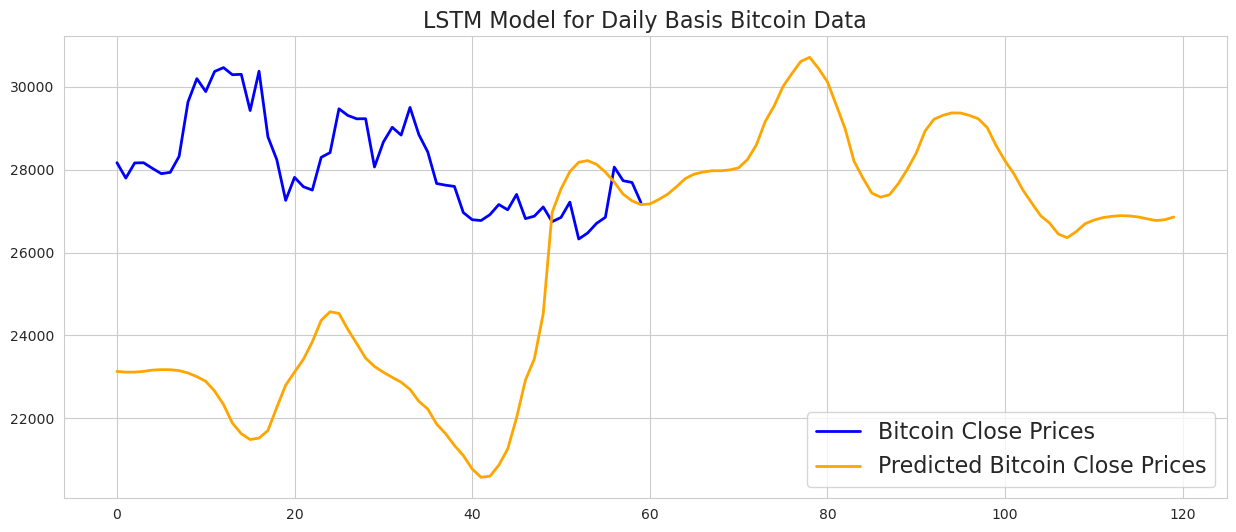

In [268]:
line_plot(transformer_quantile_df_btc.inverse_transform(reshaped_y_test).flatten()[window_len:], 
          transformer_quantile_df_btc.inverse_transform(reshaped_preds).flatten(),
          label1 = "Bitcoin Close Prices",
          label2 = "Predicted Bitcoin Close Prices", 
          title = "LSTM Model for Daily Basis Bitcoin Data")

### df_eth_daily_dataset

In [269]:
y_train_eth_daily_deep_learning = df_eth_daily.quantile_transform_close_price[:-180].to_numpy()
y_test_eth_daily_deep_learning = df_eth_daily.quantile_transform_close_price[-180:].to_numpy()

In [270]:
X_train, y_train, X_test, y_test = prepare_data_for_deep_learning(y_train_eth_daily_deep_learning, y_train_eth_daily_deep_learning, 
                                                                  y_test_eth_daily_deep_learning, y_test_eth_daily_deep_learning, window_len = window_len)

In [271]:
X_train.shape

(1095, 60, 1)

In [272]:
model = build_lstm_model(X_train, neurons = 32)

In [273]:
fit_model, preds_lstm_df_eth_daily, rmse_lstm_df_eth_daily, mape_lstm_df_eth_daily, mae_lstm_df_eth_daily, r2_lstm_df_eth_daily = apply_lstm_model(
                                                                                        model, X_train, y_train, X_test, y_test, 
                                                                                        epochs = epochs, batch_size = batch_size,
                                                                                        is_btc = False)

Epoch 1/30
35/35 [==============================] - 15s 191ms/step - loss: 0.9238 - val_loss: 0.1003
Epoch 2/30
35/35 [==============================] - 4s 103ms/step - loss: 0.7549 - val_loss: 0.0782
Epoch 3/30
35/35 [==============================] - 4s 102ms/step - loss: 0.5878 - val_loss: 0.0228
Epoch 4/30
35/35 [==============================] - 4s 110ms/step - loss: 0.3795 - val_loss: 0.0276
Epoch 5/30
35/35 [==============================] - 4s 101ms/step - loss: 0.2345 - val_loss: 0.0179
Epoch 6/30
35/35 [==============================] - 4s 120ms/step - loss: 0.1674 - val_loss: 0.0172
Epoch 7/30
35/35 [==============================] - 4s 117ms/step - loss: 0.1247 - val_loss: 0.0109
Epoch 8/30
35/35 [==============================] - 4s 101ms/step - loss: 0.0998 - val_loss: 0.0109
Epoch 9/30
35/35 [==============================] - 4s 103ms/step - loss: 0.0856 - val_loss: 0.0119
Epoch 10/30
35/35 [==============================] - 4s 100ms/step - loss: 0.0794 - val_loss: 0.010

In [274]:
reshaped_y_test = y_test.reshape(-1, 1)
reshaped_preds = preds_lstm_df_eth_daily.reshape(-1, 1)

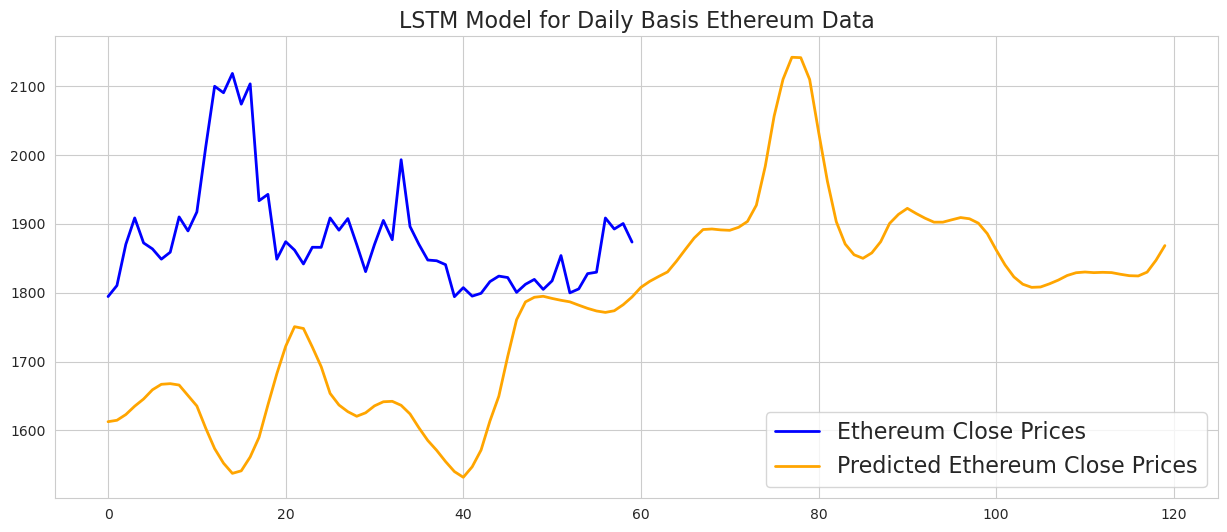

In [275]:
line_plot(transformer_quantile_df_eth.inverse_transform(reshaped_y_test).flatten()[window_len:], 
          transformer_quantile_df_eth.inverse_transform(reshaped_preds).flatten(),
          label1 = "Ethereum Close Prices",
          label2 = "Predicted Ethereum Close Prices", 
          title = "LSTM Model for Daily Basis Ethereum Data")

## Conclusion

In [276]:
index = pd.MultiIndex.from_tuples([("df_btc", "RamdomForest"), ("df_btc", "Xgboost"), ("df_btc", "LSTM"), 
                                   ("df_eth", "RamdomForest"), ("df_eth", "Xgboost"), ("df_eth", "LSTM"),
                                   ("df_btc_daily", "RamdomForest"), ("df_btc_daily", "Xgboost"), ("df_btc_daily", "LSTM"), 
                                   ("df_eth_daily", "RamdomForest"), ("df_eth_daily", "Xgboost"), ("df_eth_daily", "LSTM")])

data = {
    "Rmse": [rmse_rr_df_btc, rmse_xgb_df_btc, rmse_lstm_df_btc, rmse_rr_df_eth, 
             rmse_xgb_df_eth, rmse_lstm_df_eth, rmse_rr_df_btc_daily, rmse_xgb_df_btc_daily, rmse_lstm_df_btc_daily,
             rmse_rr_df_eth_daily, rmse_xgb_df_eth_daily, rmse_lstm_df_eth_daily],
    
    "Mape" :  [mape_rr_df_btc, mape_xgb_df_btc, mape_lstm_df_btc, mape_rr_df_eth, 
               mape_xgb_df_eth, mape_lstm_df_eth, mape_rr_df_btc_daily, mape_xgb_df_btc_daily, mape_lstm_df_btc_daily,
               mape_rr_df_eth_daily, mape_xgb_df_eth_daily, mape_lstm_df_eth_daily],
    
    "Mae" :  [mae_rr_df_btc, mae_xgb_df_btc, mae_lstm_df_btc, mae_rr_df_eth, 
               mae_xgb_df_eth, mae_lstm_df_eth, mae_rr_df_btc_daily, mae_xgb_df_btc_daily, mae_lstm_df_btc_daily,
               mae_rr_df_eth_daily, mae_xgb_df_eth_daily, mae_lstm_df_eth_daily],
    
    "R2" :  [r2_rr_df_btc, r2_xgb_df_btc, r2_lstm_df_btc, r2_rr_df_eth, 
               r2_xgb_df_eth, r2_lstm_df_eth, r2_rr_df_btc_daily, r2_xgb_df_btc_daily, r2_lstm_df_btc_daily,
               r2_rr_df_eth_daily, r2_xgb_df_eth_daily, r2_lstm_df_eth_daily]
}

df_result = pd.DataFrame(data = data,index = index, columns = ["Rmse", "Mape", "Mae", "R2"])

In [277]:
df_result

Rmse      Mape          Mae        R2
df_btc       RamdomForest    78.357598  0.201272    48.872402  0.999694
             Xgboost        391.482272  0.900515   215.149014  0.992360
             LSTM           335.278810  0.743758   179.342331  0.994361
df_eth       RamdomForest     4.351784  0.181774     2.954519  0.999694
             Xgboost         15.484881  0.644423    10.448818  0.996124
             LSTM            20.525661  0.930190    14.663067  0.993156
df_btc_daily RamdomForest   144.461901  0.418079   103.421705  0.998935
             Xgboost        397.142092  0.942351   228.285247  0.991948
             LSTM          1663.501879  4.496318  1176.673439  0.609449
df_eth_daily RamdomForest     6.817875  0.315352     5.042562  0.999234
             Xgboost         13.450205  0.616950    10.052915  0.997019
             LSTM            77.220915  3.303453    57.516506  0.714240

As we see **RandomForestRegressor** get better result. And **hourly basis dataset have better result**. So onchain indicators could not overcome the uncertainty of predicting one day ahead.